In [3]:
!pip install fastbook




     |████████████████████████████████| 727kB 8.5MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 358kB 24.6MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 1.0MB 29.8MB/s 
     |████████████████████████████████| 40kB 5.3MB/s 
     |████████████████████████████████| 40kB 5.2MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 2.6MB 67.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
name 'fastbook' is not defined


In [7]:
from fastai.vision.all import all
from fastbook import *
try:
  fastbook.setup()
except Exception as e:
  print(e)

name 'fastbook' is not defined


In [9]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

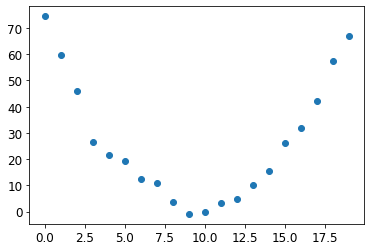

In [10]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [19]:
def f(t, params):
  a,b,c = params
  return a * (t ** 2) + b*t + c


In [27]:
def mse(preds, target): return ((preds - target)**2).mean()

In [15]:
params = torch.randn(3).requires_grad_()
original_params = params.clone()

In [16]:
params # initial tensor

tensor([ 0.6863, -0.3278,  0.7950], requires_grad=True)

In [24]:
def show_preds(preds, ax=None):
  if(ax ==  None):
    ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds),color='red')
  ax.set_ylim(-300,300)


In [20]:
preds = f(time, params)

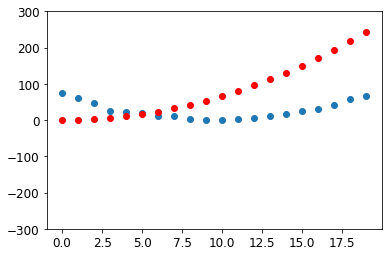

In [25]:
show_preds(preds)

In [28]:
loss = mse(preds, speed)

In [29]:
loss.backward()


In [31]:
params.grad

tensor([29901.0918,  1916.4381,   111.7121])

In [32]:
params.grad * 1e-5

tensor([0.2990, 0.0192, 0.0011])

In [33]:
params

tensor([ 0.6863, -0.3278,  0.7950], requires_grad=True)

In [36]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

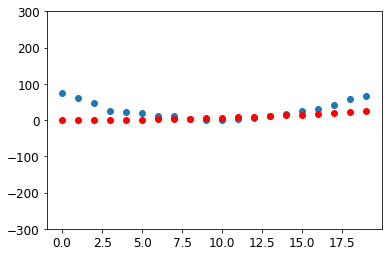

In [38]:
preds = f(time, params)
mse(preds, speed)

show_preds(preds)

In [40]:
def apply_step(params, prn=True):
  preds = f(time, params)
  if !prn : show_preds(preds)
  loss = mse(preds, speed)
  loss.backward()
  params.data -=  lr * params.grad.data
  params.grad  = None
  if prn : print(loss.item())


686.2681884765625
686.2644653320312
686.2605590820312
686.2567138671875
686.2526245117188
686.2489013671875
686.2449340820312
686.2409057617188
686.2371215820312
686.233154296875
686.2293701171875
686.2254638671875
686.2215576171875
686.2174682617188
686.2136840820312
686.209716796875
686.2059326171875
686.2020263671875
686.1979370117188
686.194091796875
686.190185546875
686.1864013671875
686.1824951171875
686.1785888671875
686.1746826171875
686.1708984375
686.1668701171875
686.1630859375
686.1590576171875
686.1551513671875
686.1513671875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


686.1473999023438
686.1434936523438
686.1395874023438
686.1358032226562
686.1318969726562
686.1279296875
686.1239013671875
686.1200561523438
686.1161499023438
686.1122436523438
686.1083374023438
686.1044921875
686.1005859375
686.0967407226562
686.0928344726562
686.0889282226562
686.0850830078125
686.0811767578125
686.0772094726562
686.0733032226562
686.0693969726562
686.0655517578125
686.0617065429688
686.0576171875
686.0538330078125
686.0499267578125
686.0460205078125
686.0421142578125
686.0382080078125
686.0343627929688
686.0304565429688
686.0265502929688
686.0226440429688
686.0188598632812
686.0147705078125
686.010986328125
686.007080078125
686.0031127929688
685.9993286132812
685.9954833984375
685.9915771484375
685.9876708984375
685.9837036132812
685.9798583984375
685.9760131835938
685.9721069335938
685.9681396484375
685.9642944335938
685.9603271484375
685.9566650390625
685.9526977539062
685.94873046875
685.9447021484375
685.9409790039062
685.9368896484375
685.9332275390625
685.9291

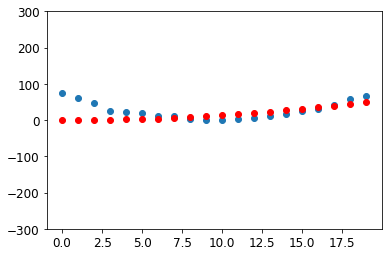

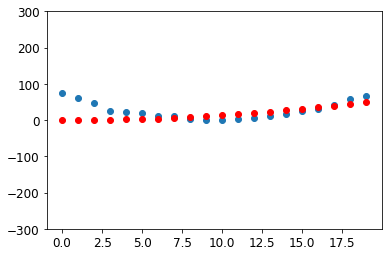

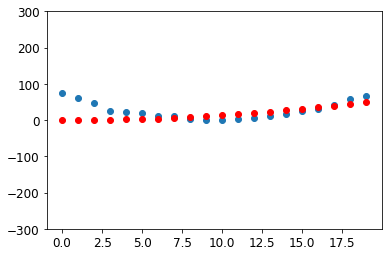

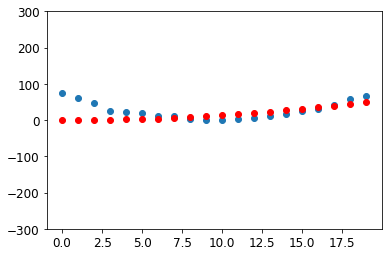

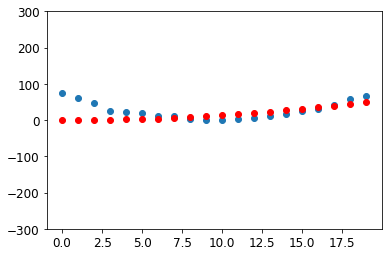

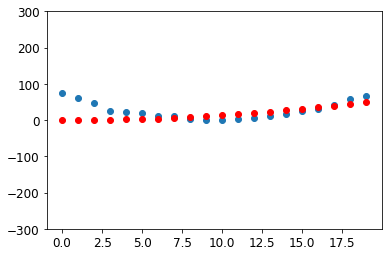

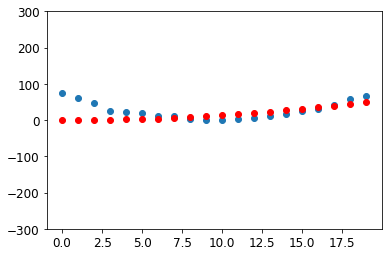

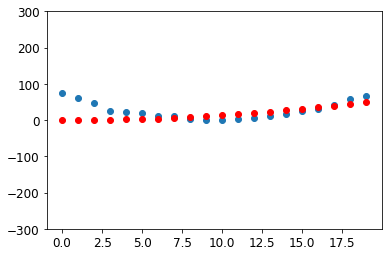

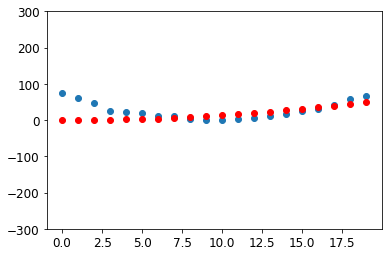

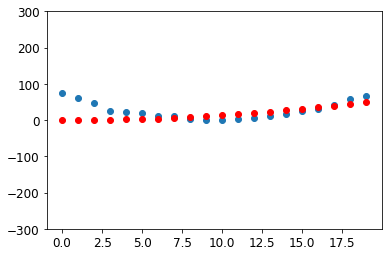

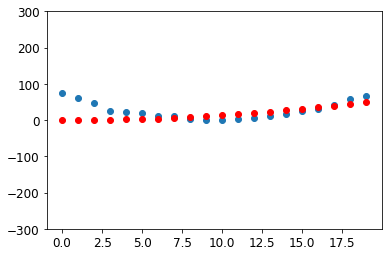

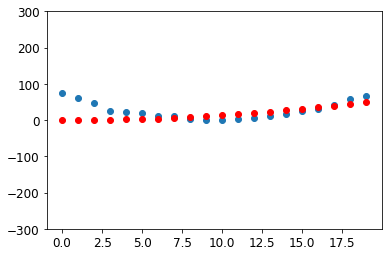

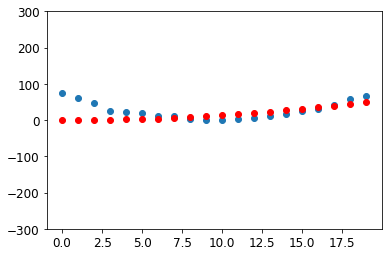

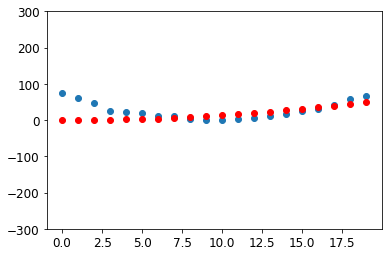

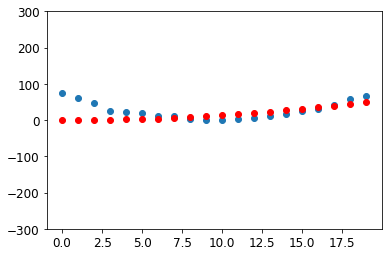

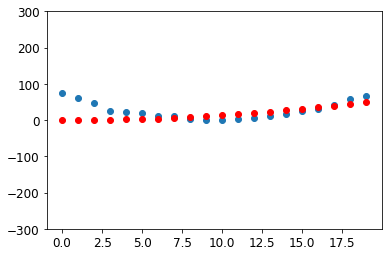

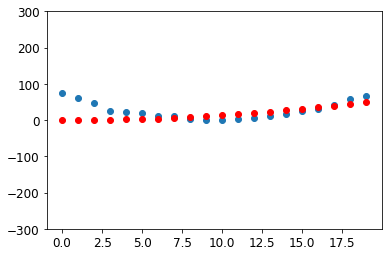

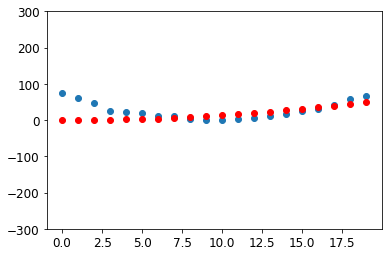

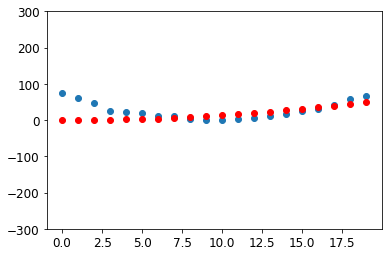

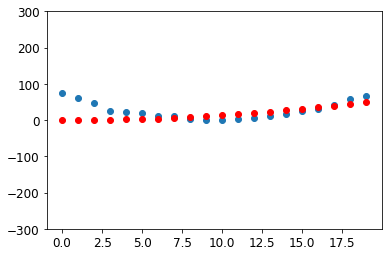

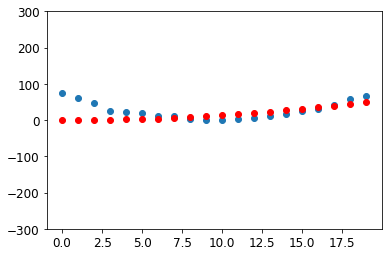

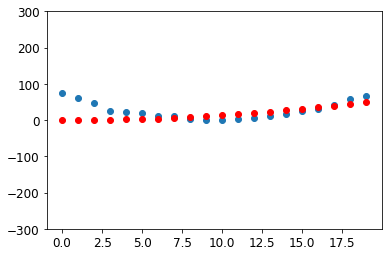

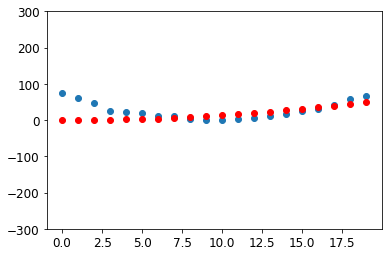

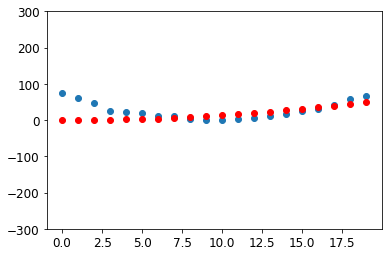

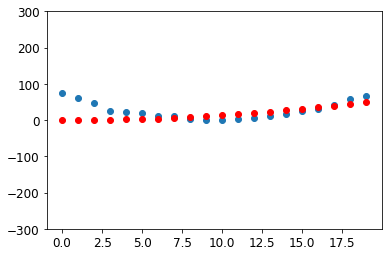

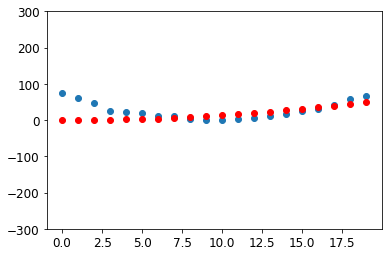

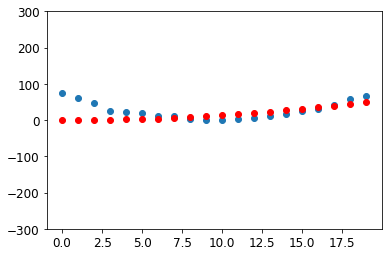

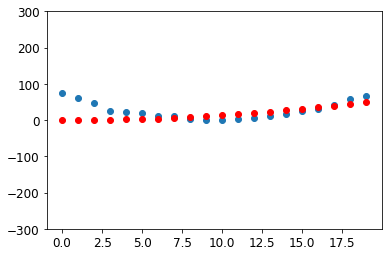

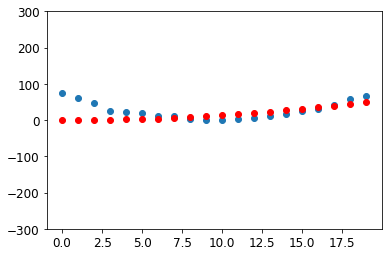

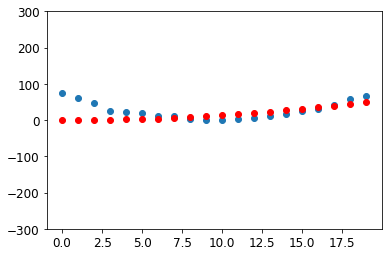

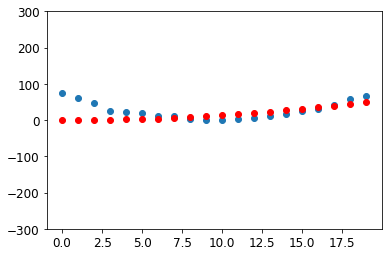

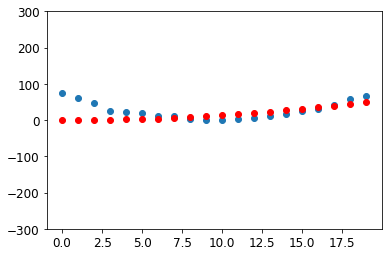

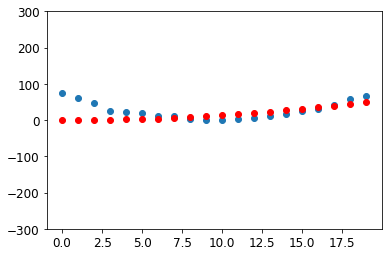

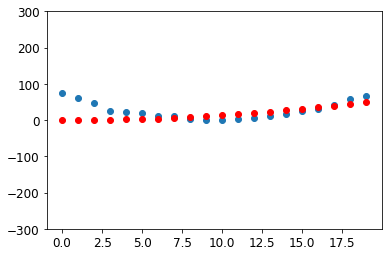

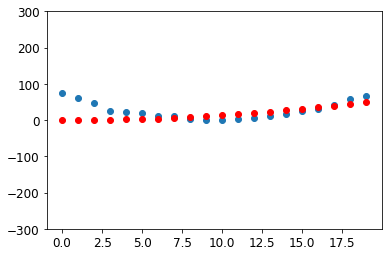

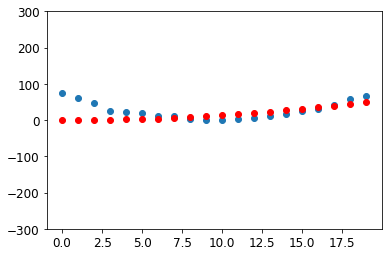

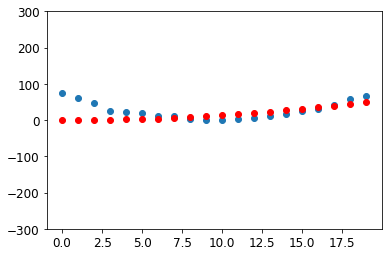

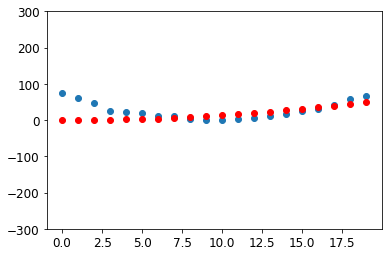

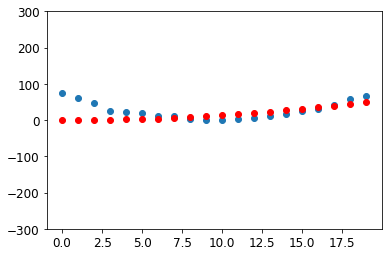

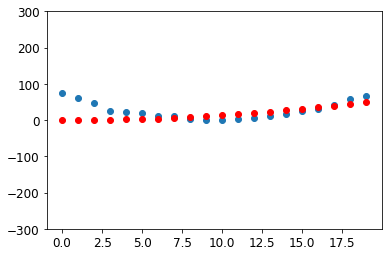

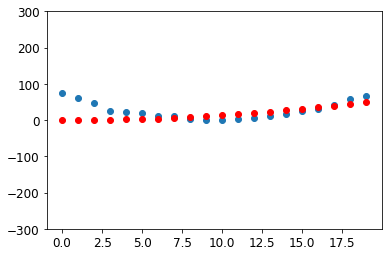

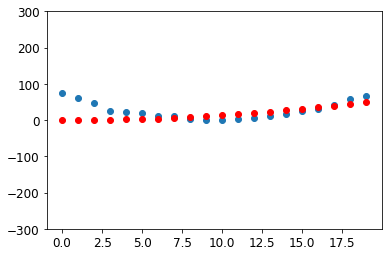

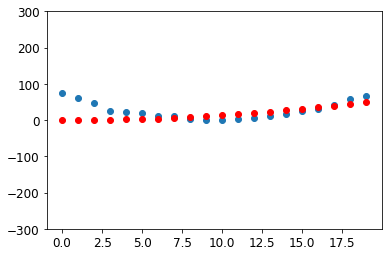

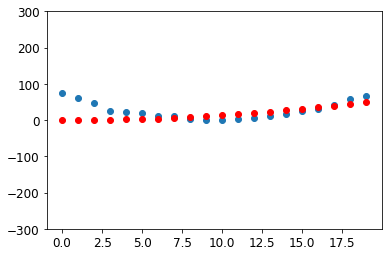

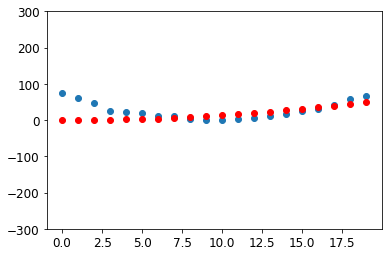

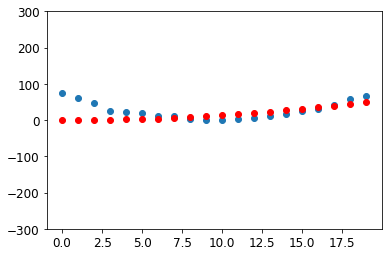

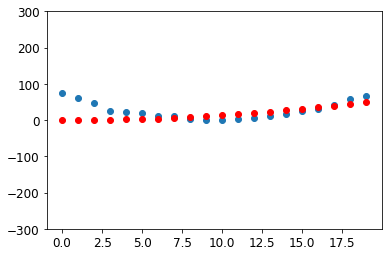

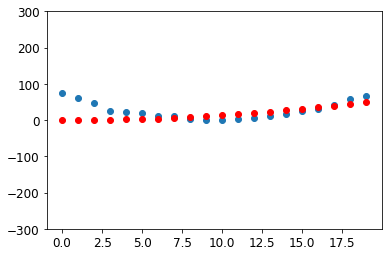

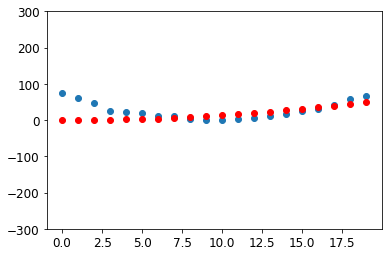

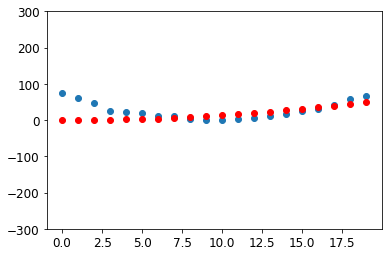

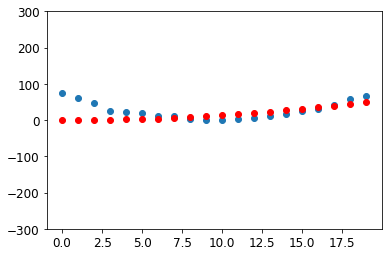

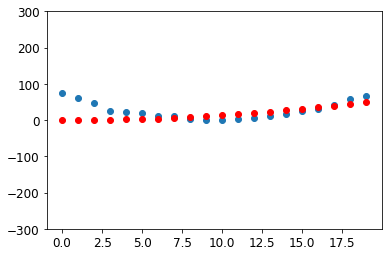

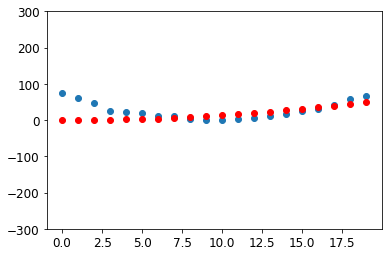

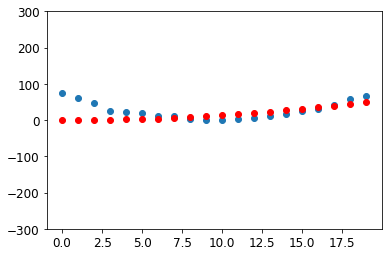

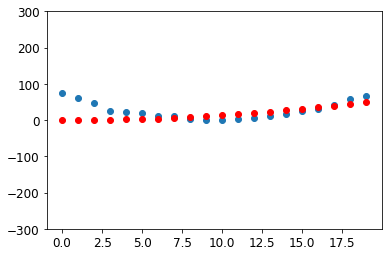

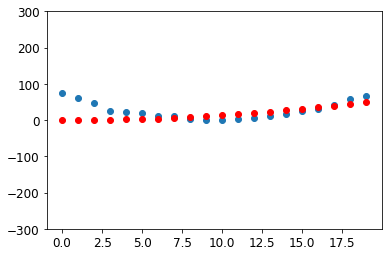

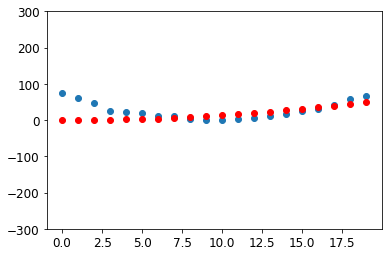

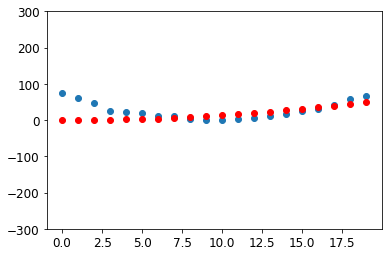

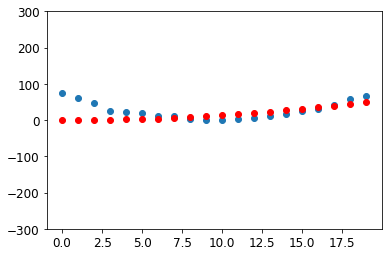

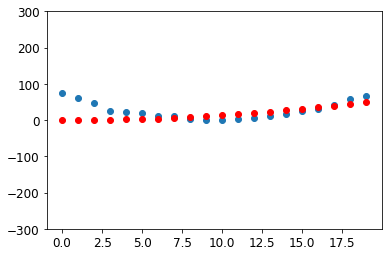

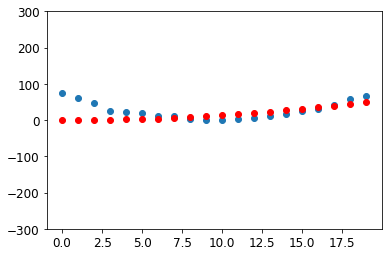

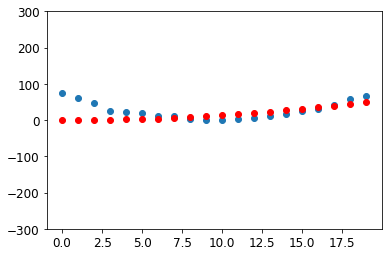

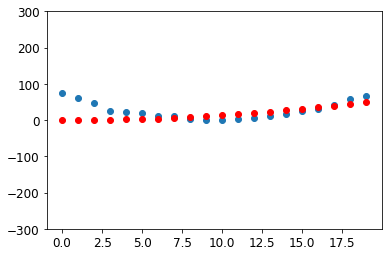

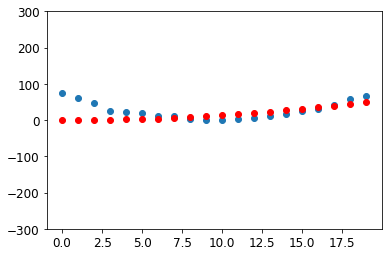

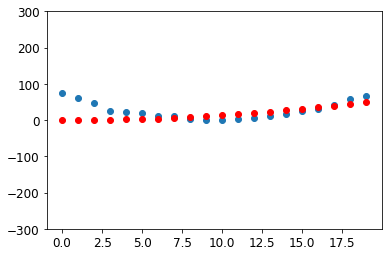

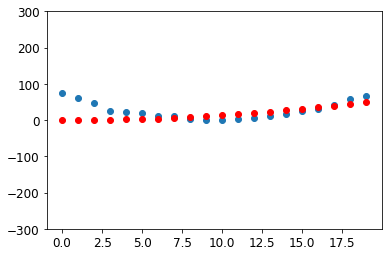

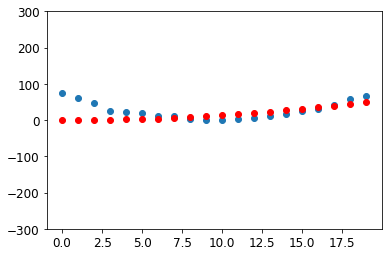

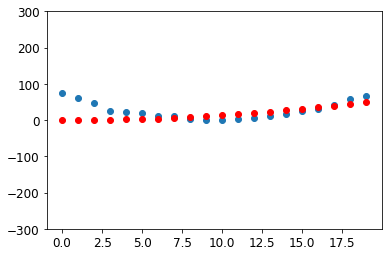

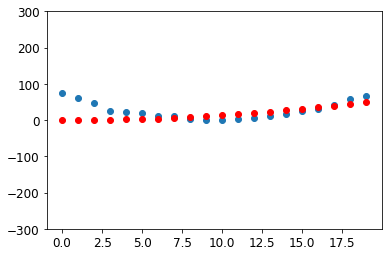

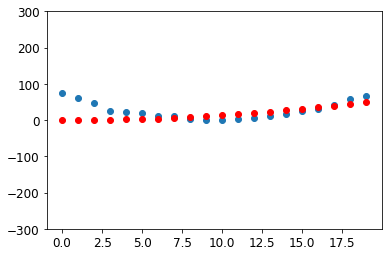

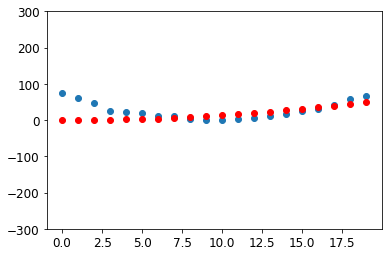

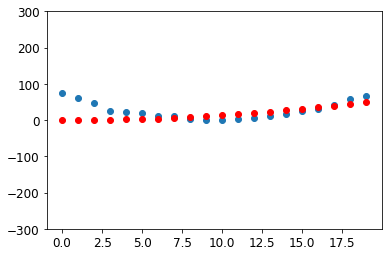

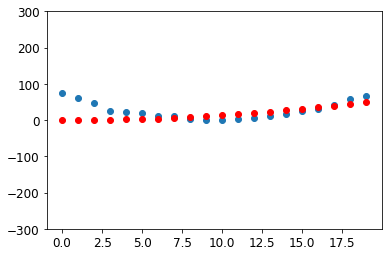

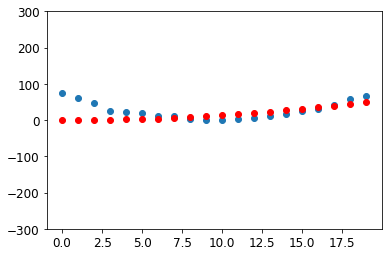

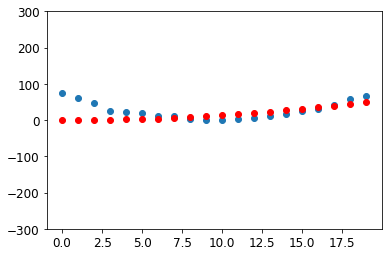

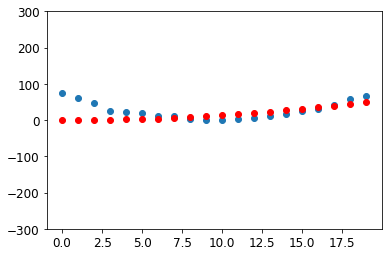

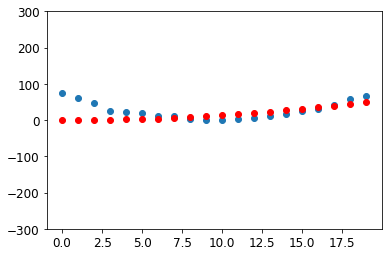

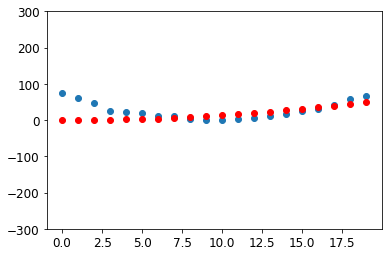

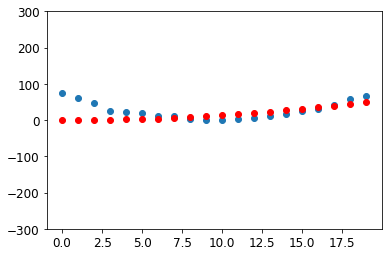

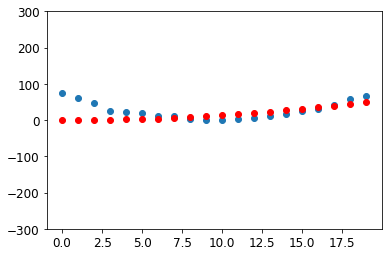

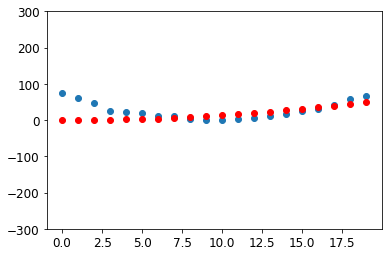

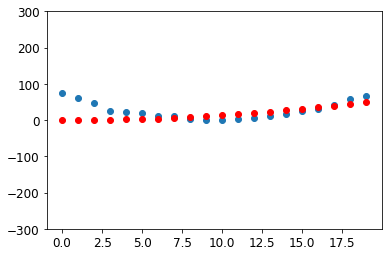

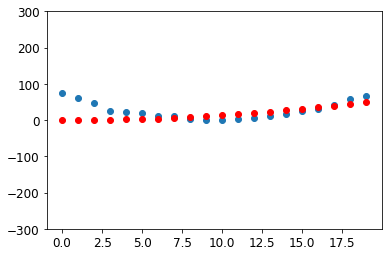

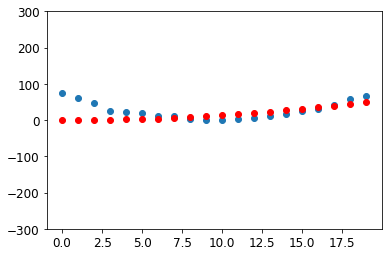

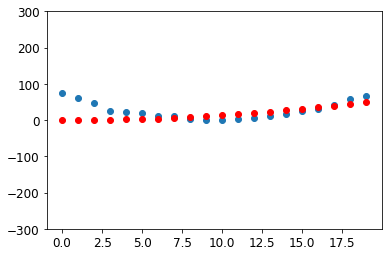

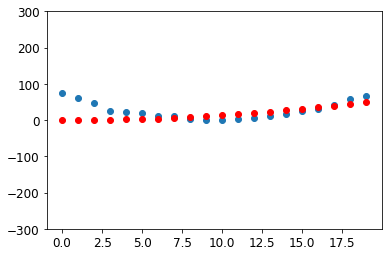

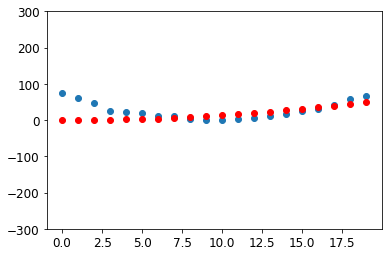

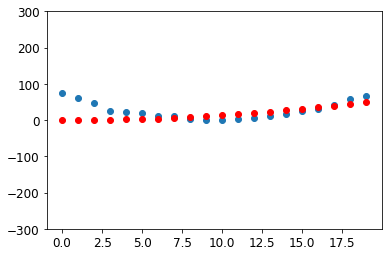

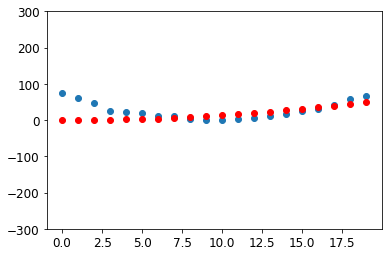

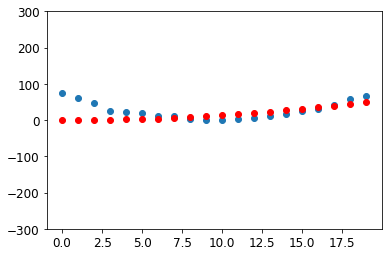

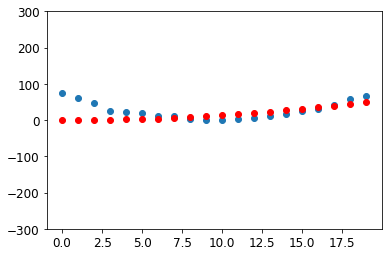

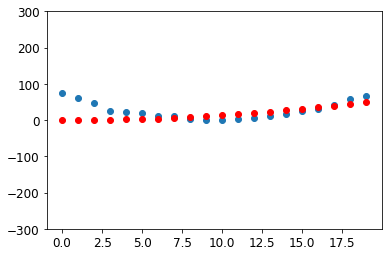

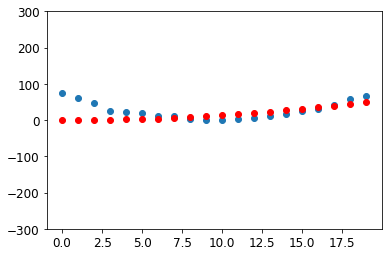

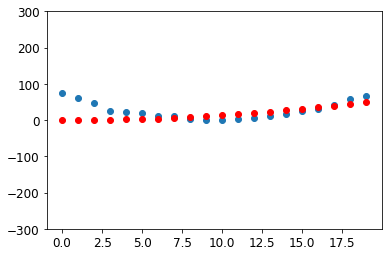

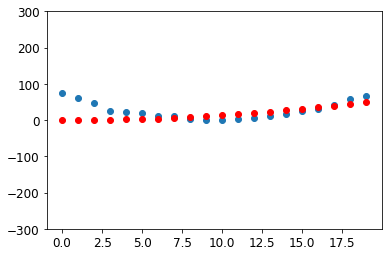

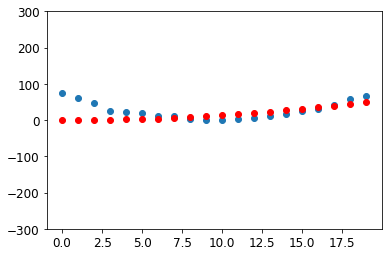

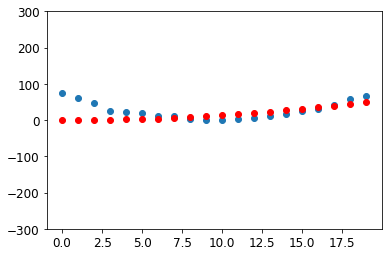

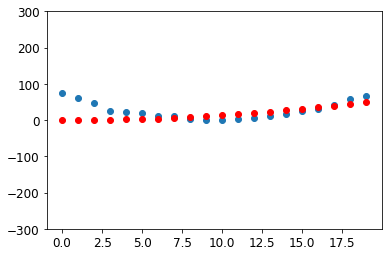

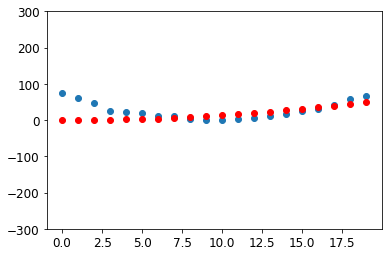

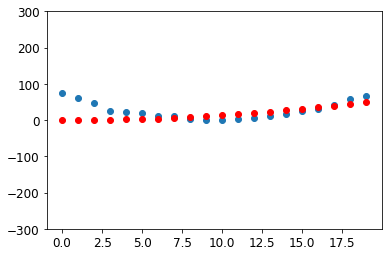

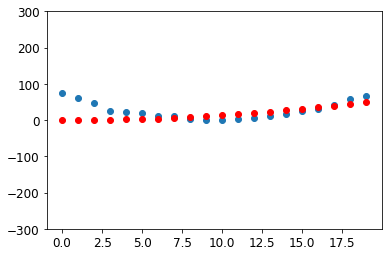

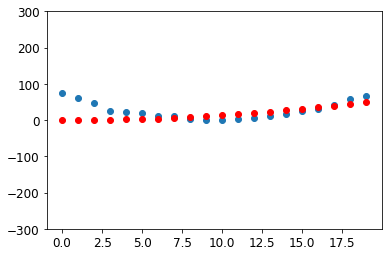

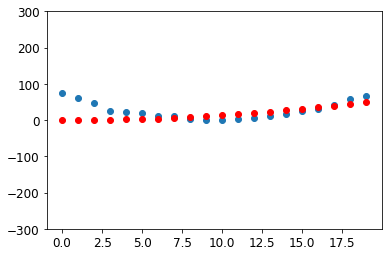

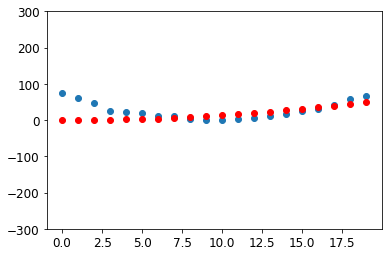

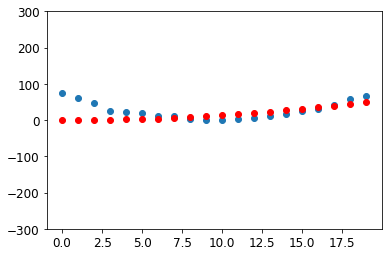

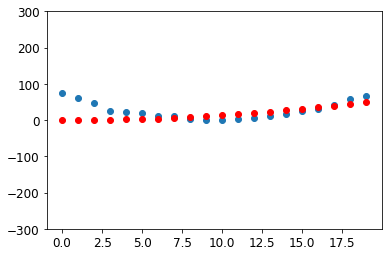

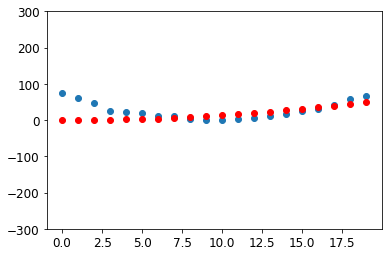

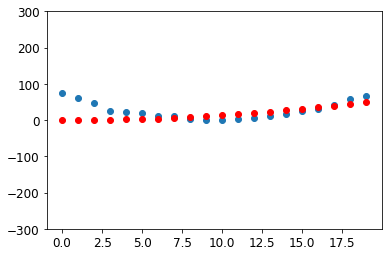

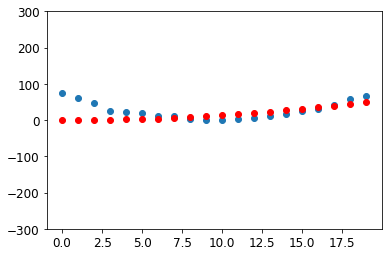

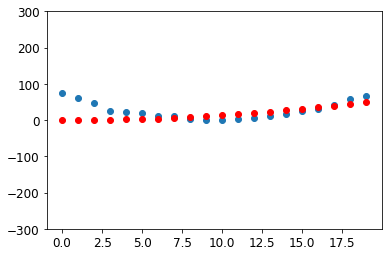

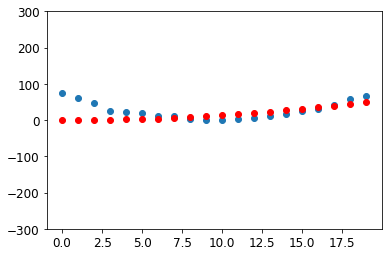

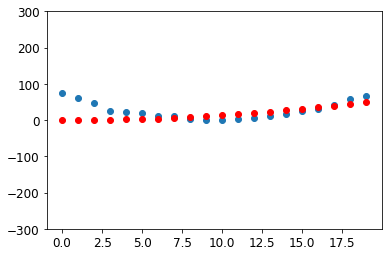

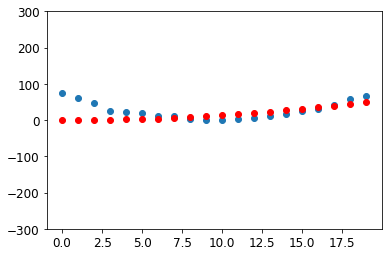

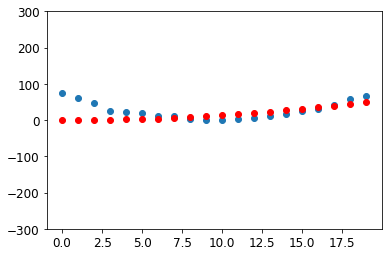

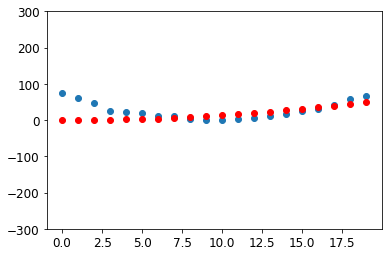

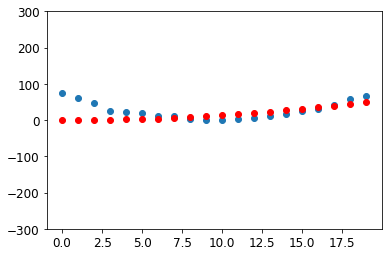

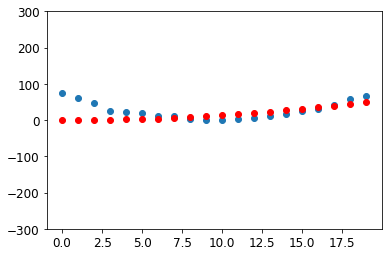

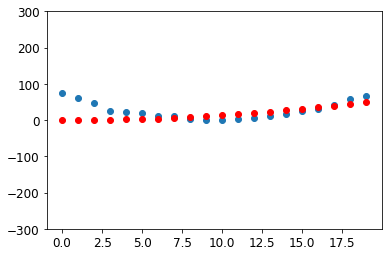

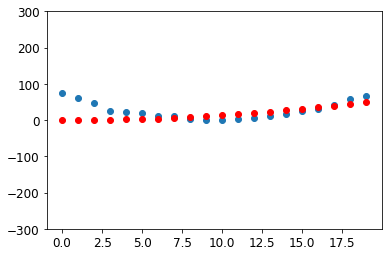

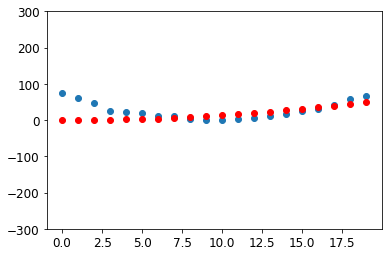

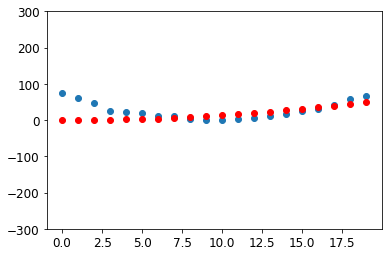

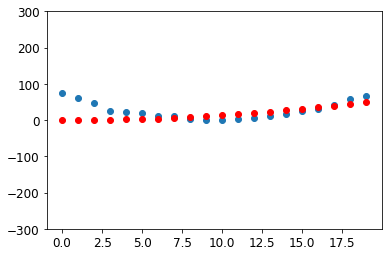

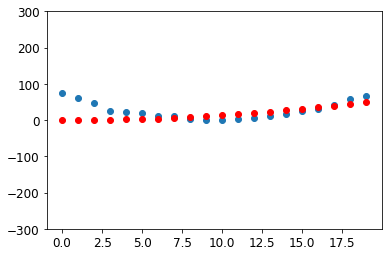

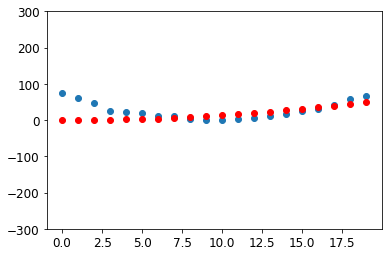

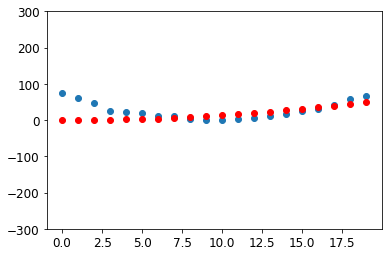

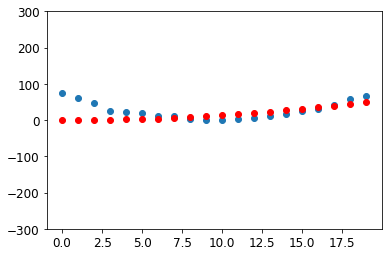

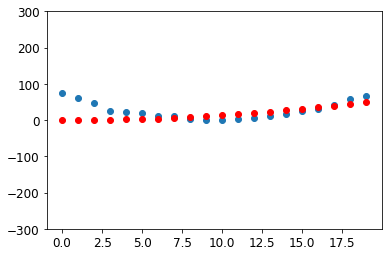

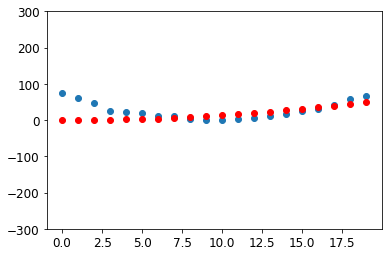

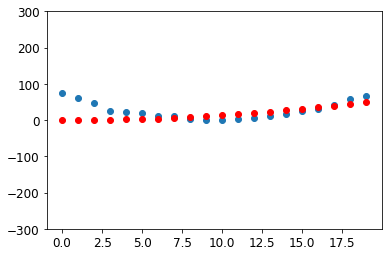

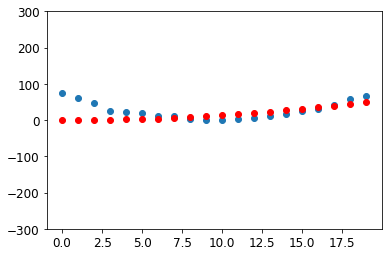

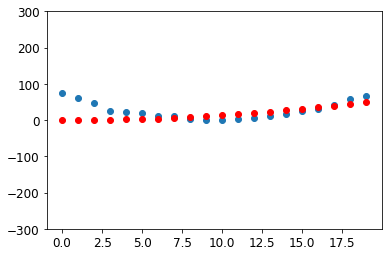

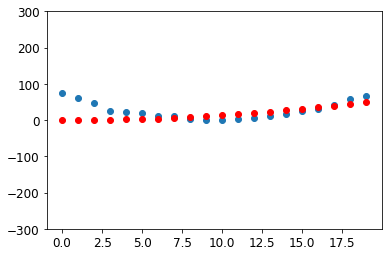

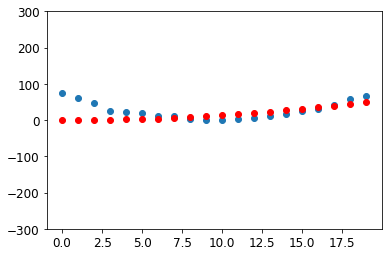

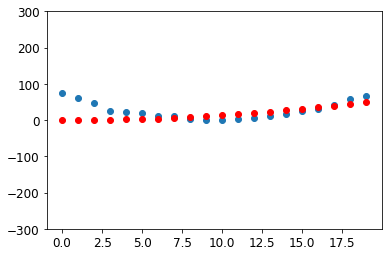

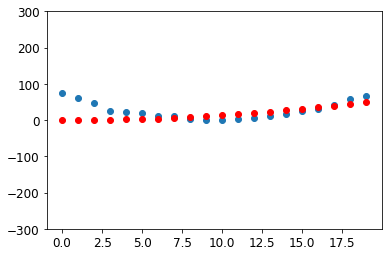

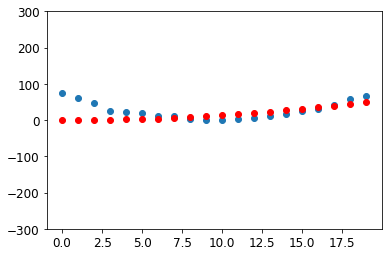

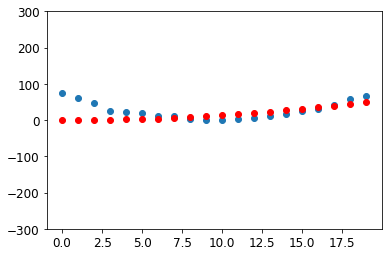

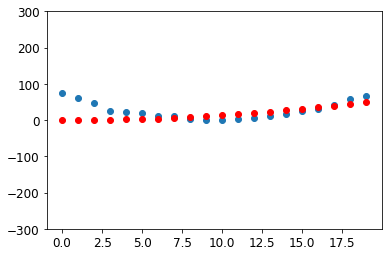

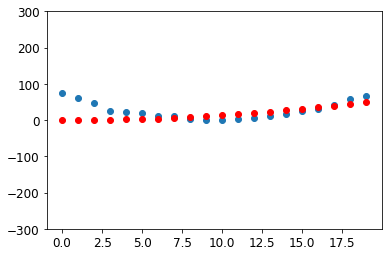

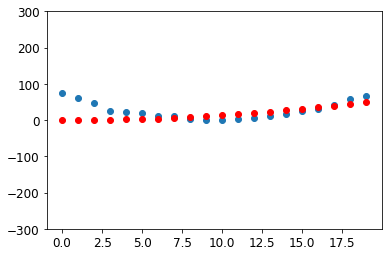

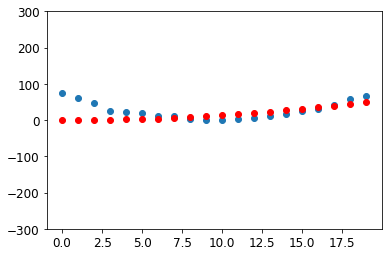

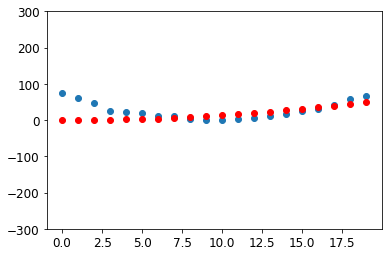

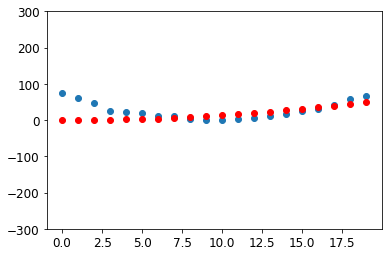

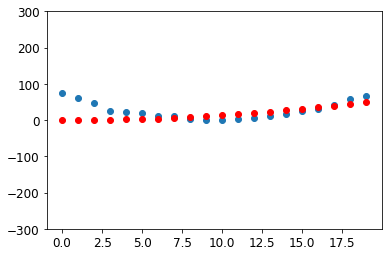

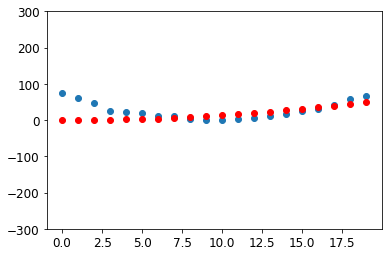

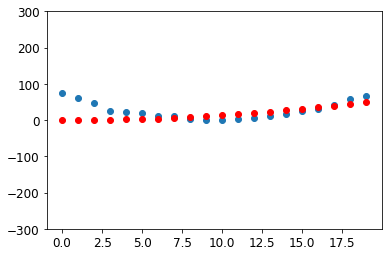

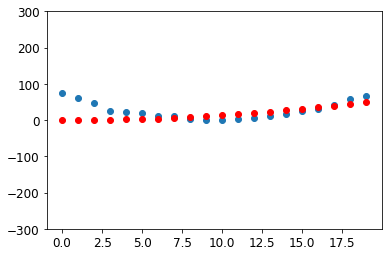

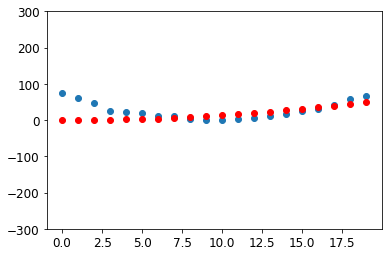

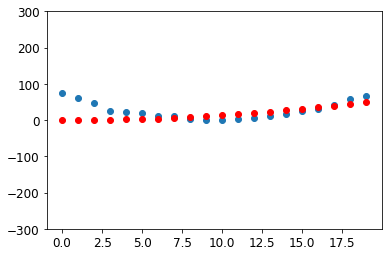

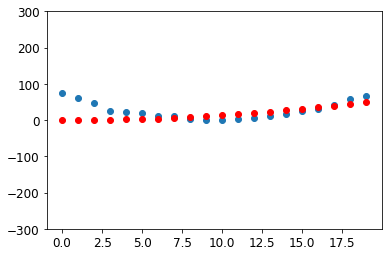

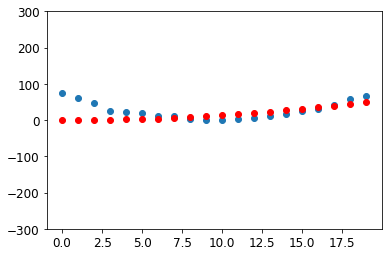

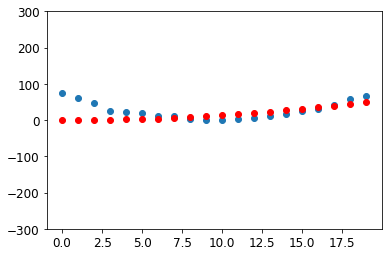

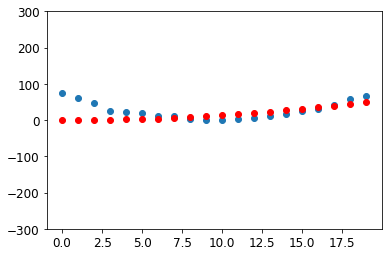

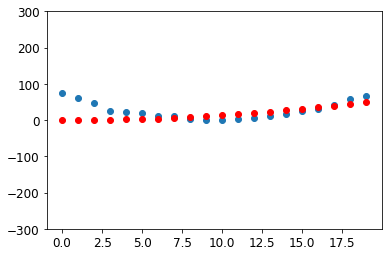

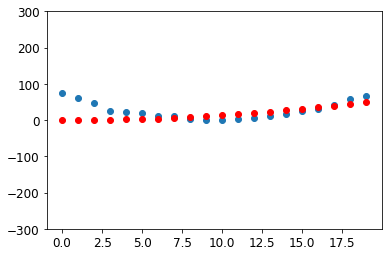

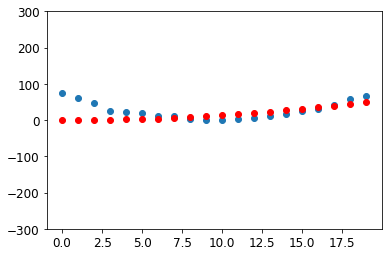

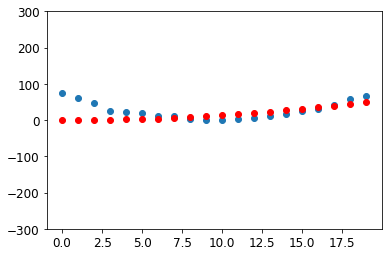

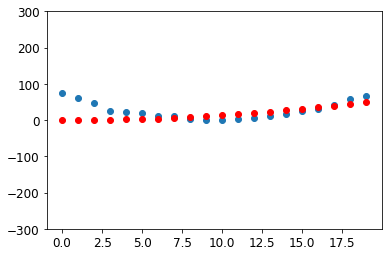

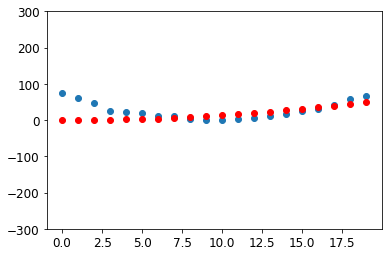

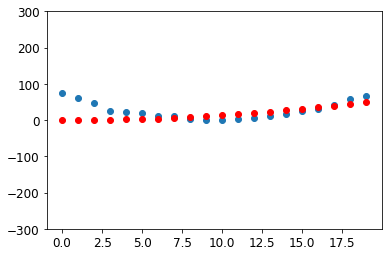

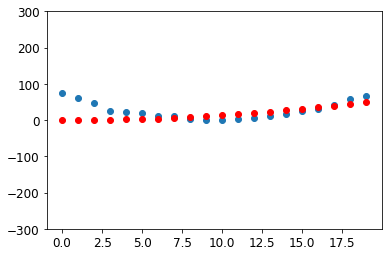

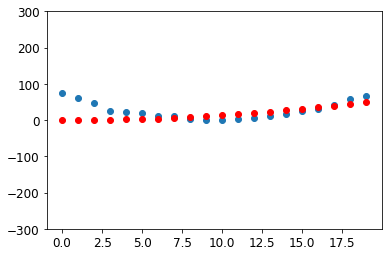

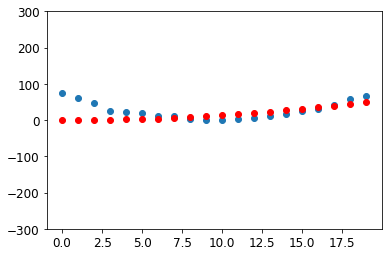

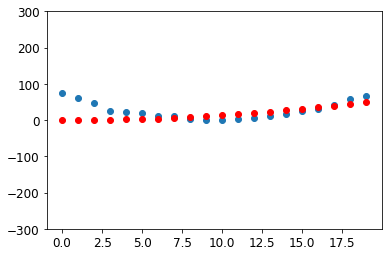

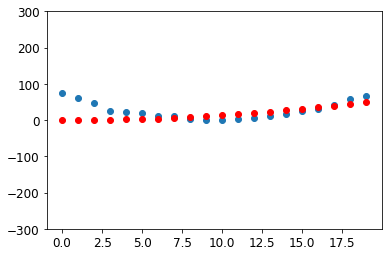

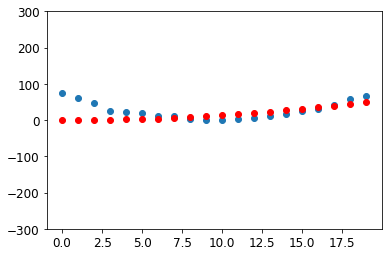

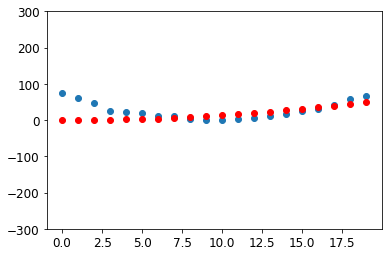

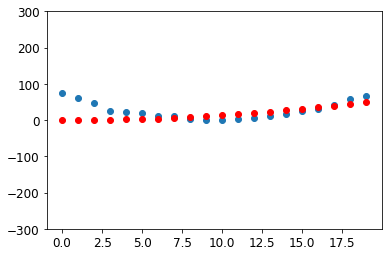

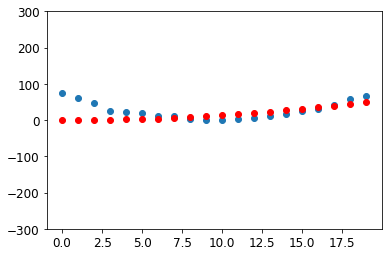

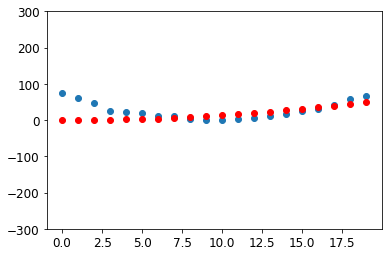

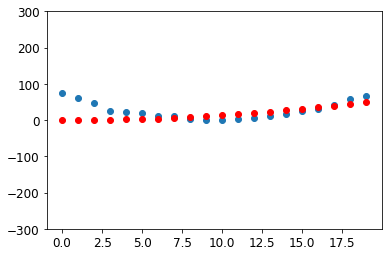

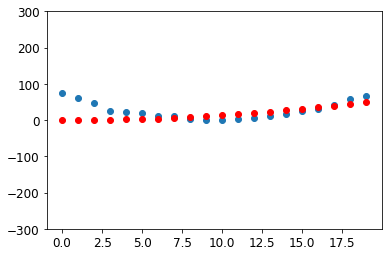

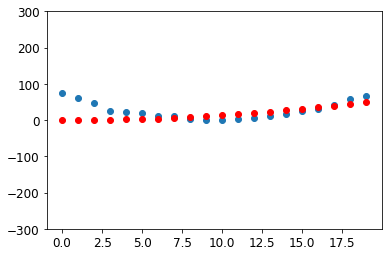

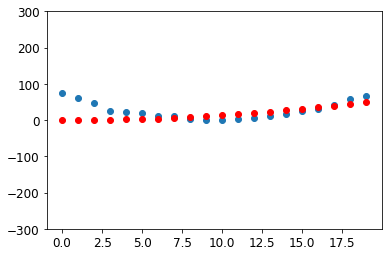

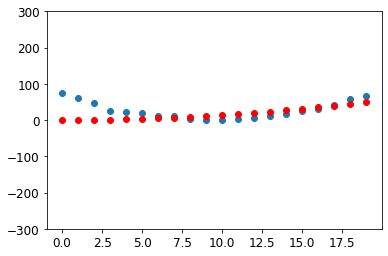

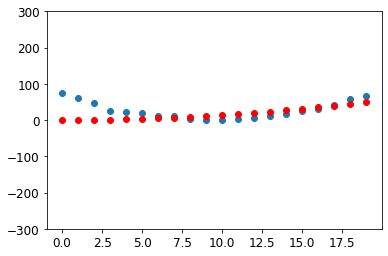

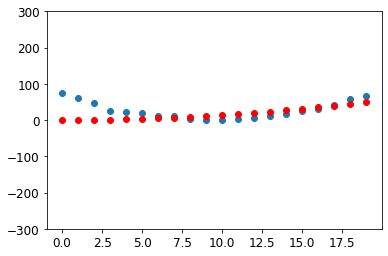

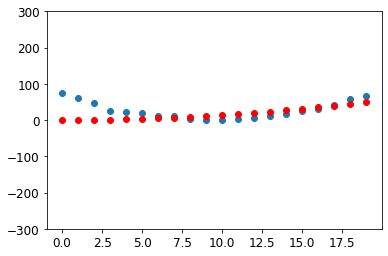

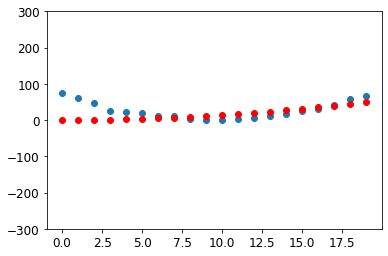

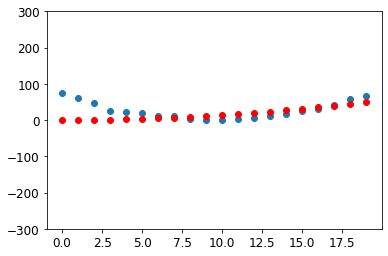

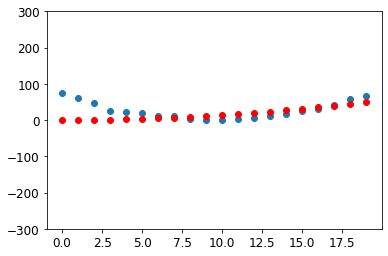

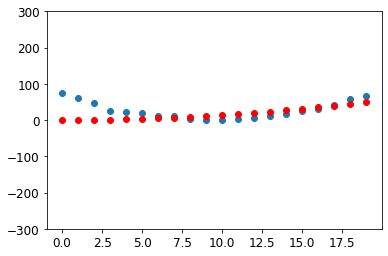

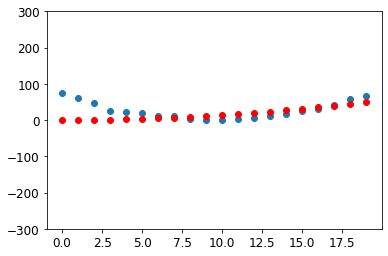

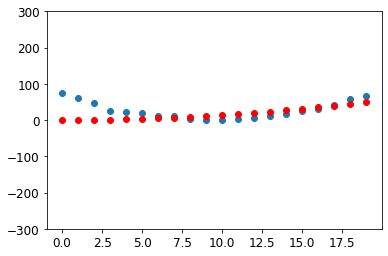

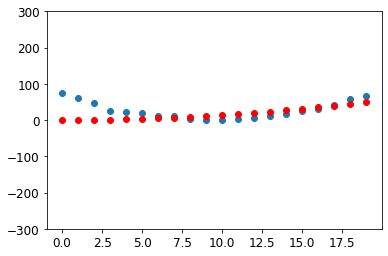

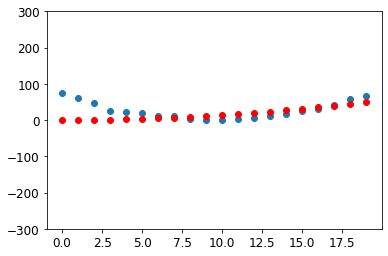

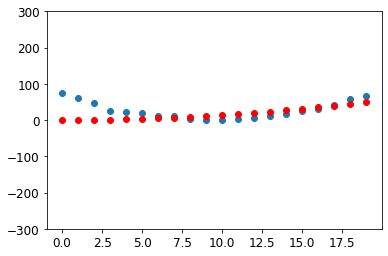

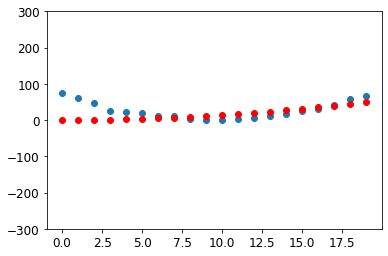

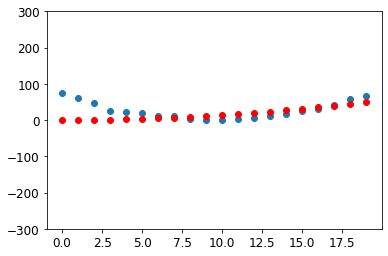

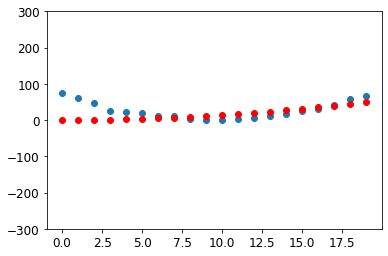

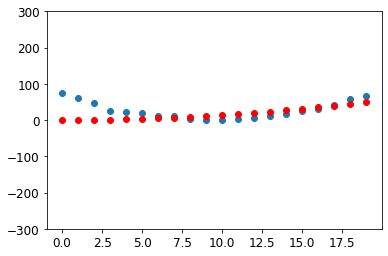

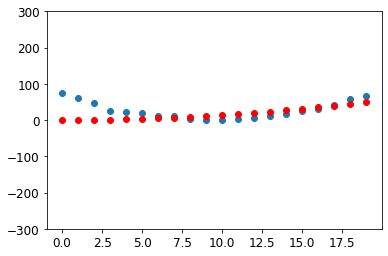

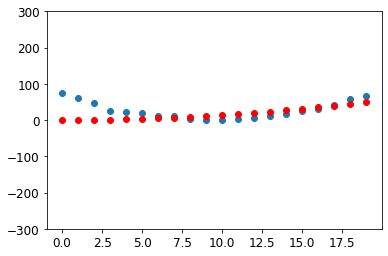

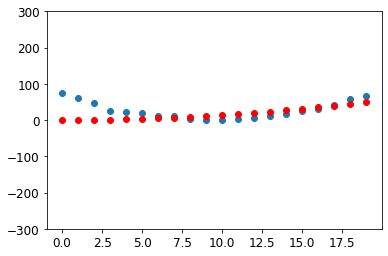

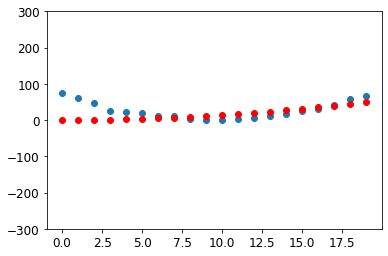

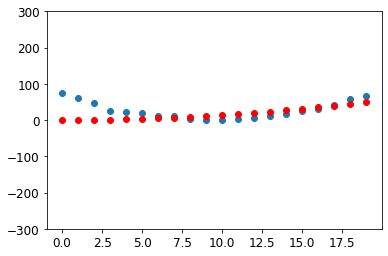

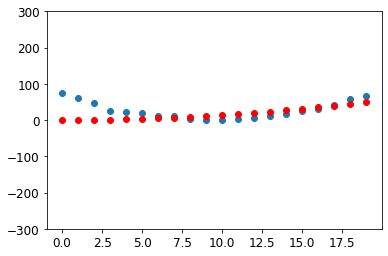

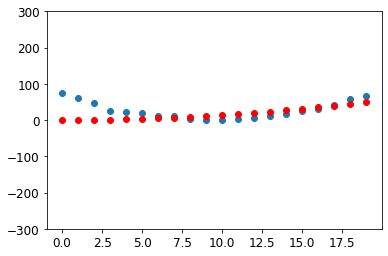

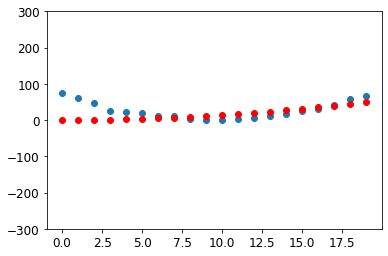

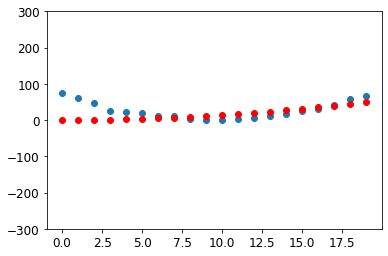

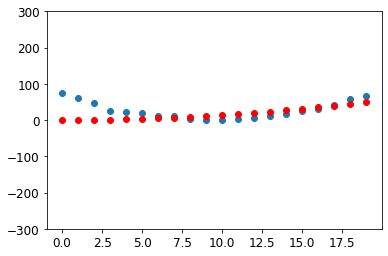

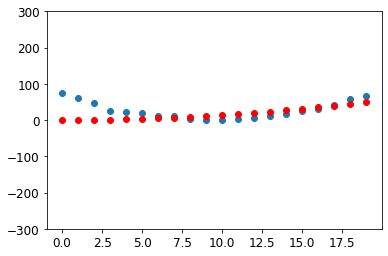

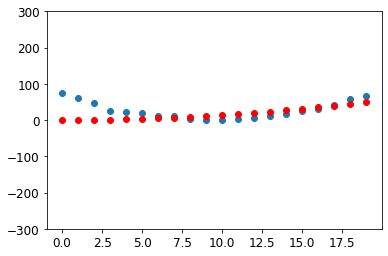

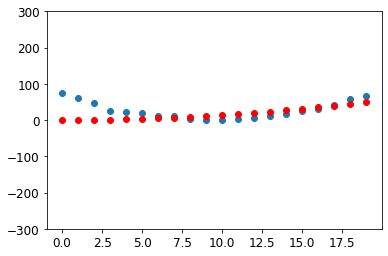

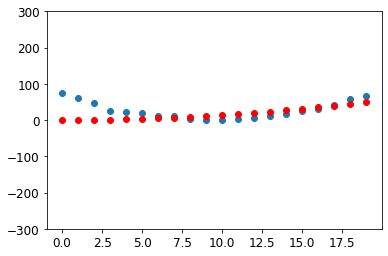

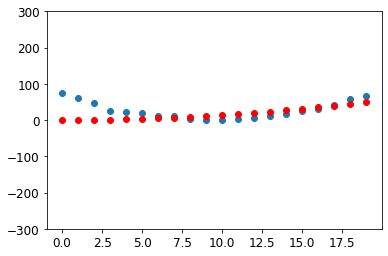

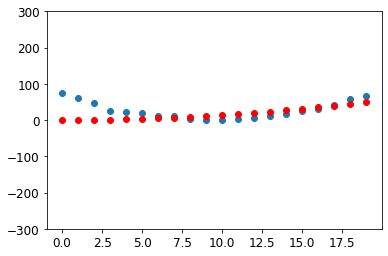

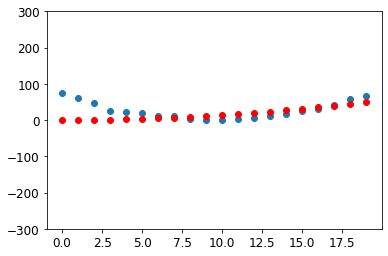

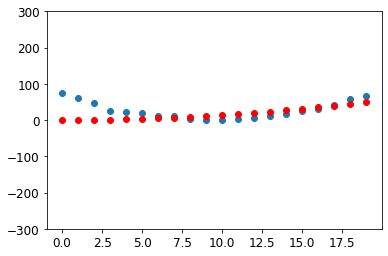

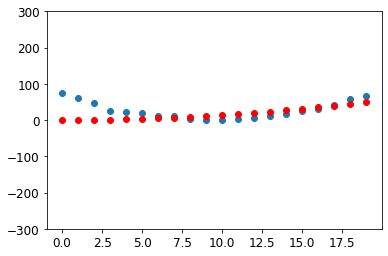

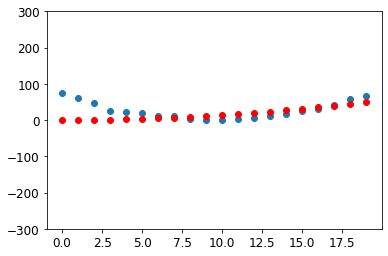

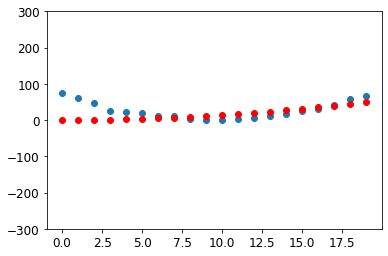

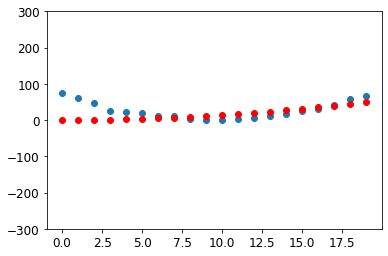

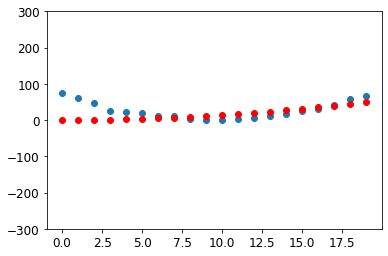

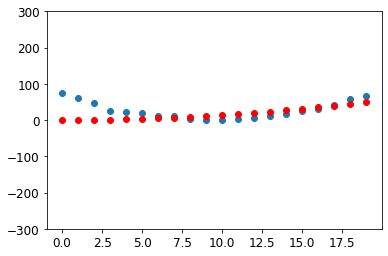

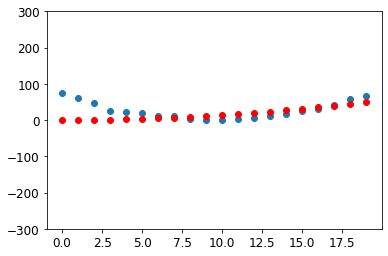

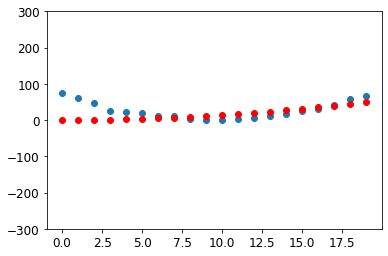

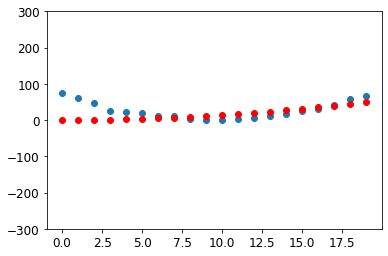

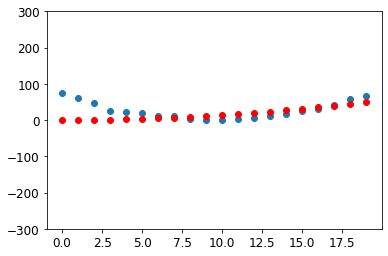

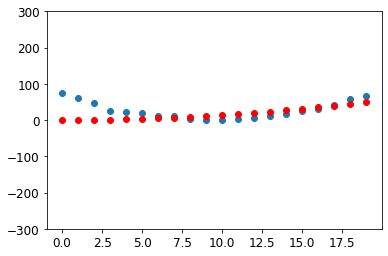

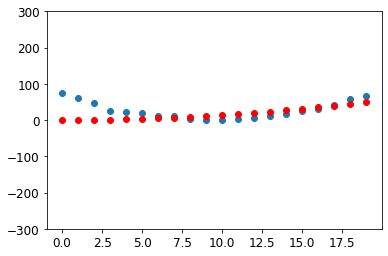

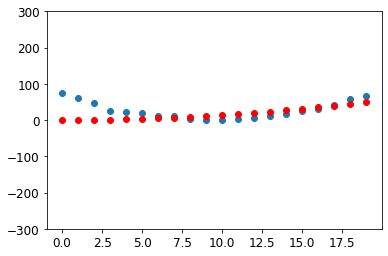

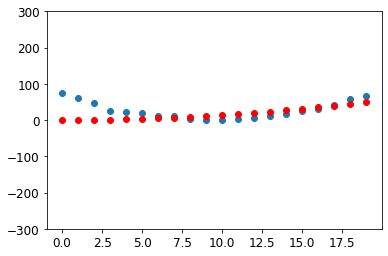

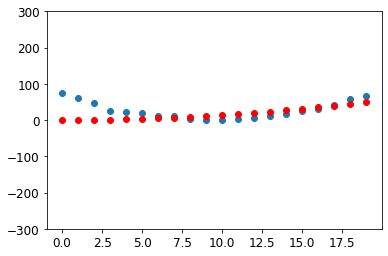

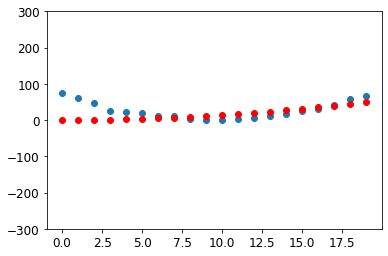

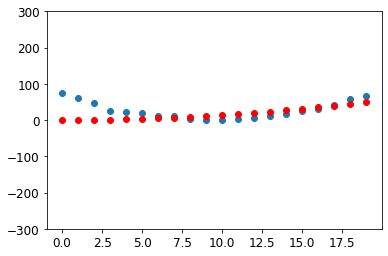

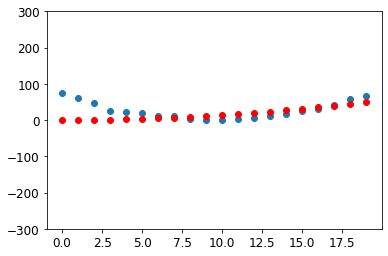

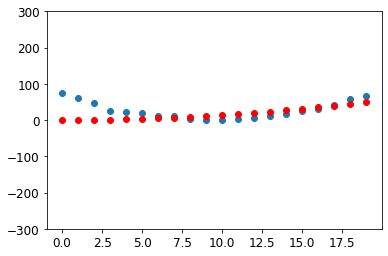

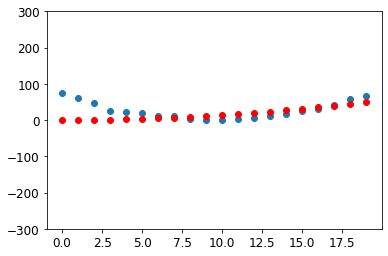

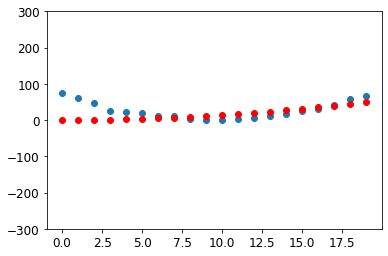

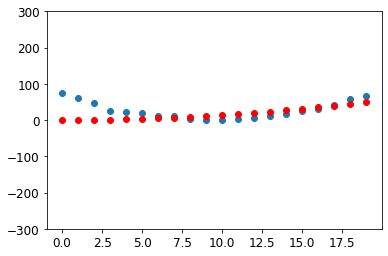

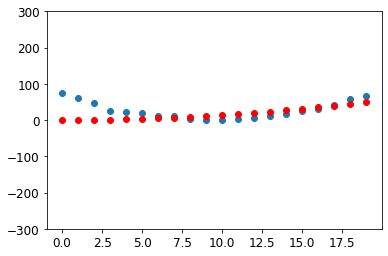

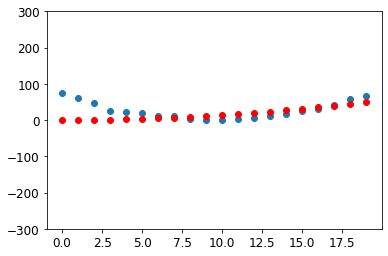

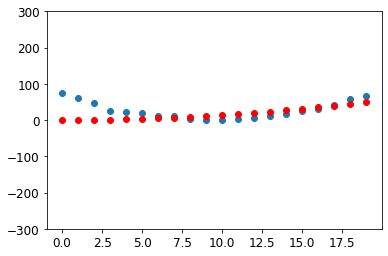

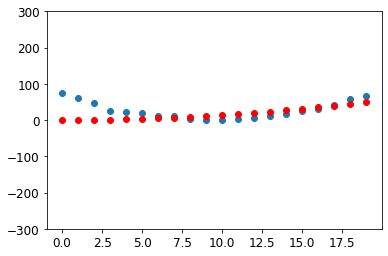

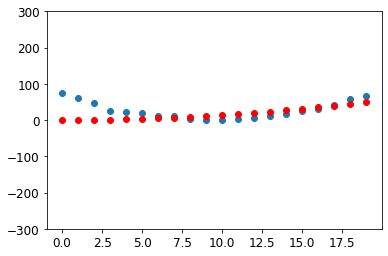

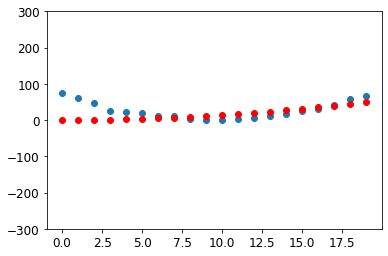

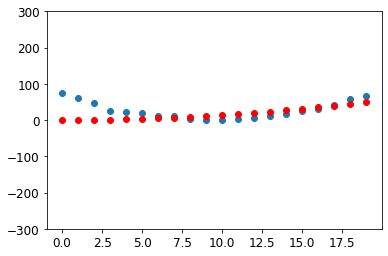

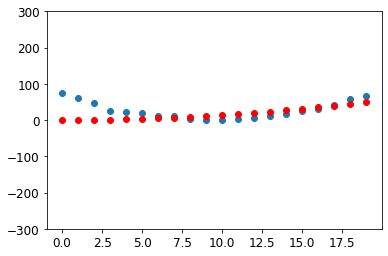

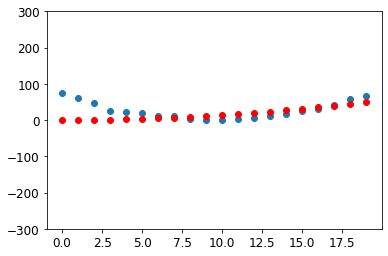

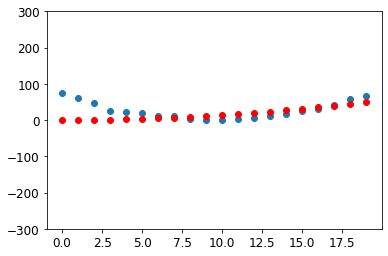

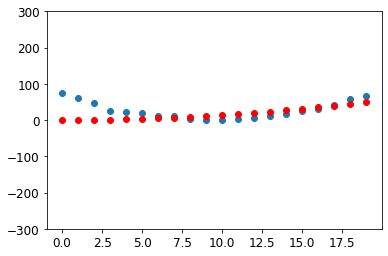

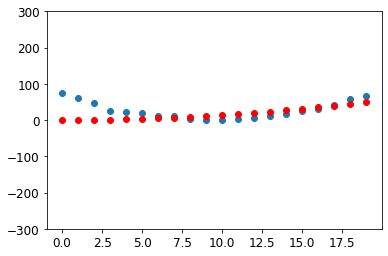

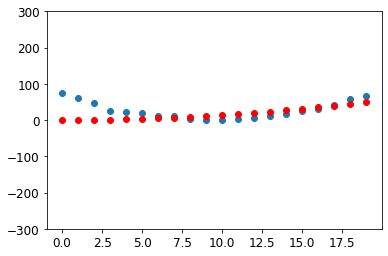

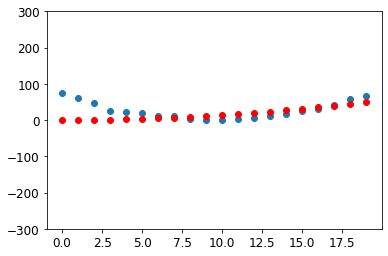

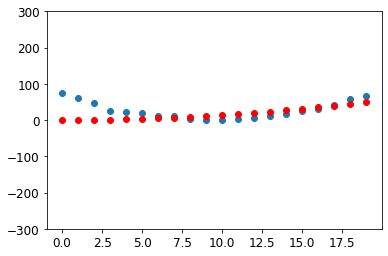

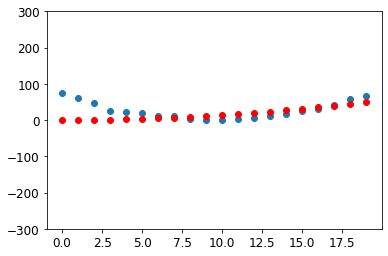

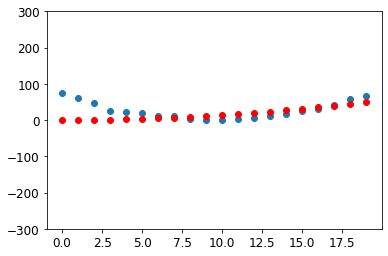

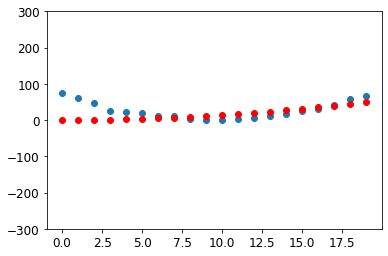

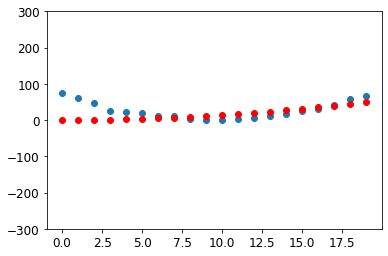

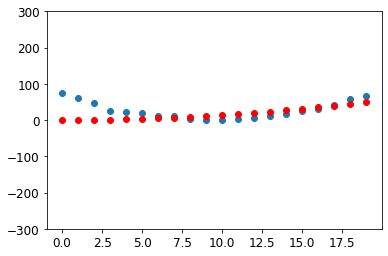

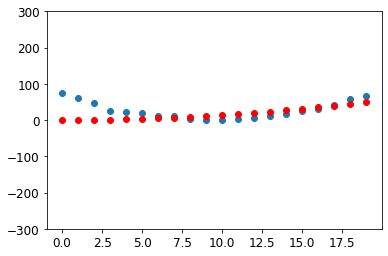

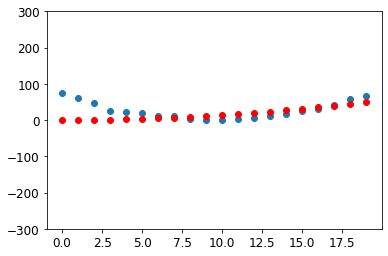

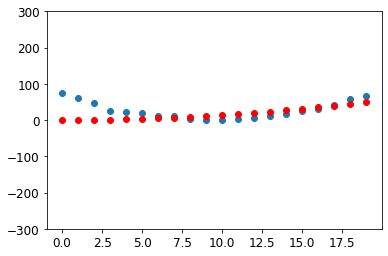

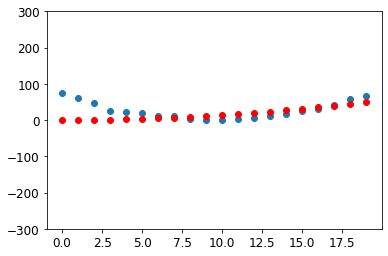

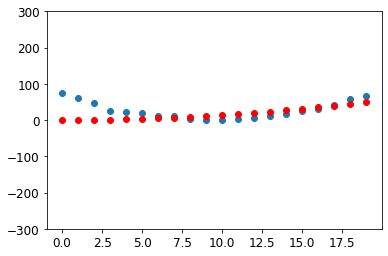

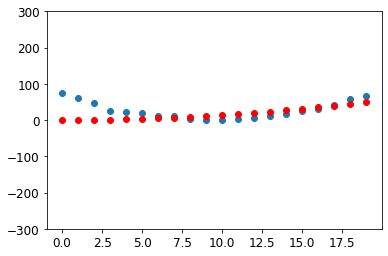

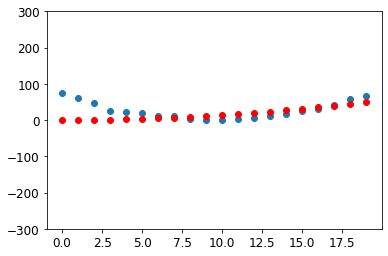

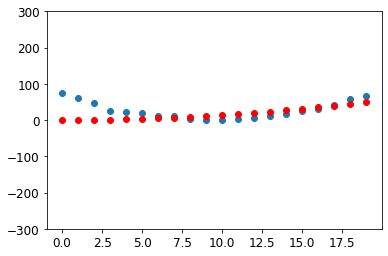

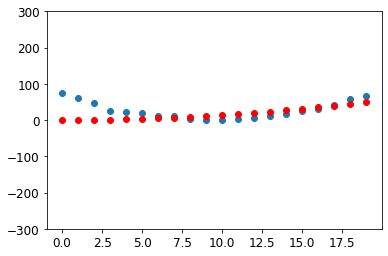

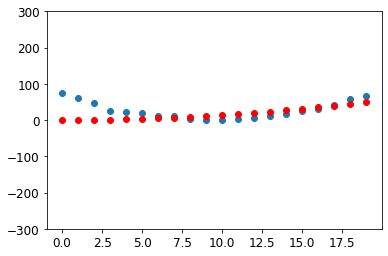

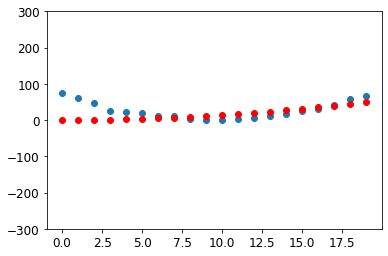

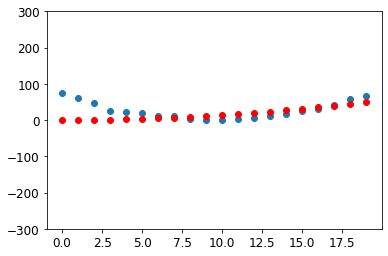

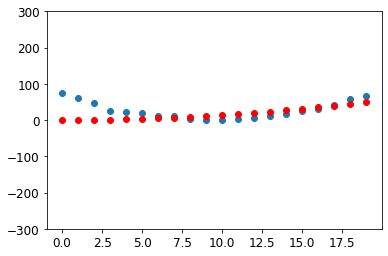

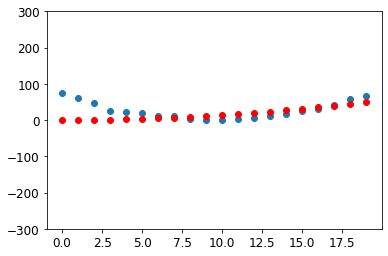

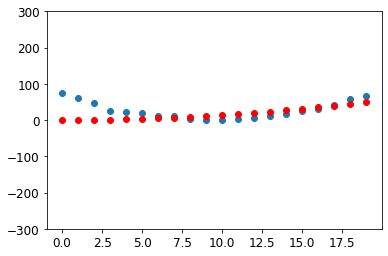

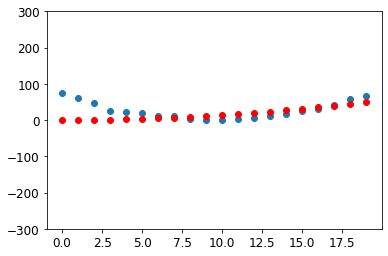

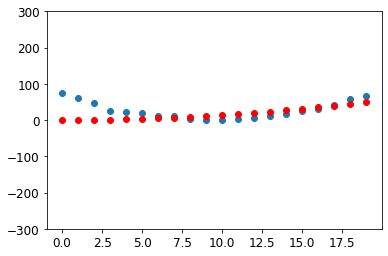

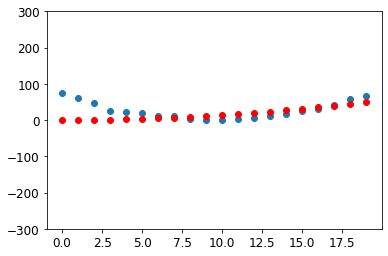

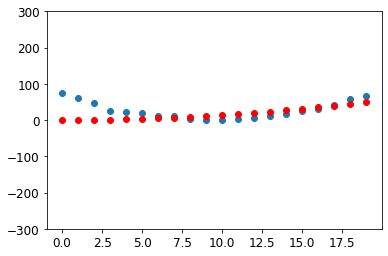

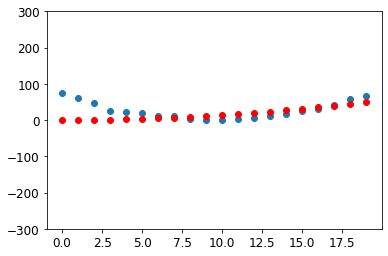

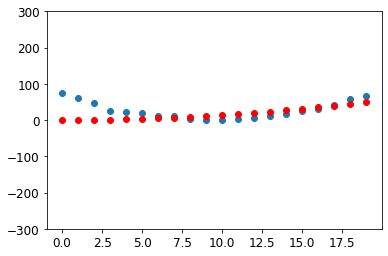

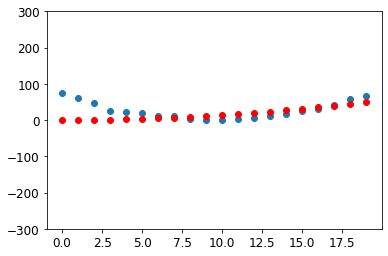

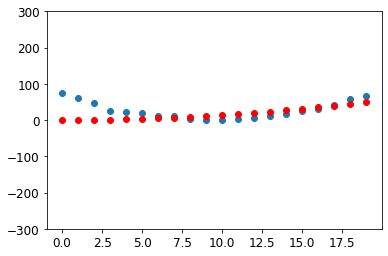

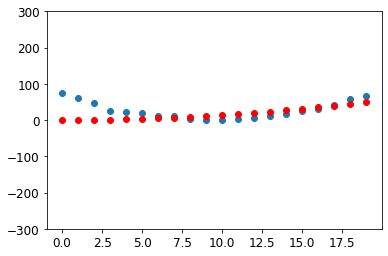

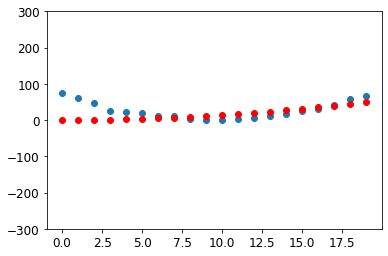

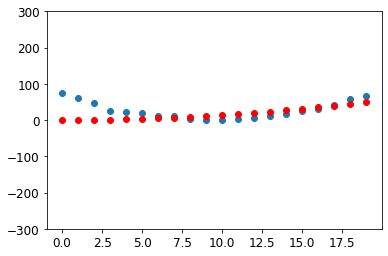

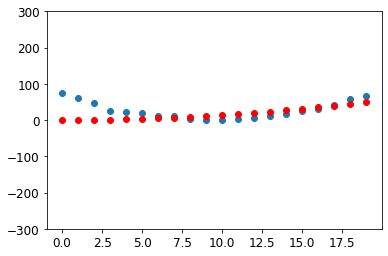

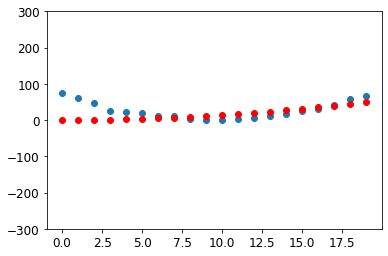

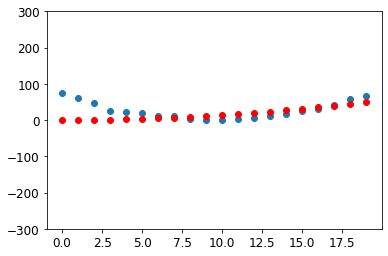

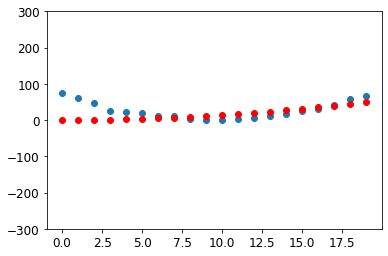

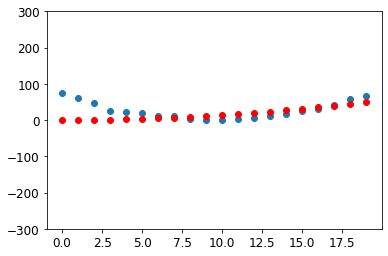

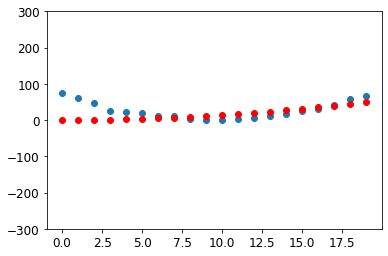

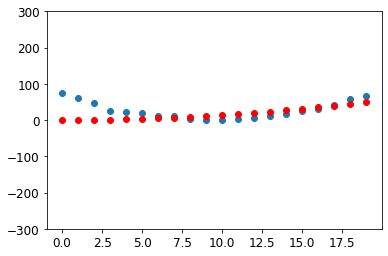

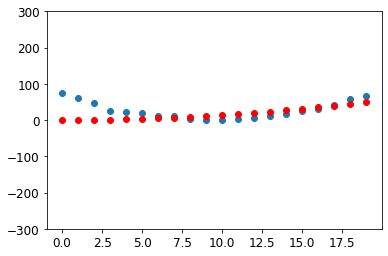

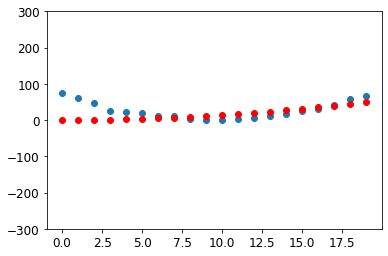

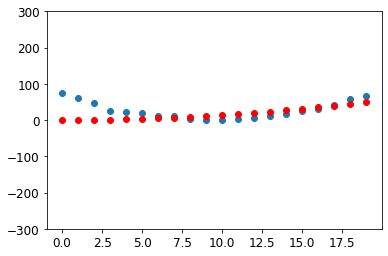

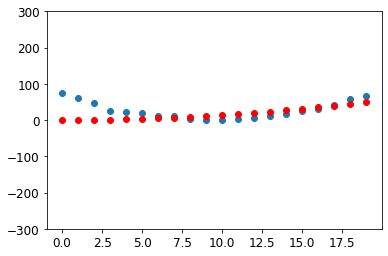

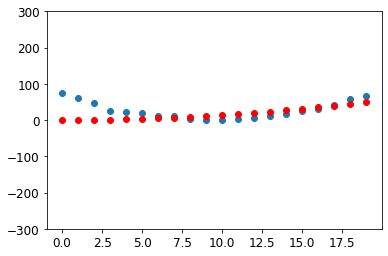

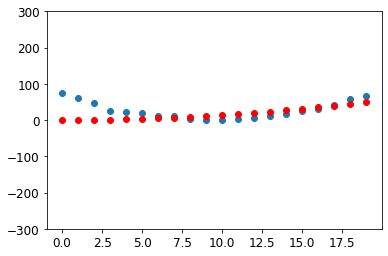

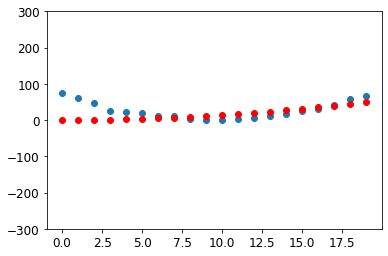

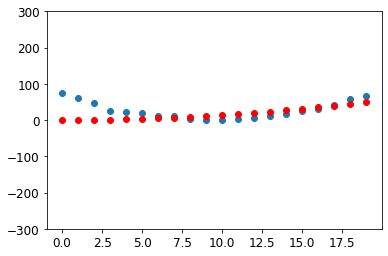

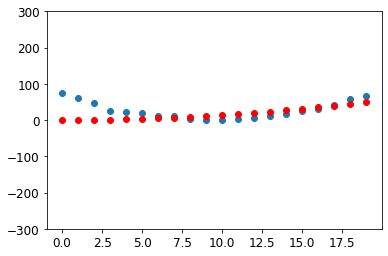

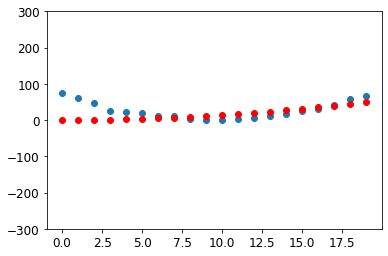

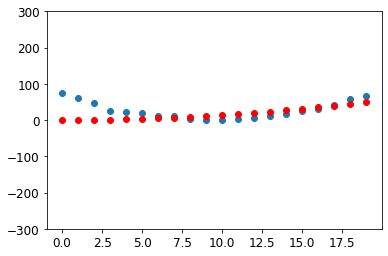

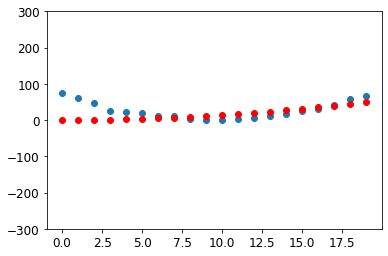

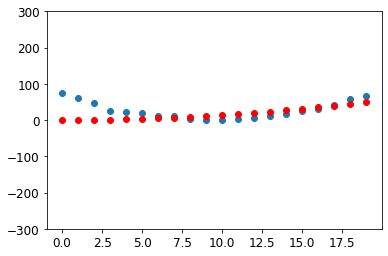

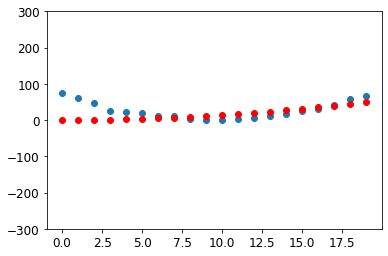

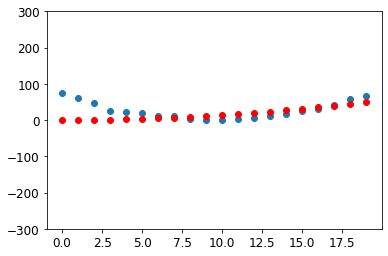

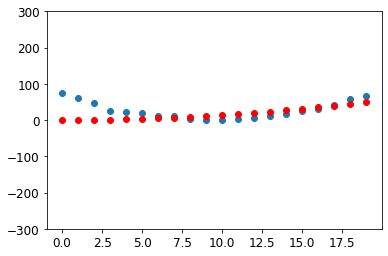

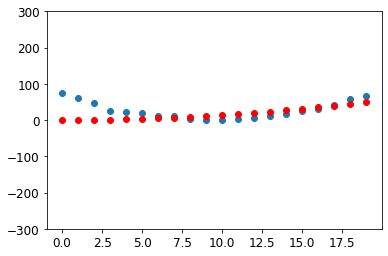

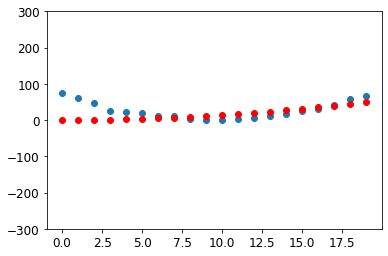

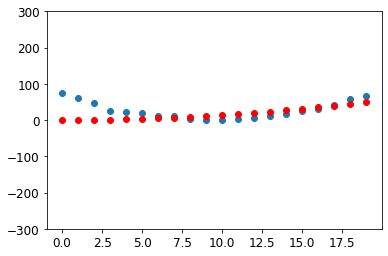

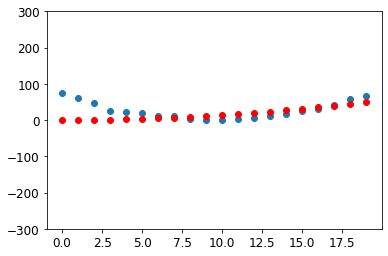

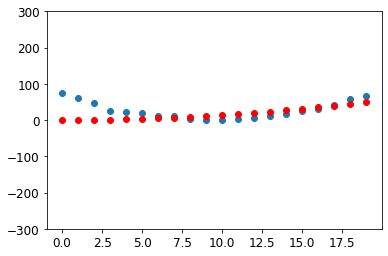

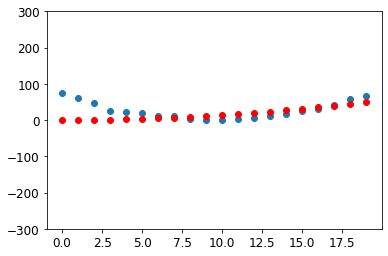

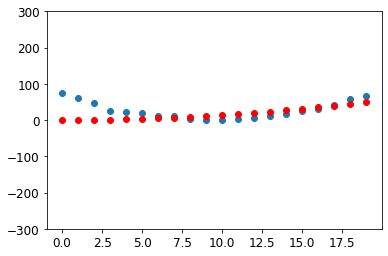

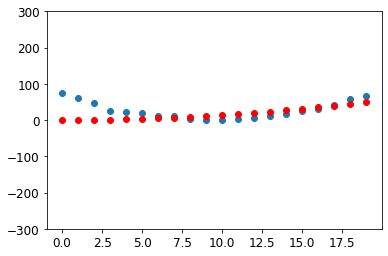

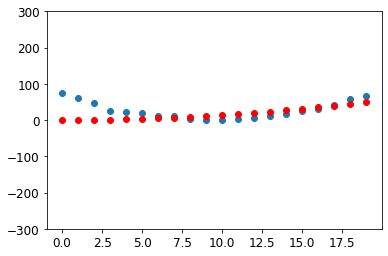

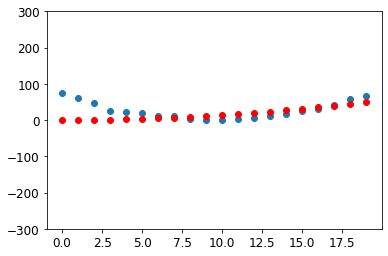

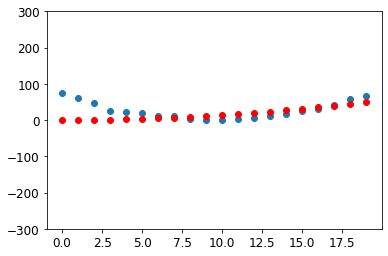

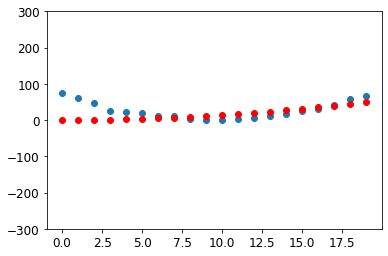

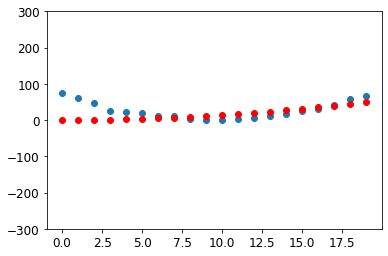

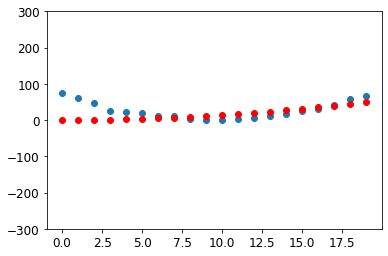

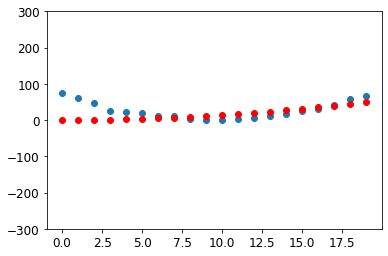

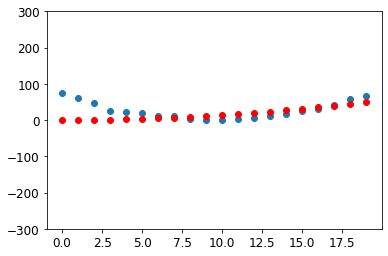

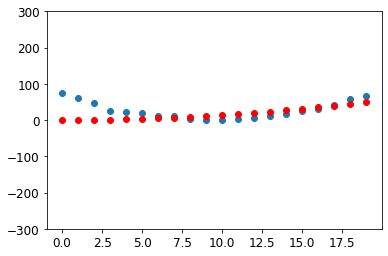

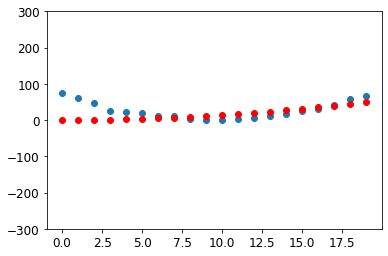

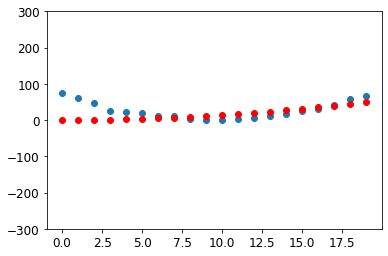

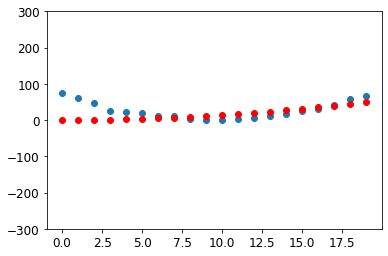

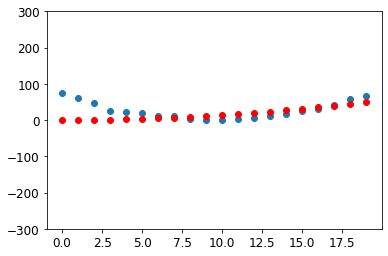

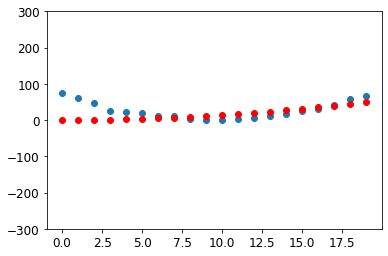

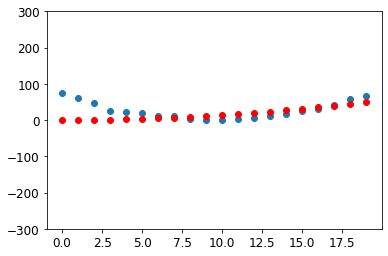

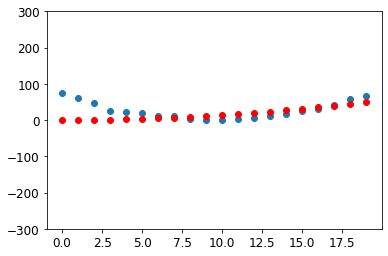

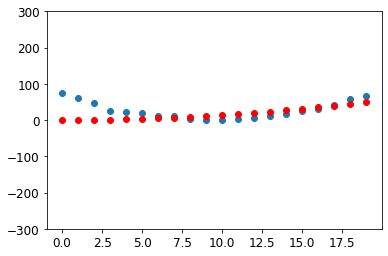

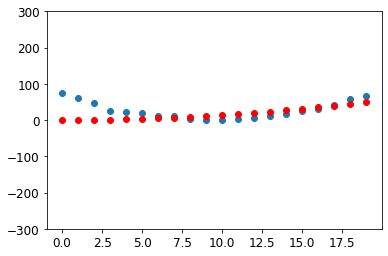

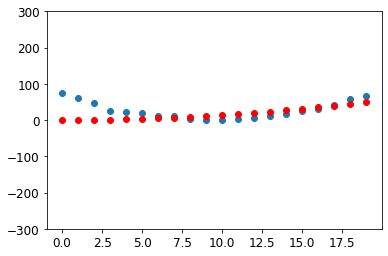

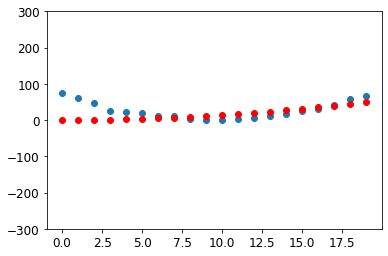

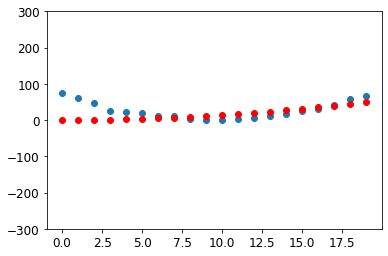

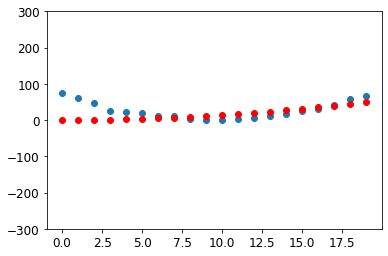

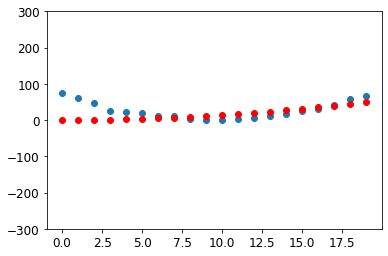

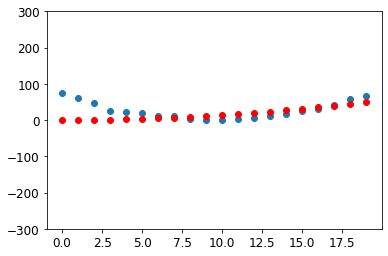

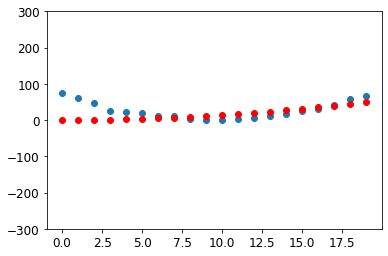

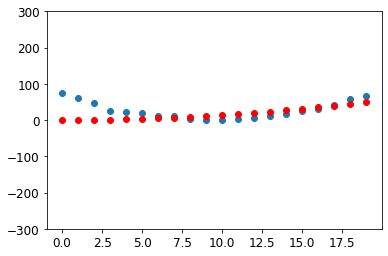

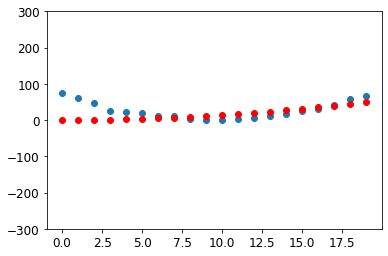

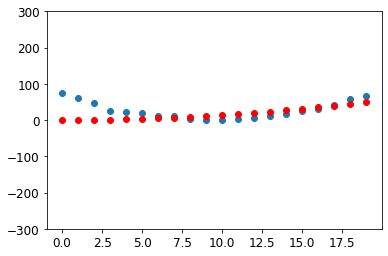

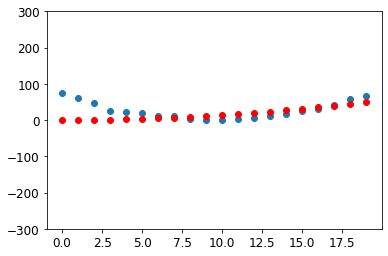

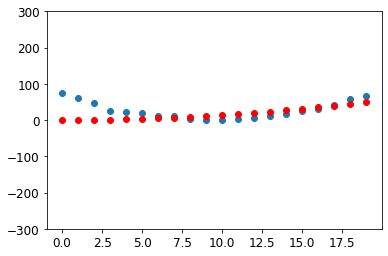

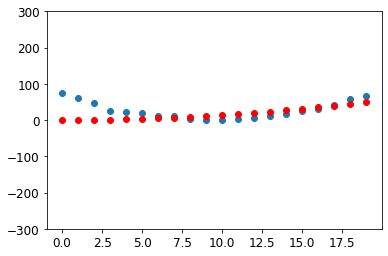

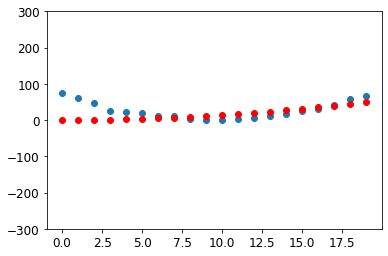

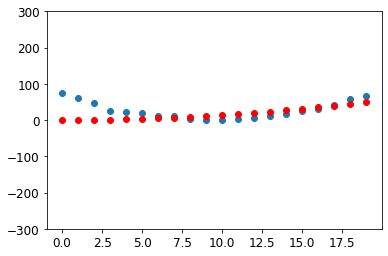

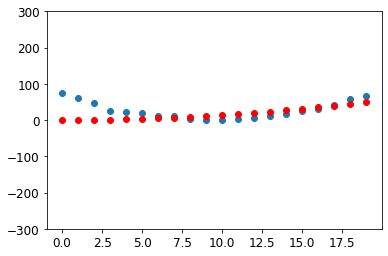

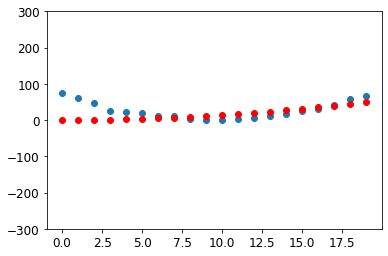

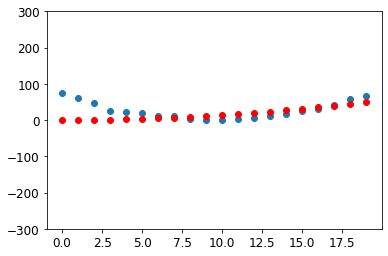

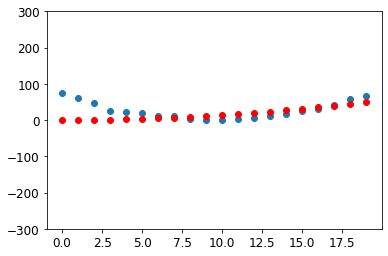

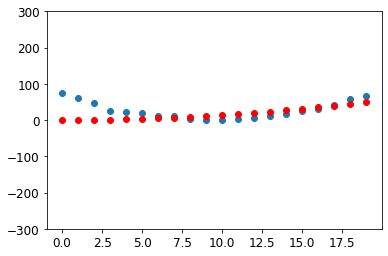

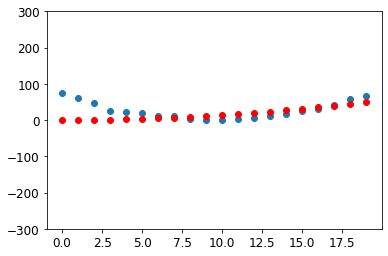

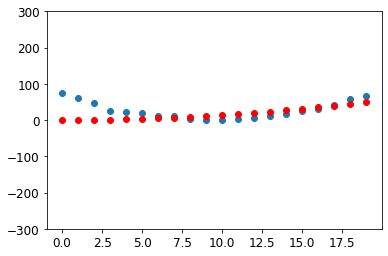

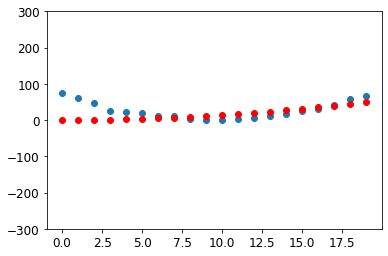

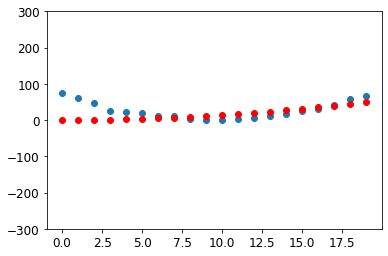

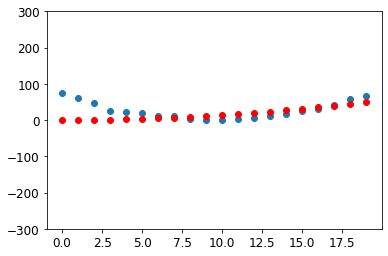

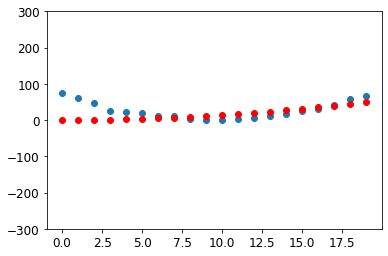

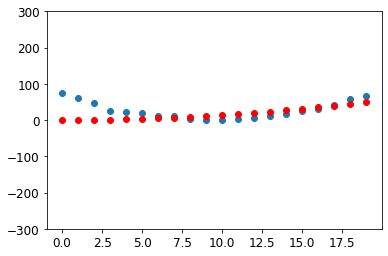

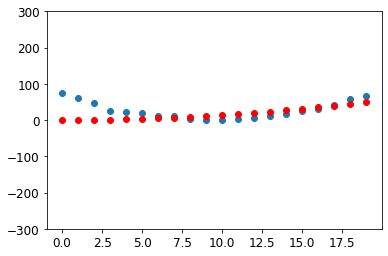

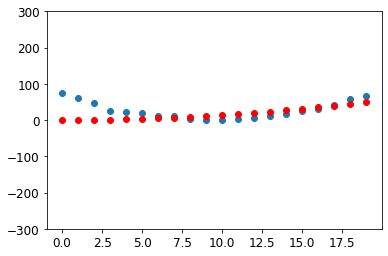

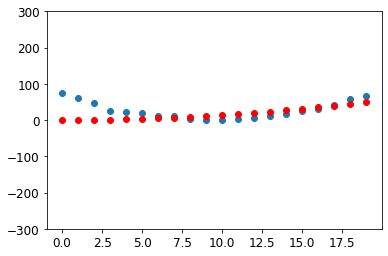

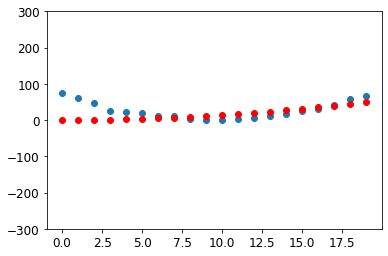

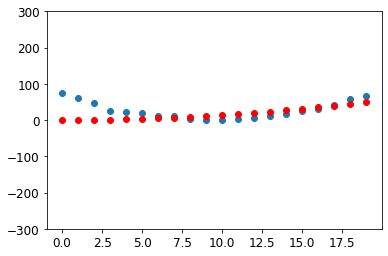

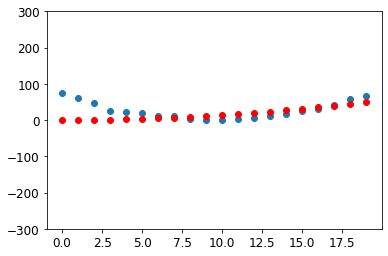

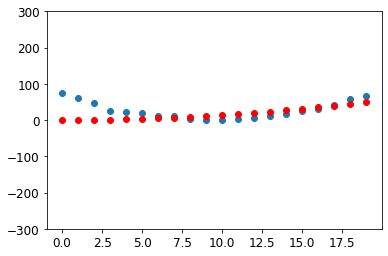

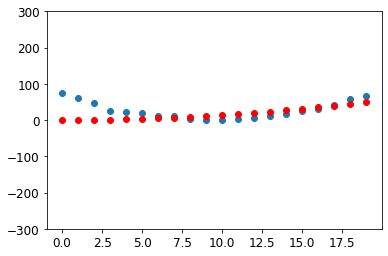

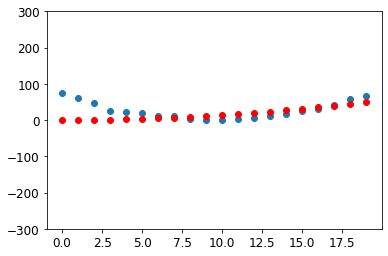

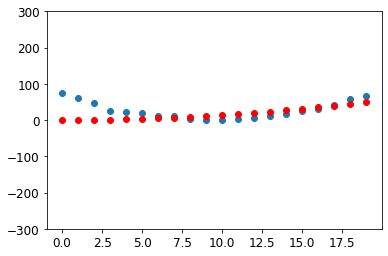

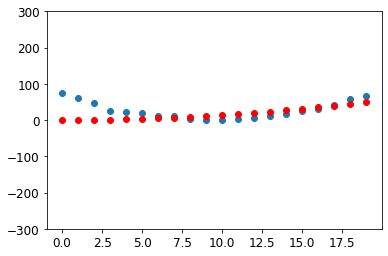

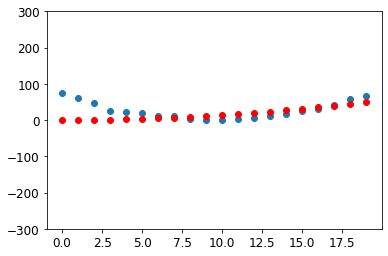

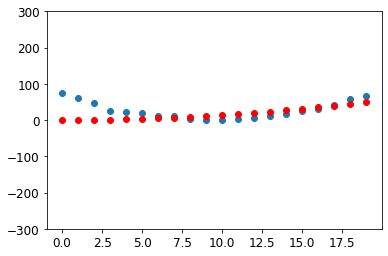

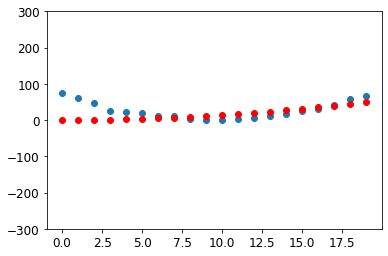

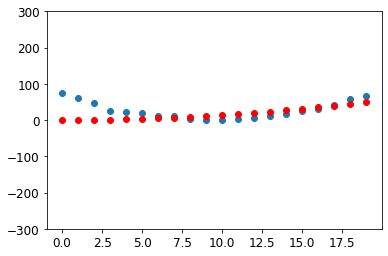

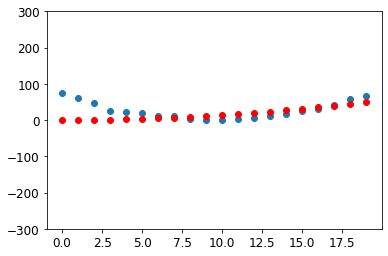

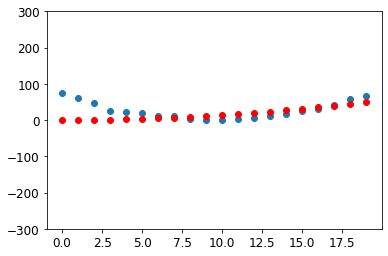

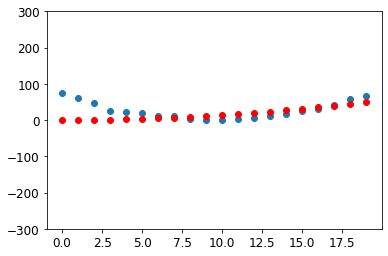

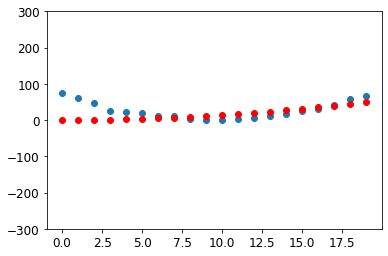

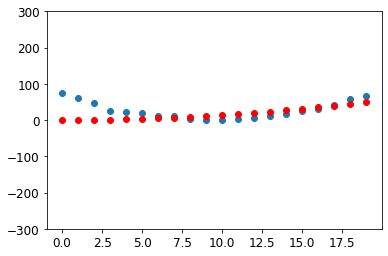

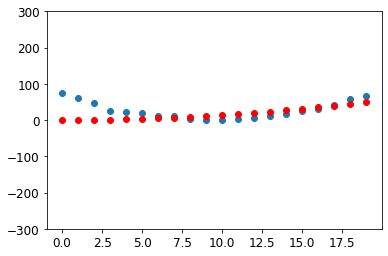

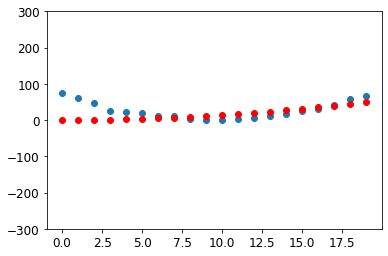

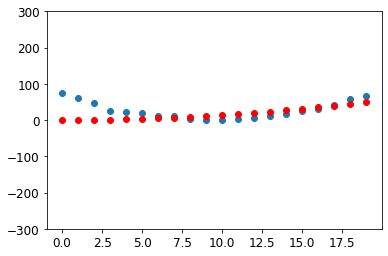

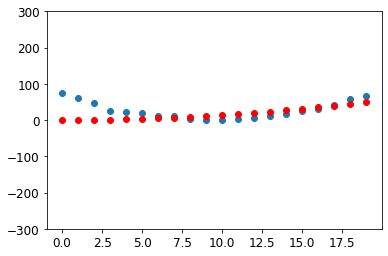

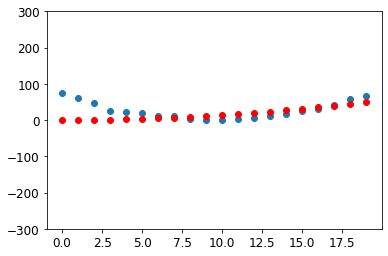

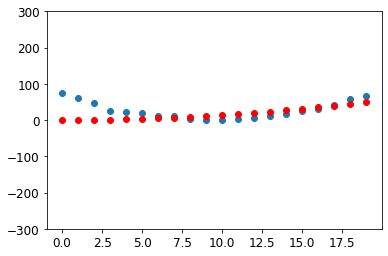

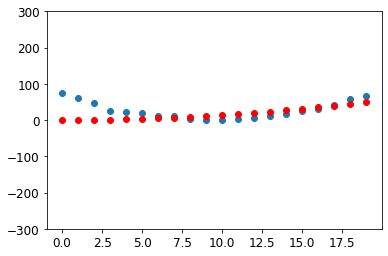

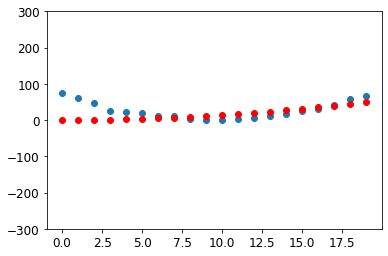

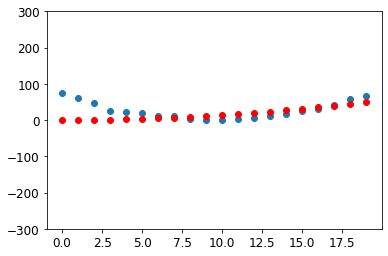

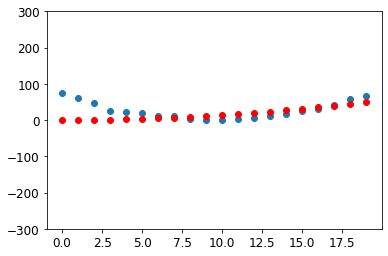

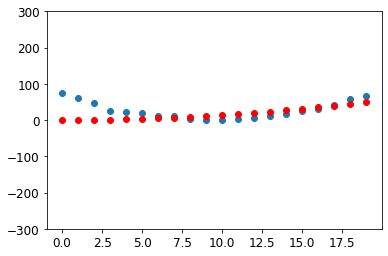

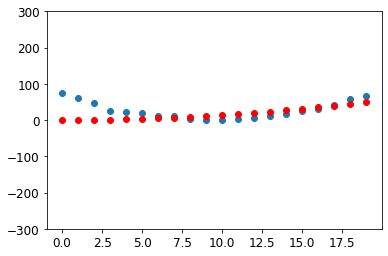

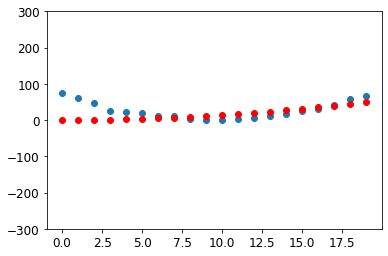

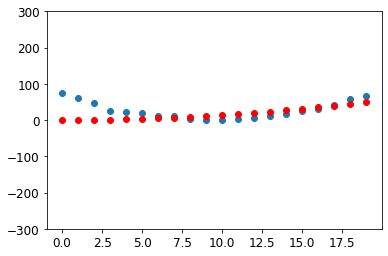

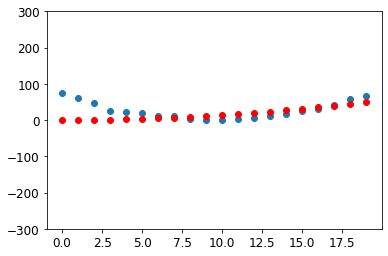

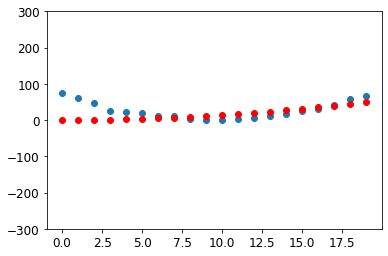

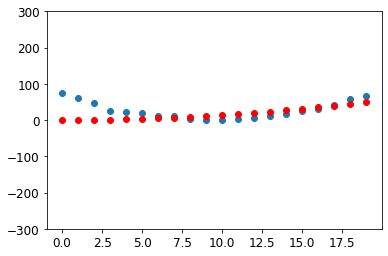

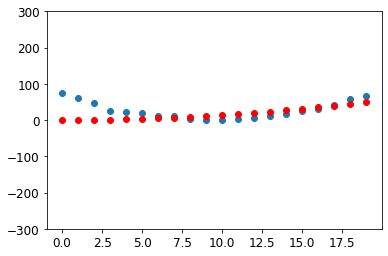

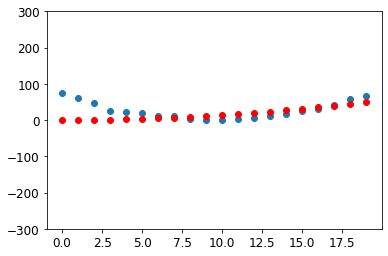

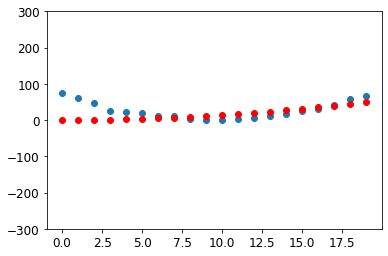

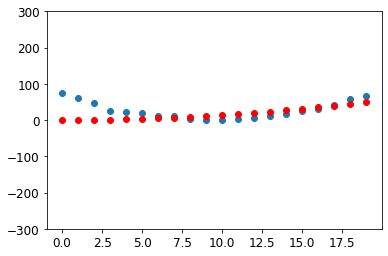

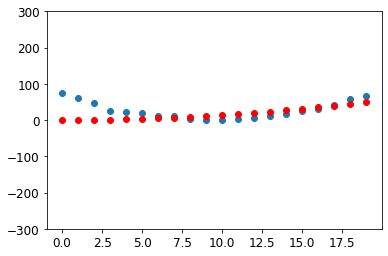

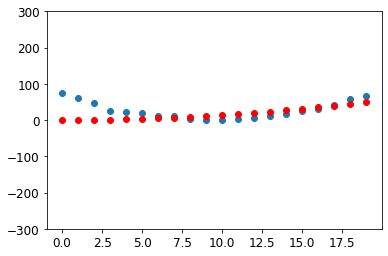

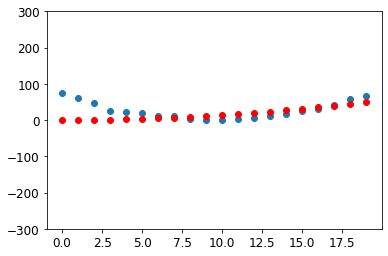

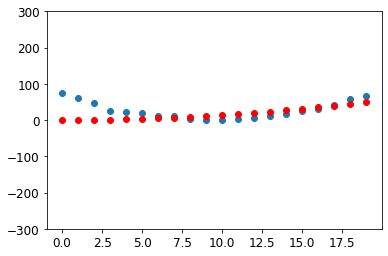

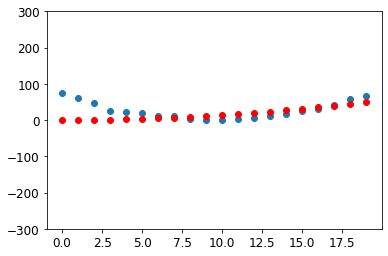

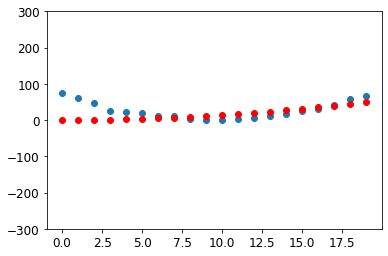

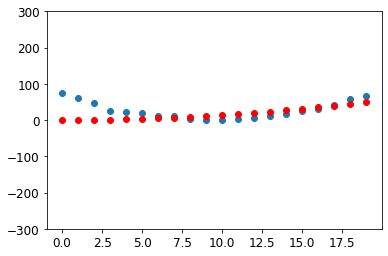

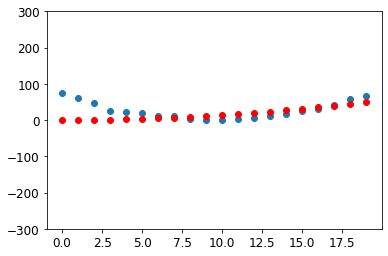

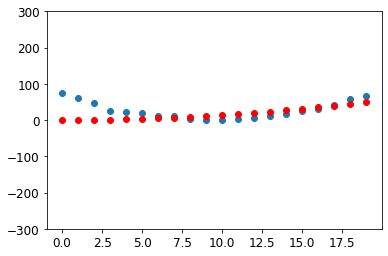

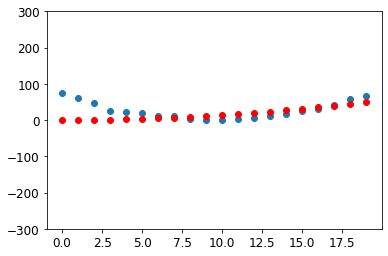

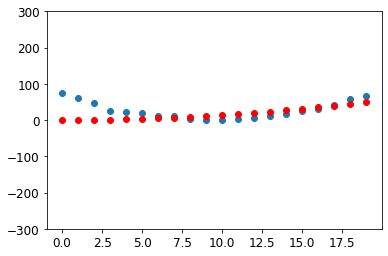

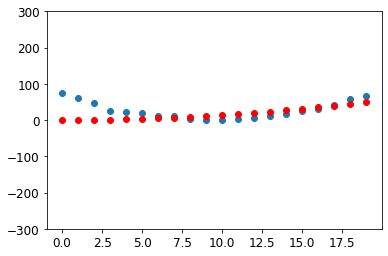

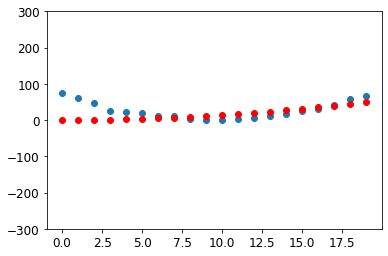

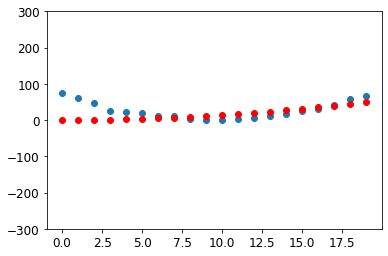

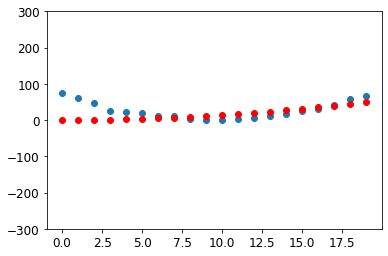

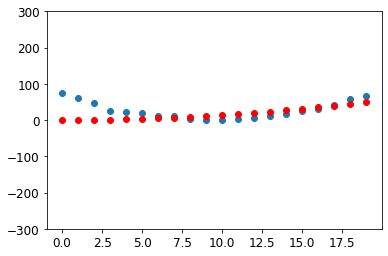

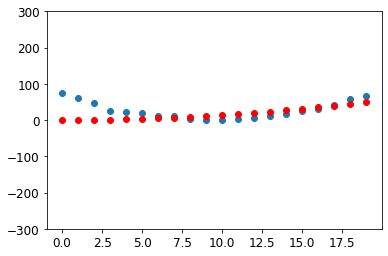

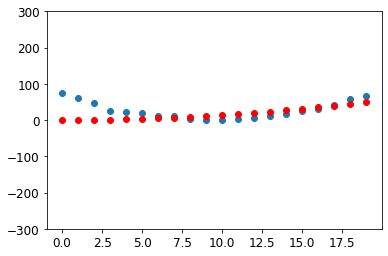

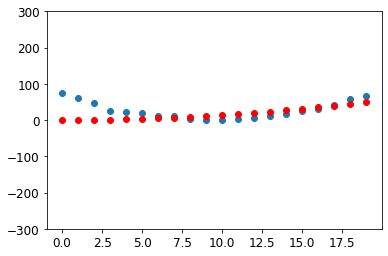

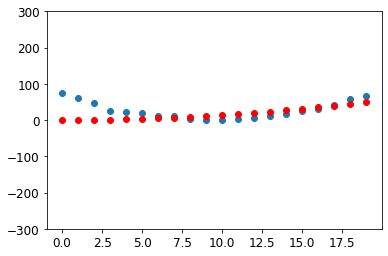

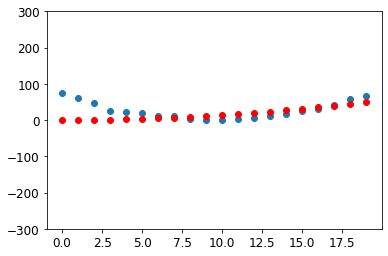

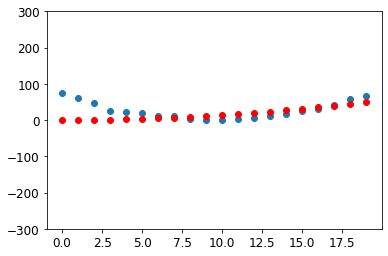

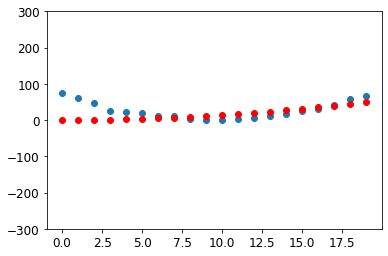

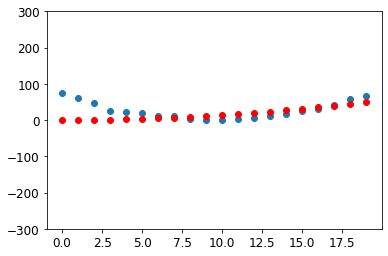

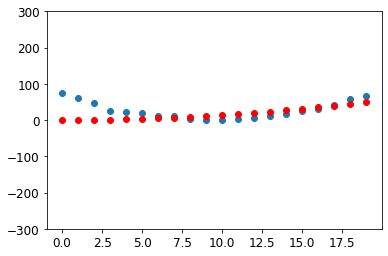

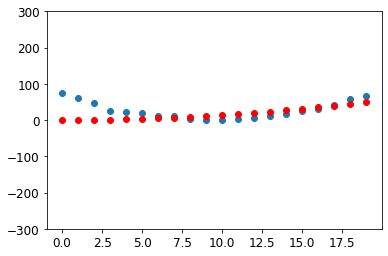

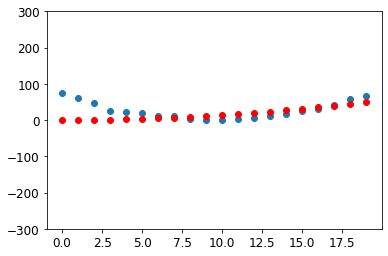

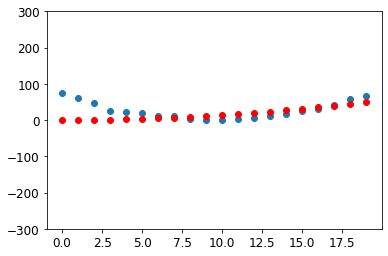

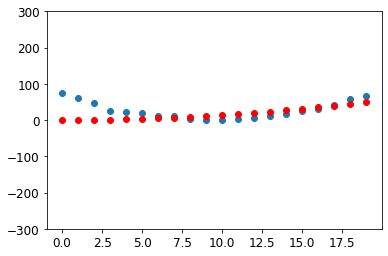

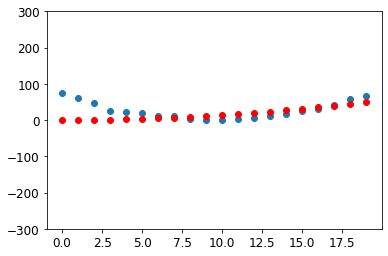

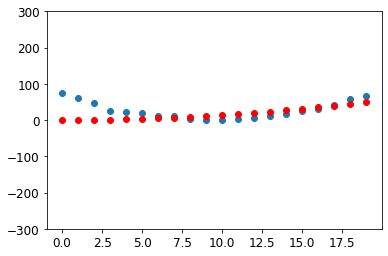

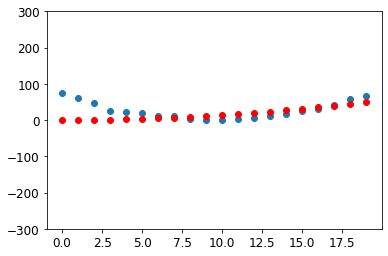

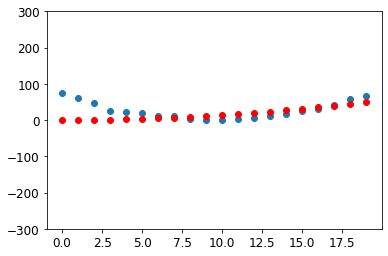

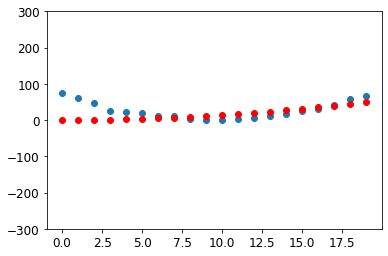

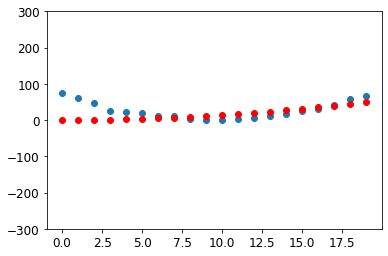

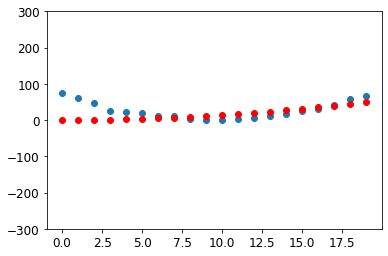

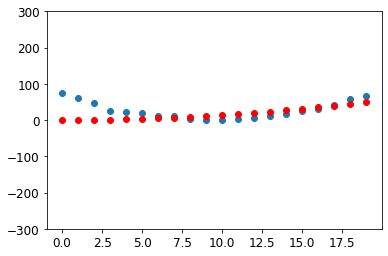

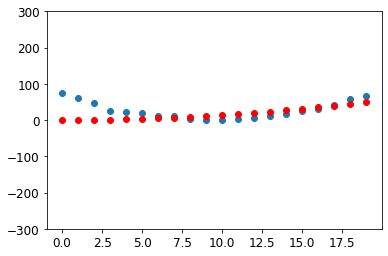

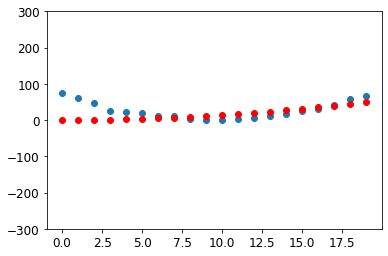

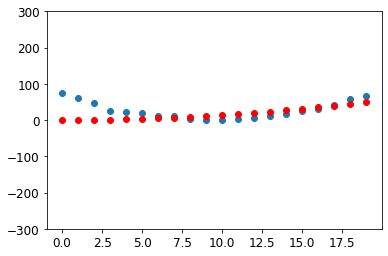

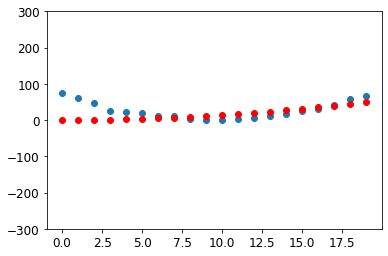

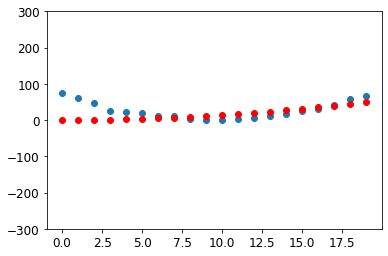

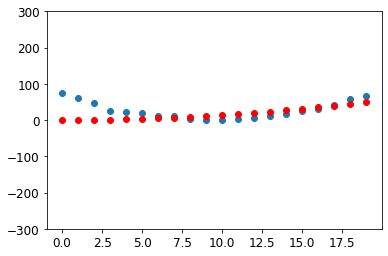

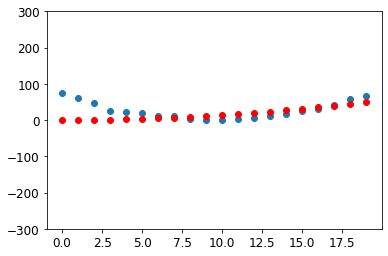

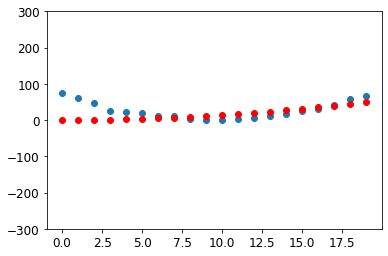

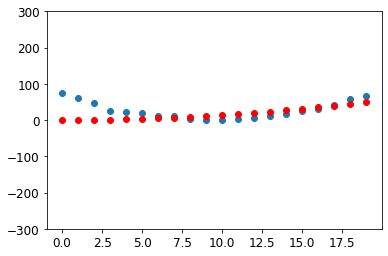

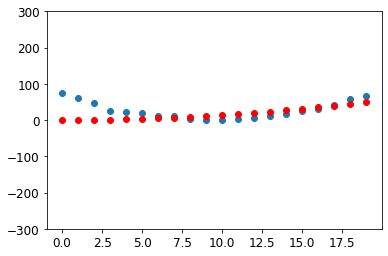

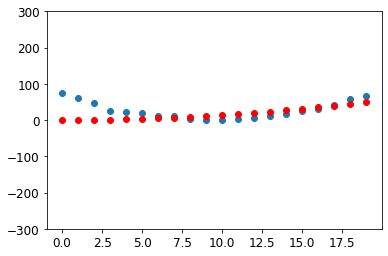

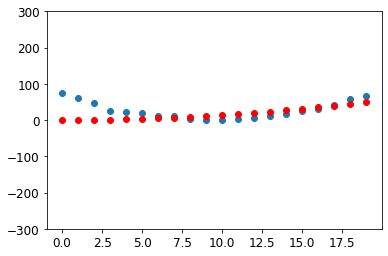

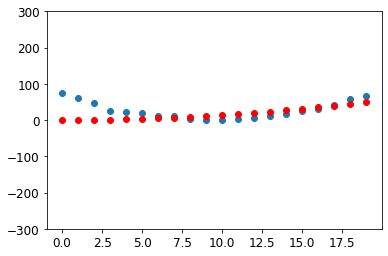

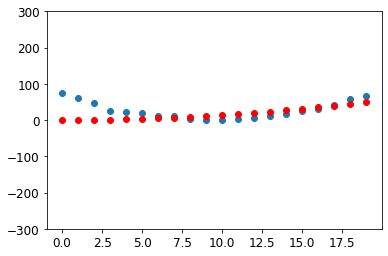

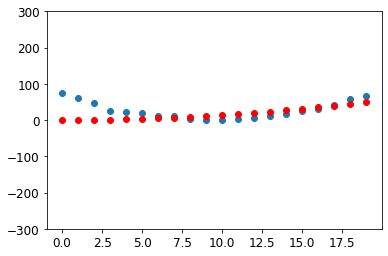

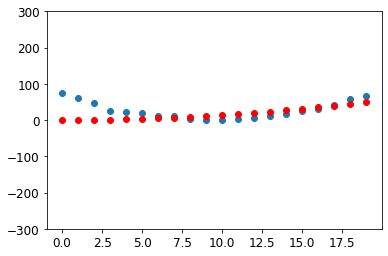

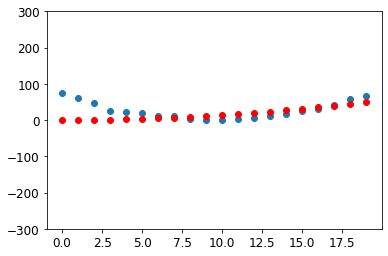

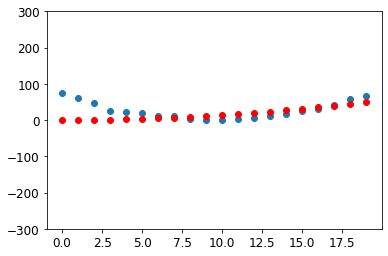

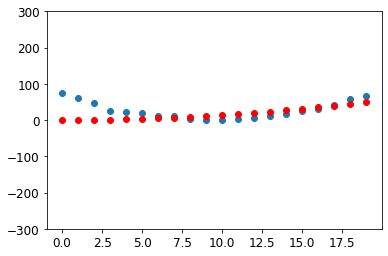

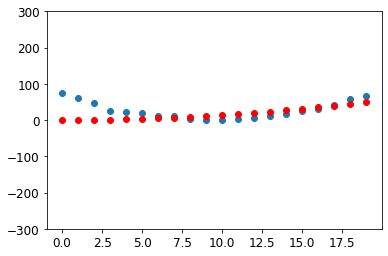

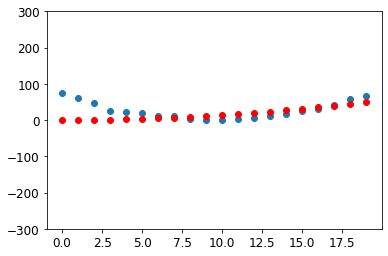

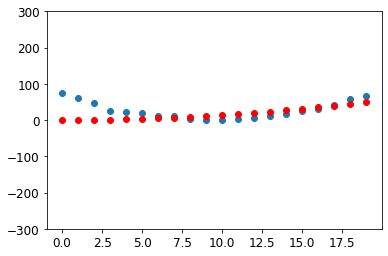

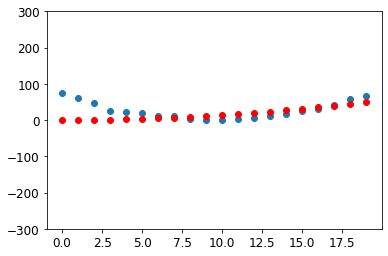

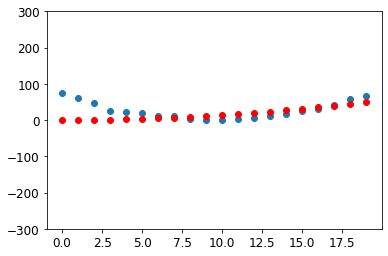

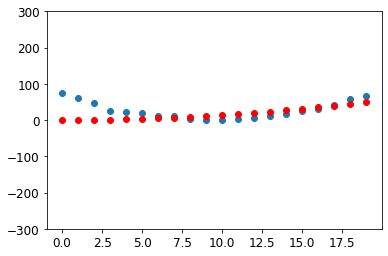

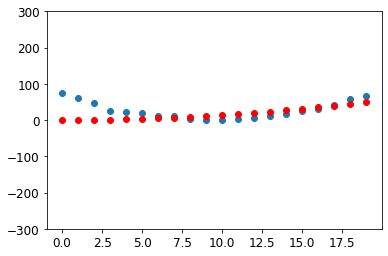

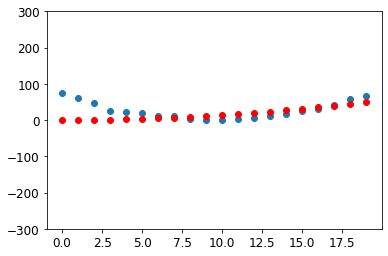

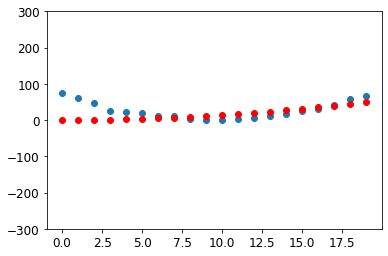

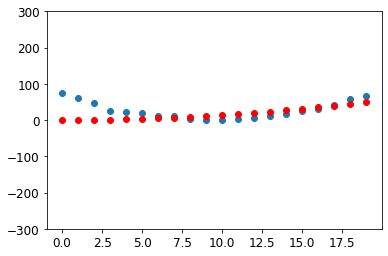

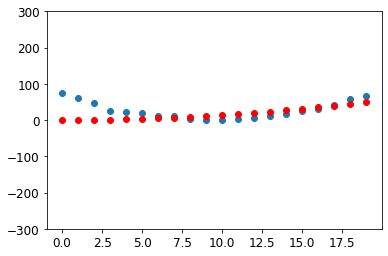

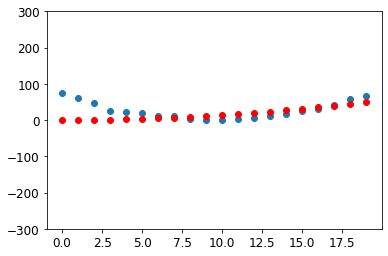

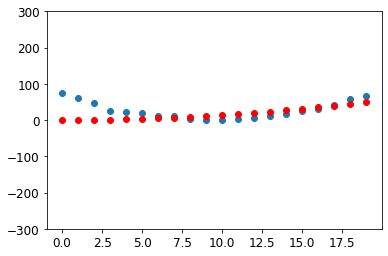

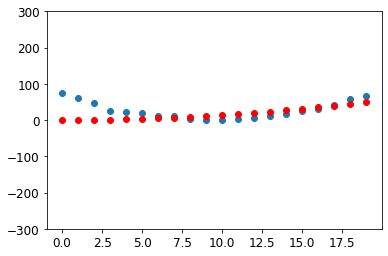

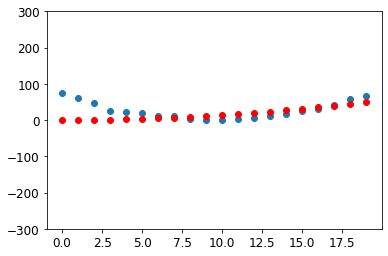

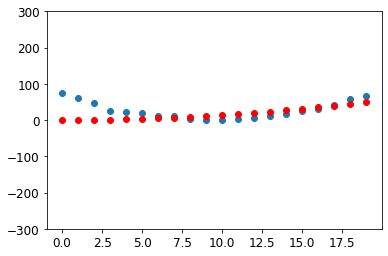

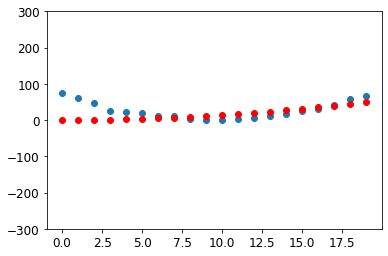

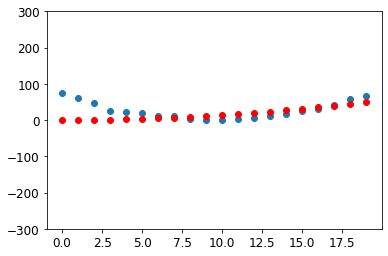

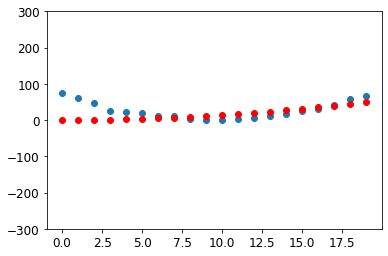

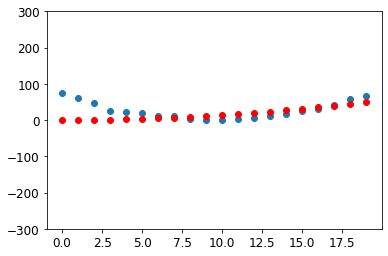

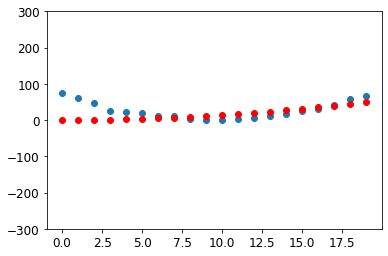

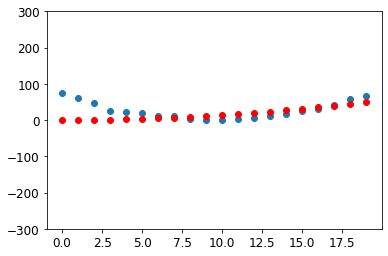

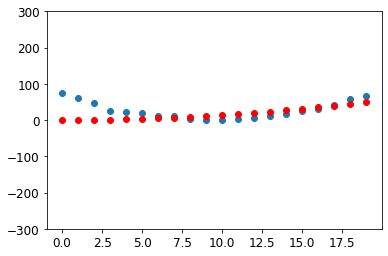

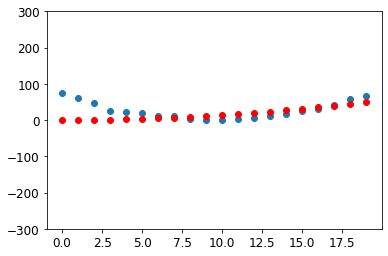

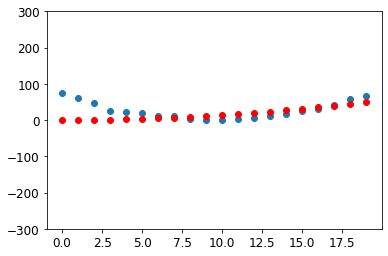

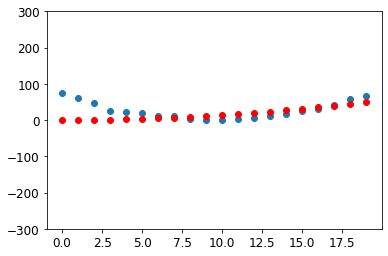

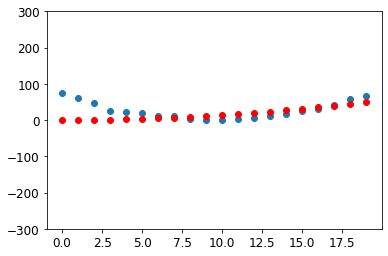

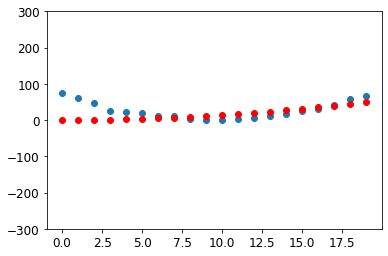

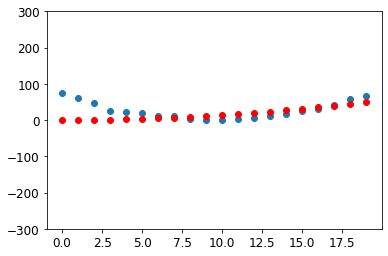

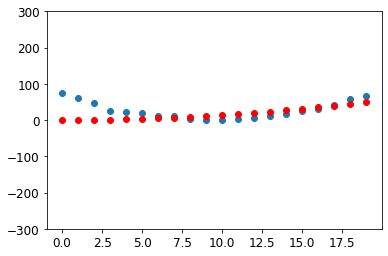

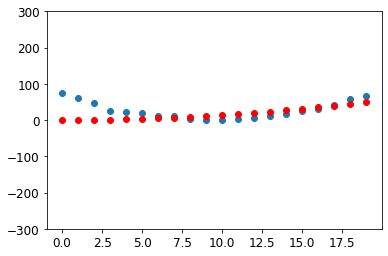

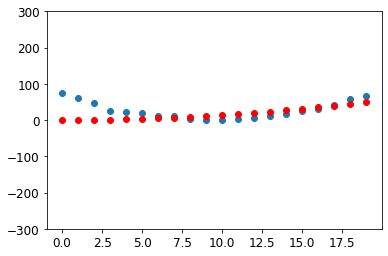

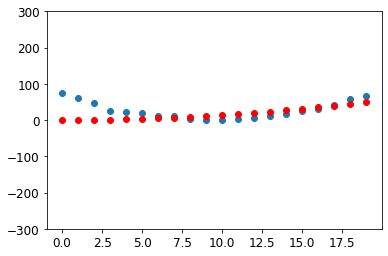

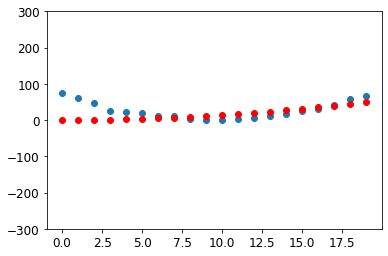

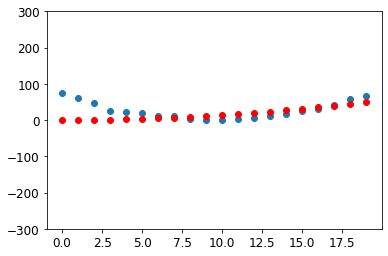

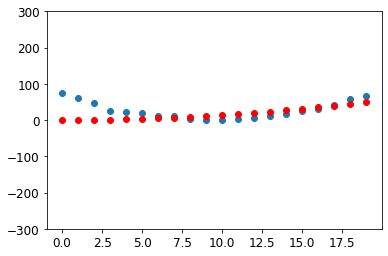

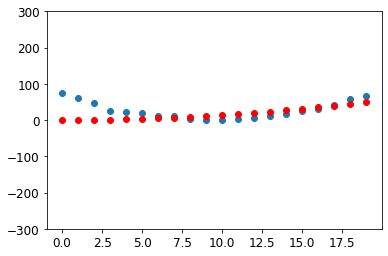

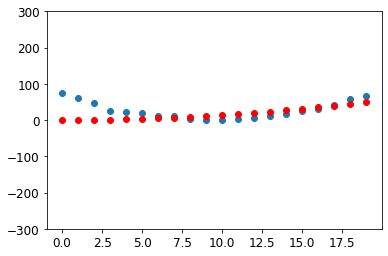

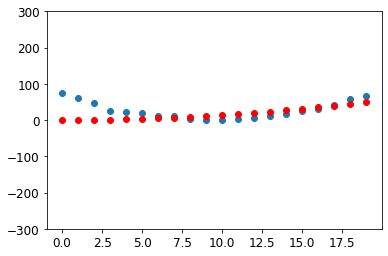

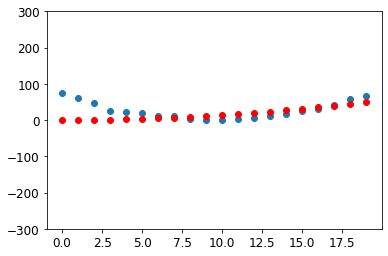

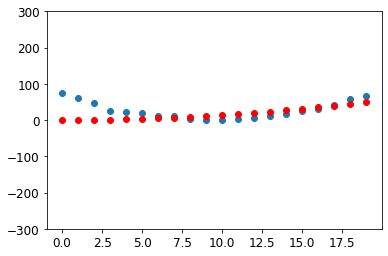

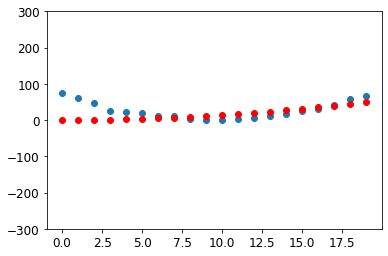

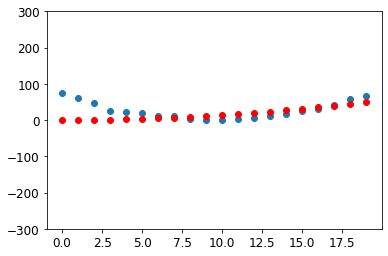

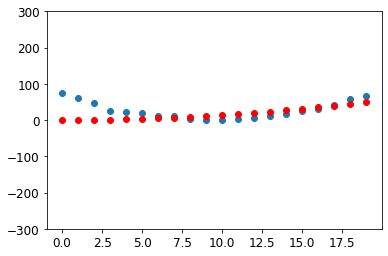

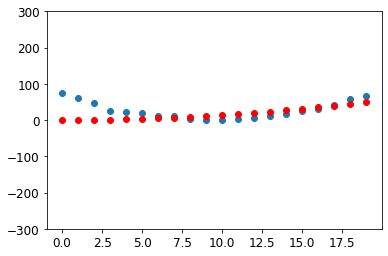

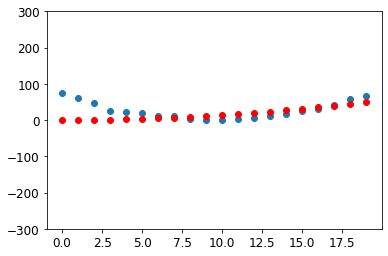

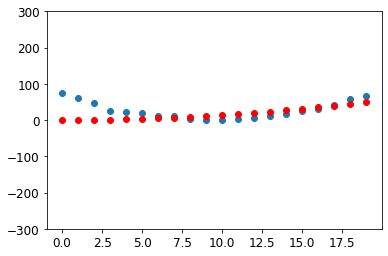

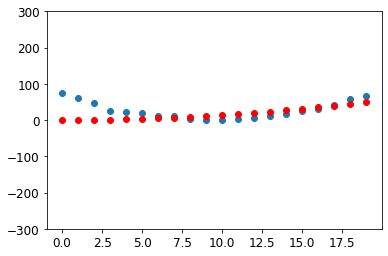

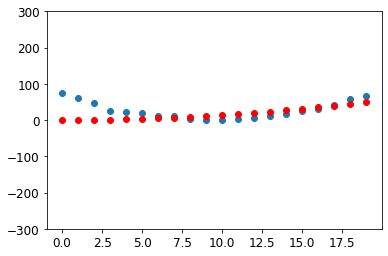

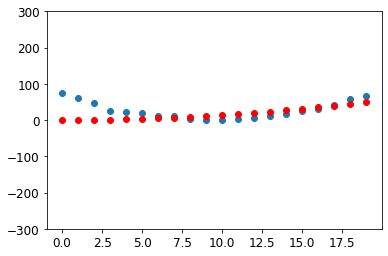

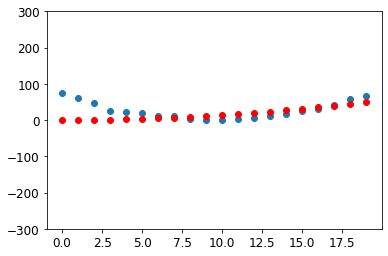

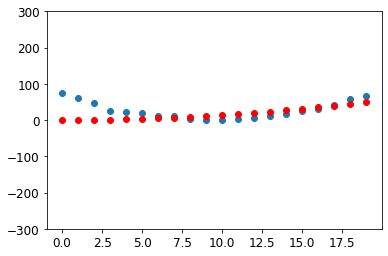

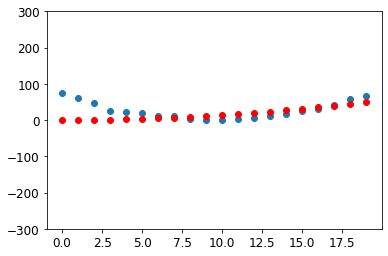

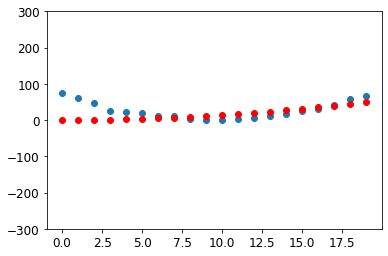

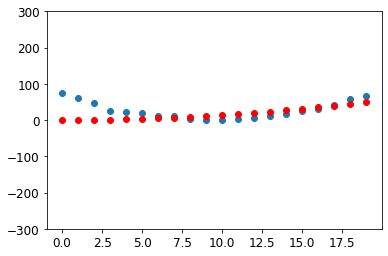

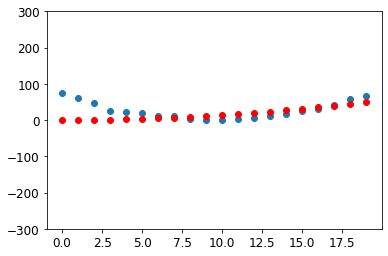

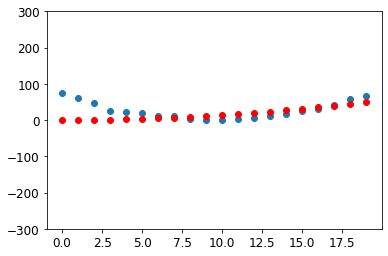

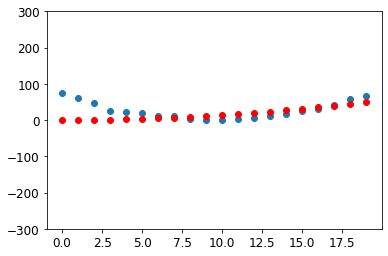

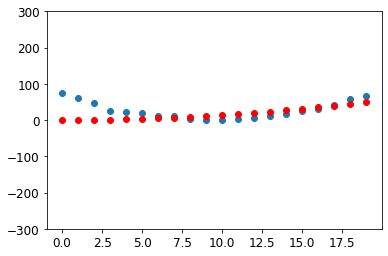

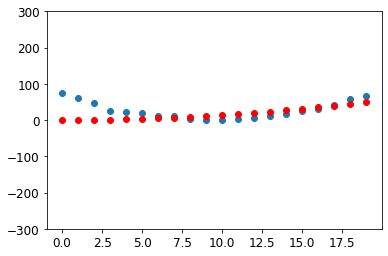

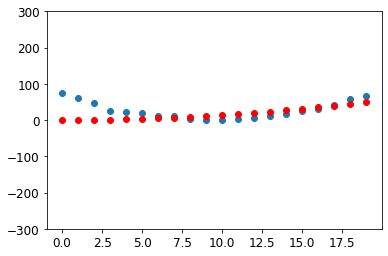

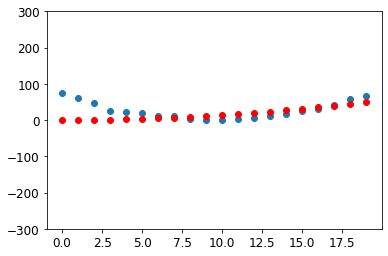

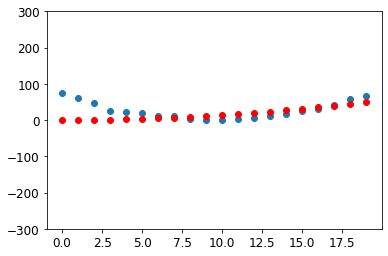

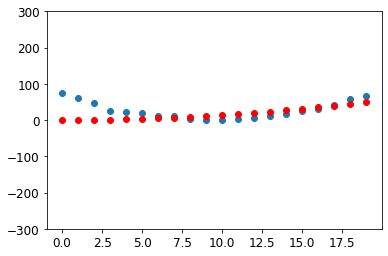

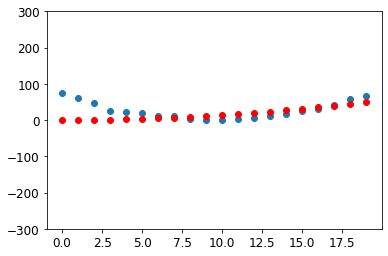

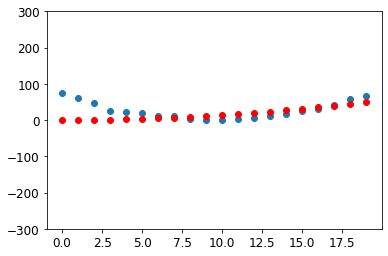

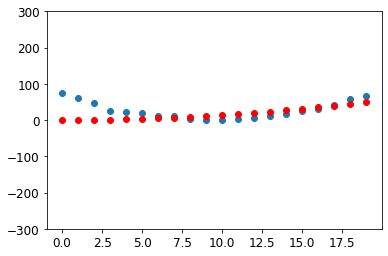

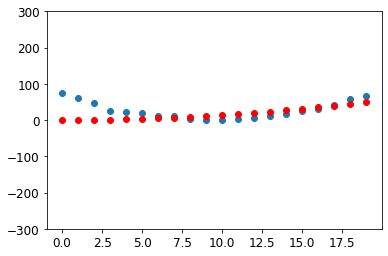

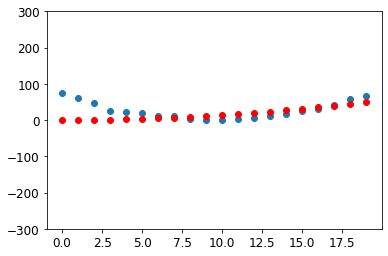

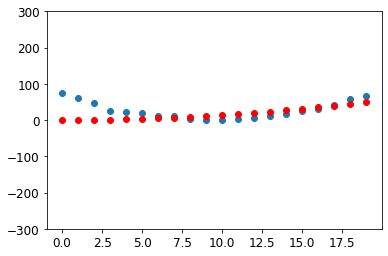

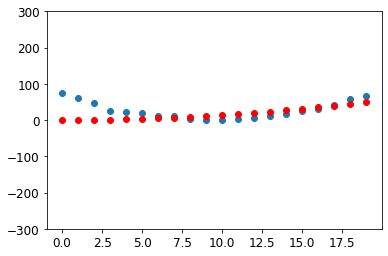

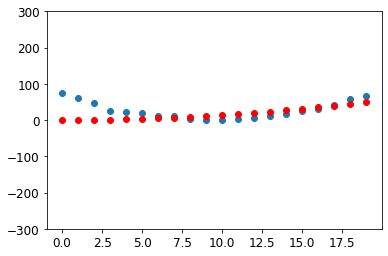

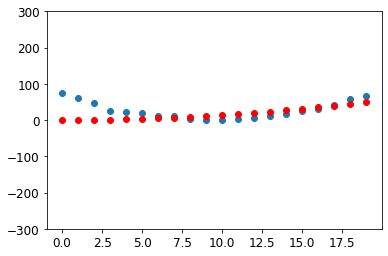

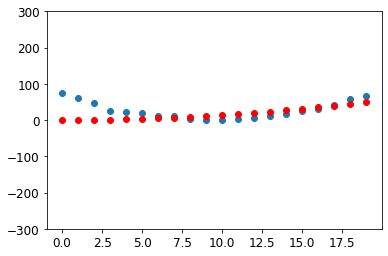

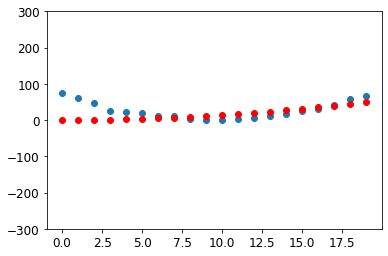

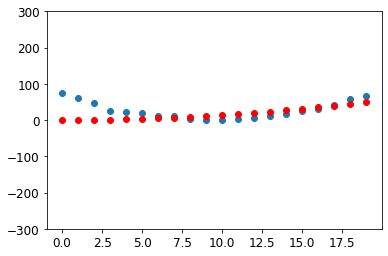

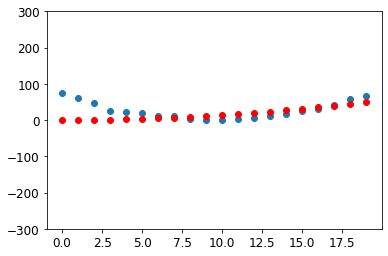

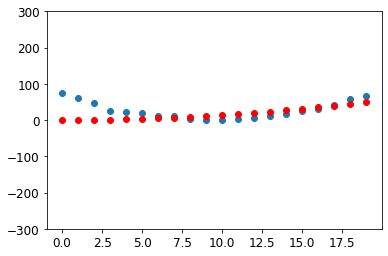

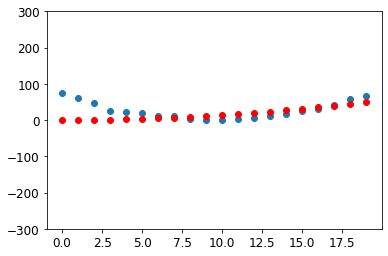

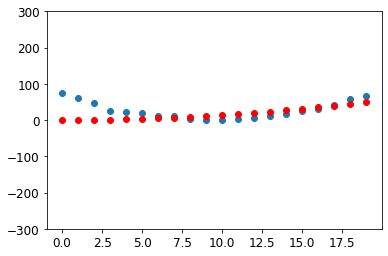

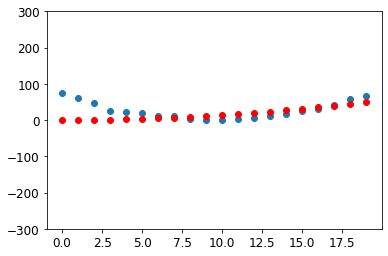

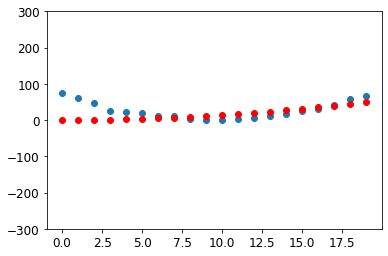

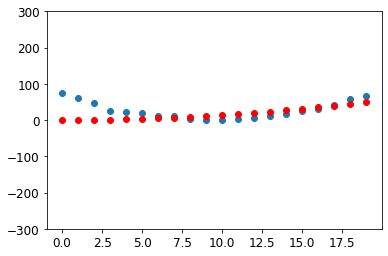

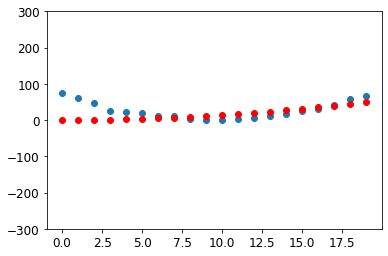

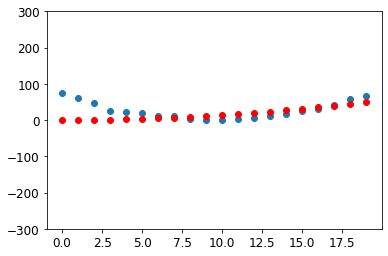

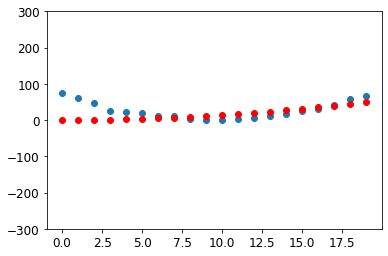

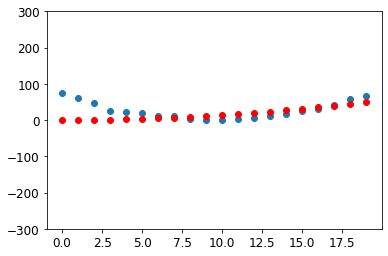

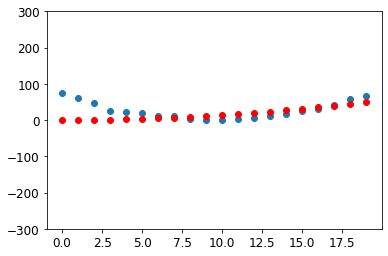

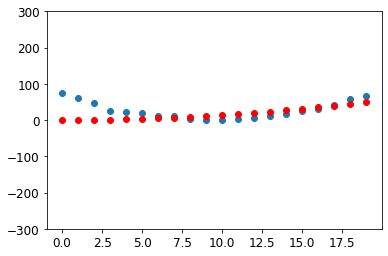

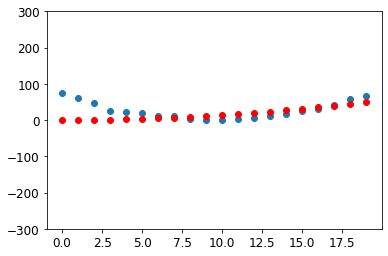

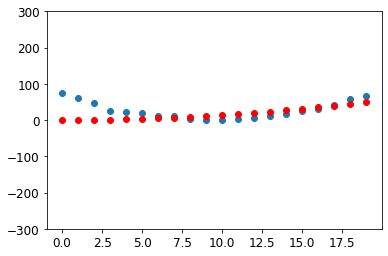

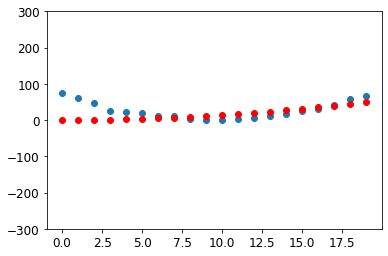

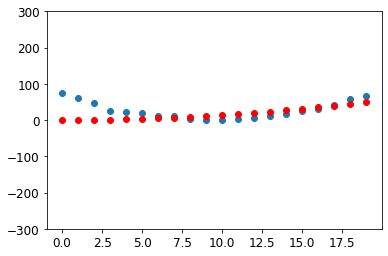

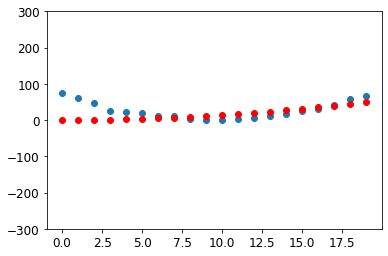

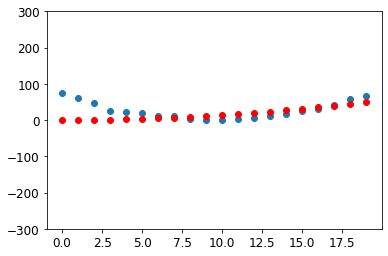

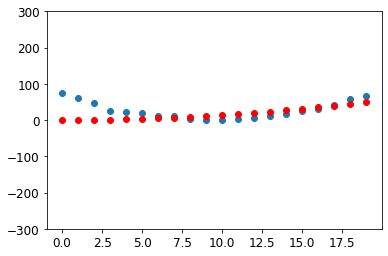

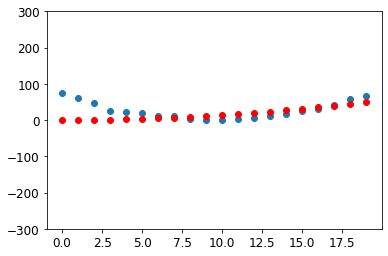

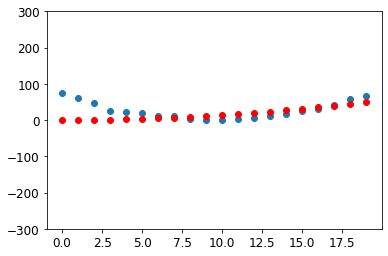

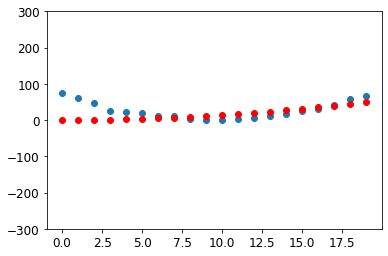

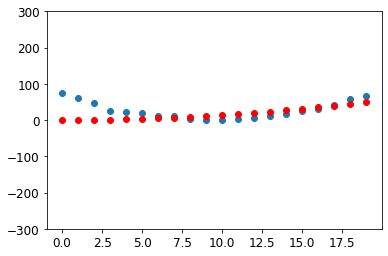

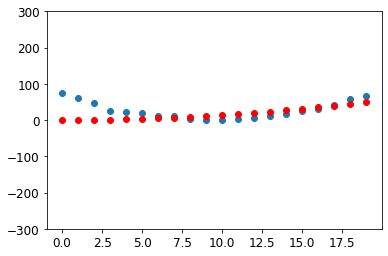

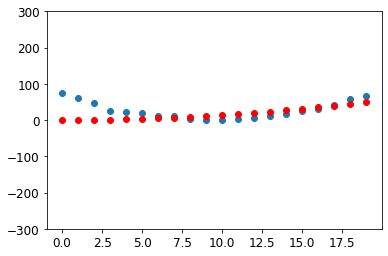

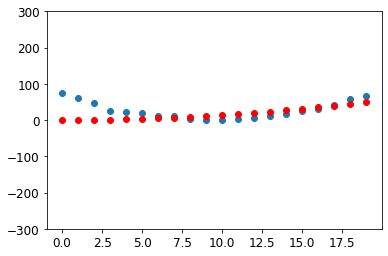

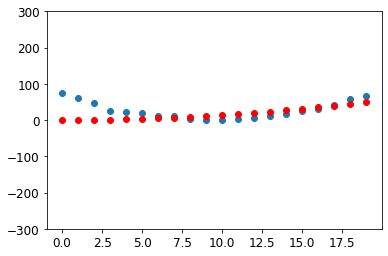

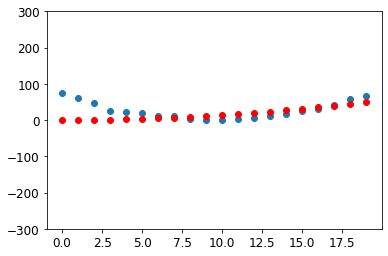

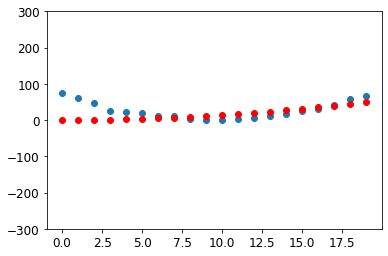

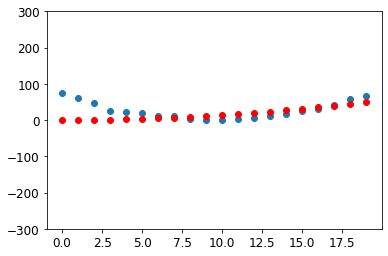

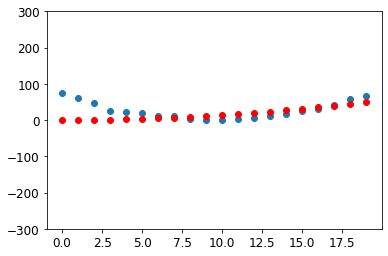

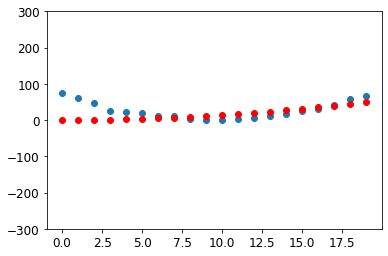

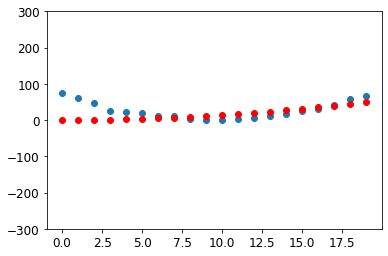

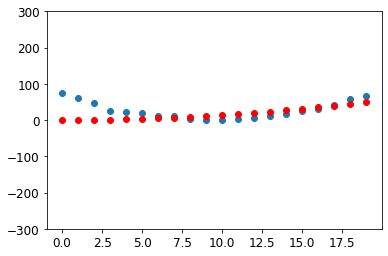

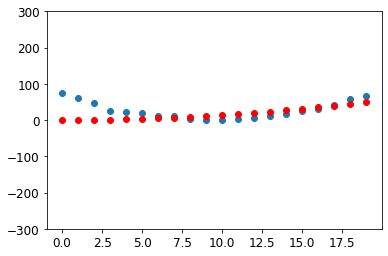

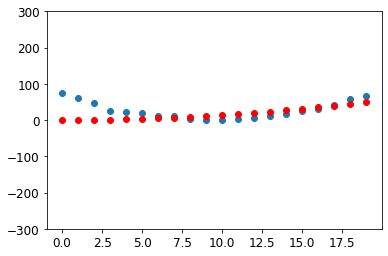

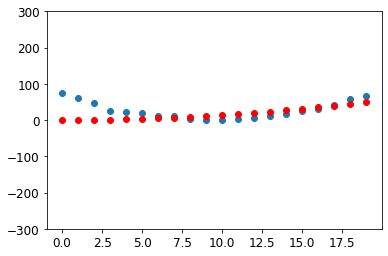

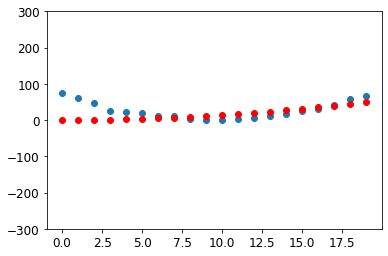

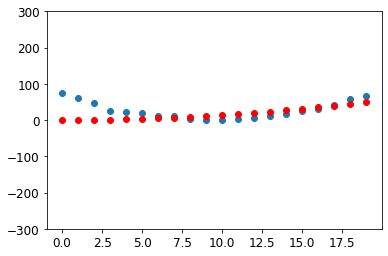

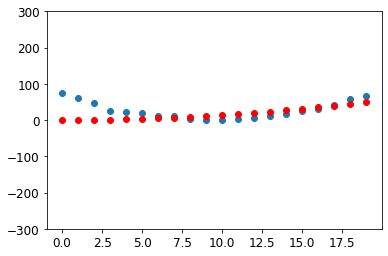

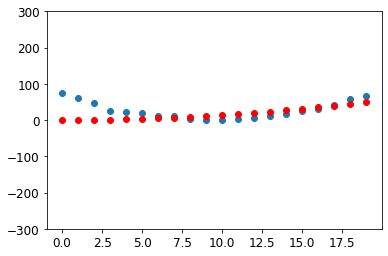

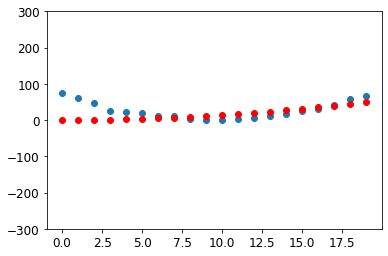

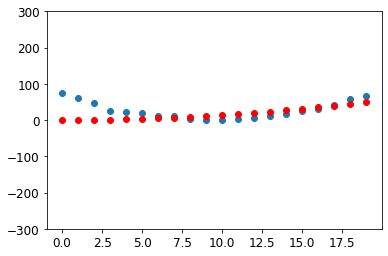

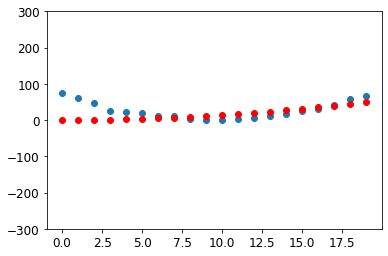

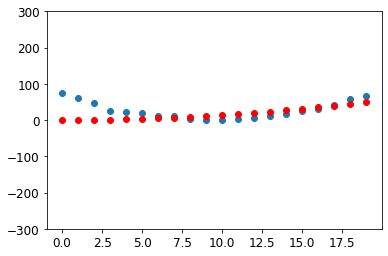

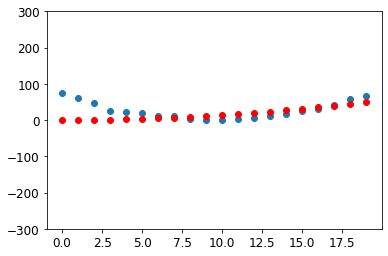

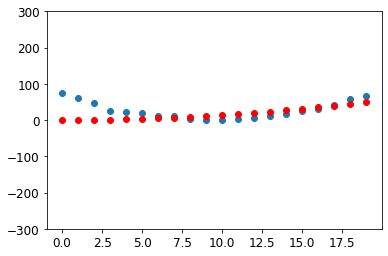

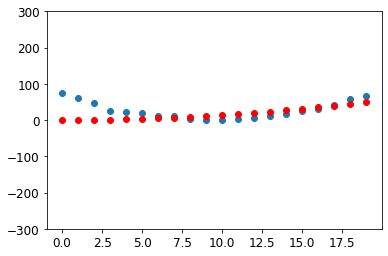

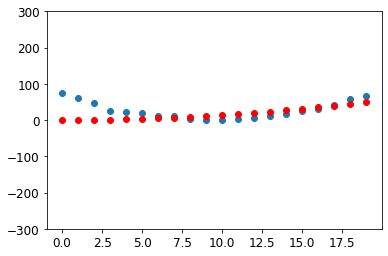

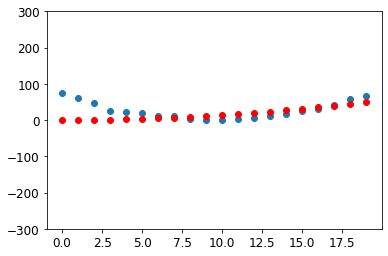

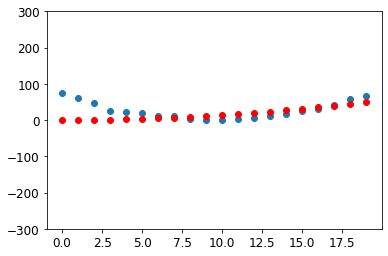

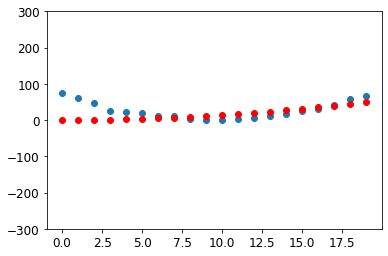

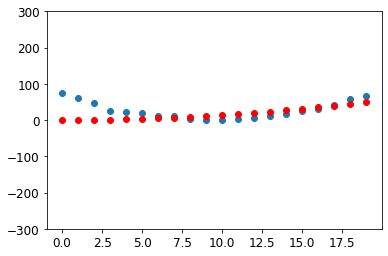

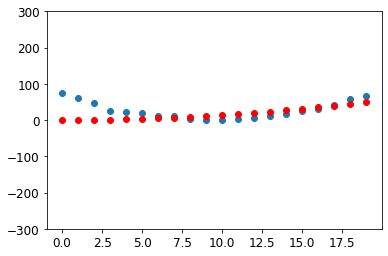

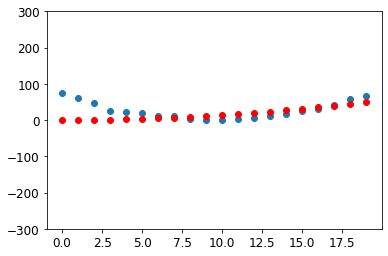

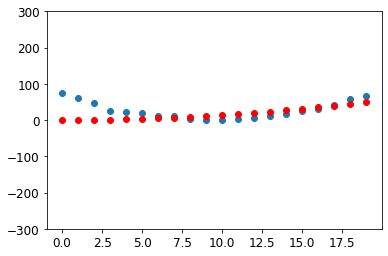

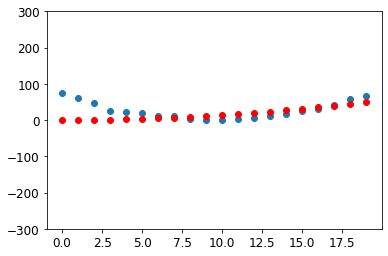

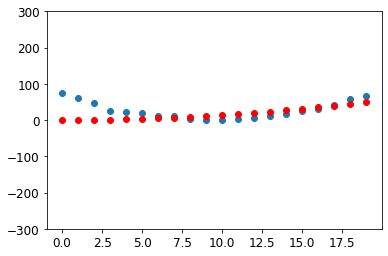

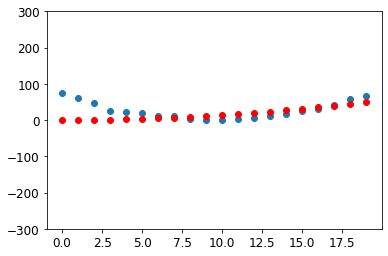

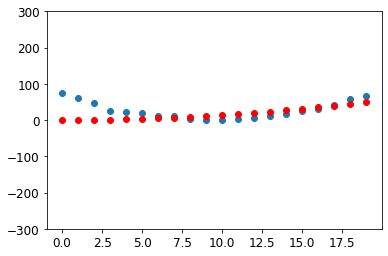

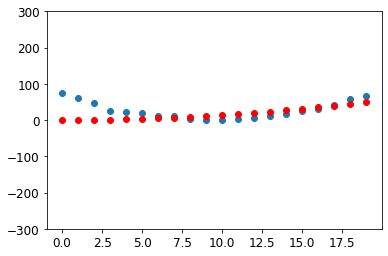

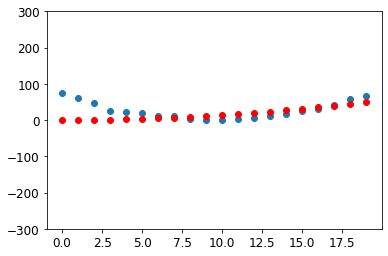

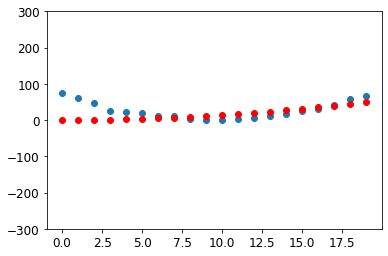

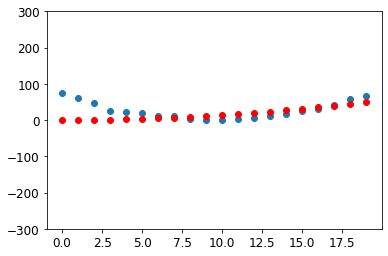

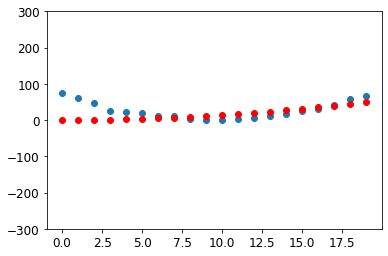

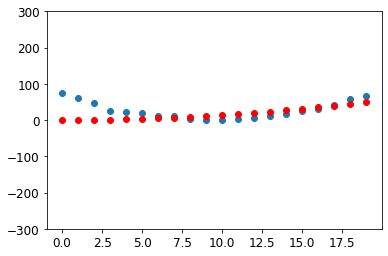

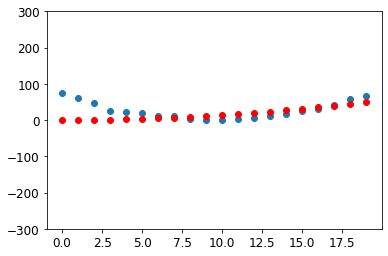

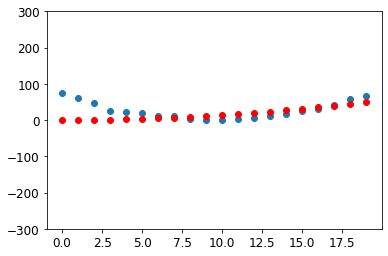

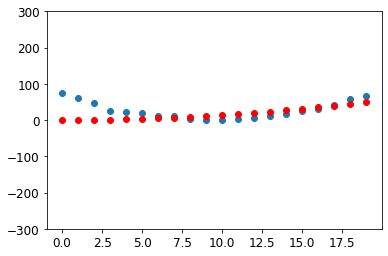

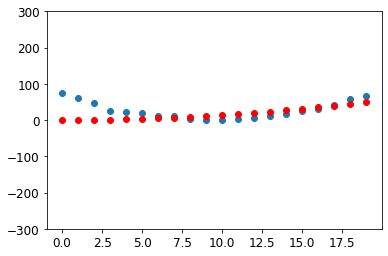

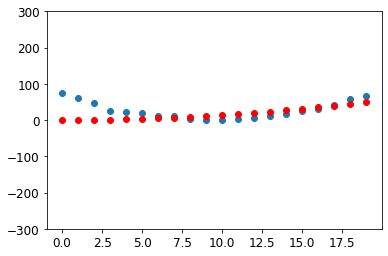

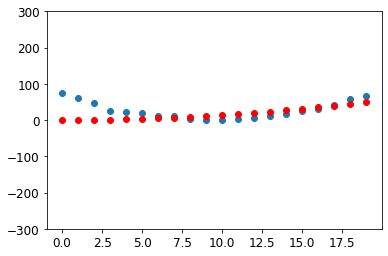

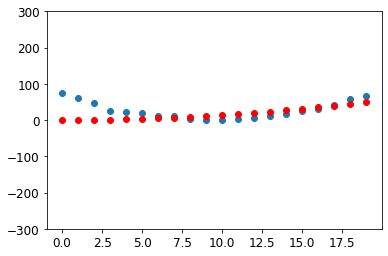

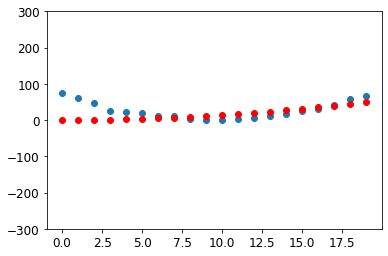

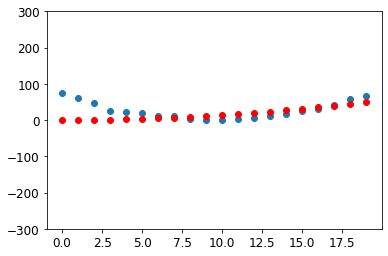

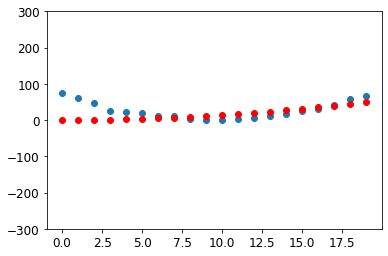

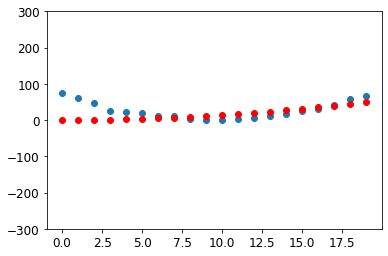

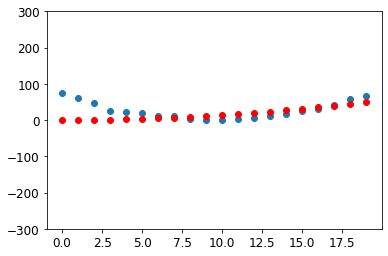

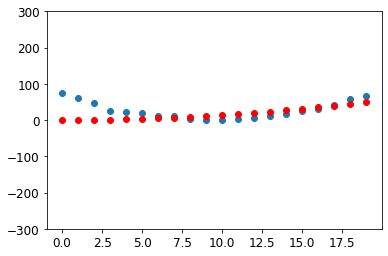

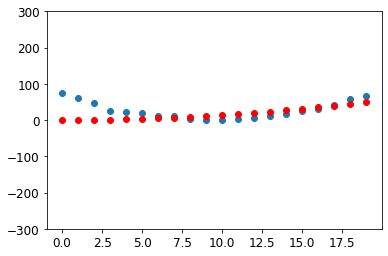

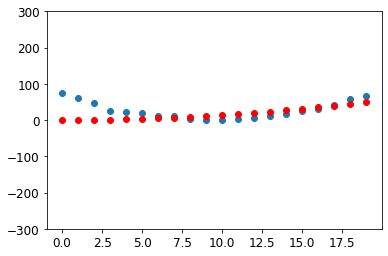

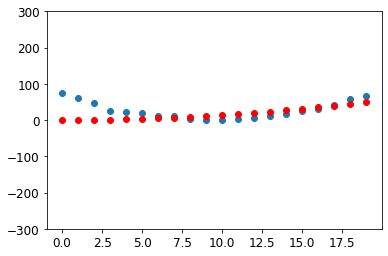

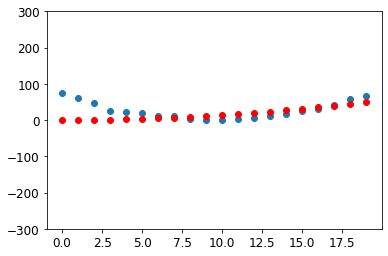

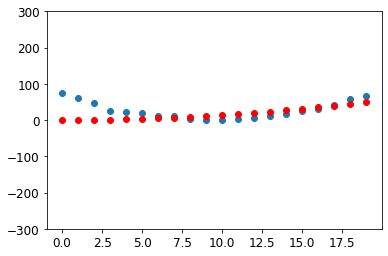

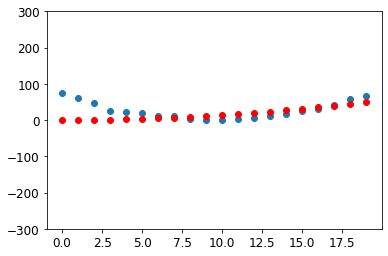

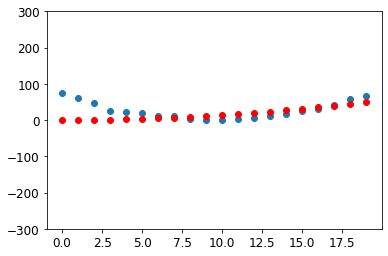

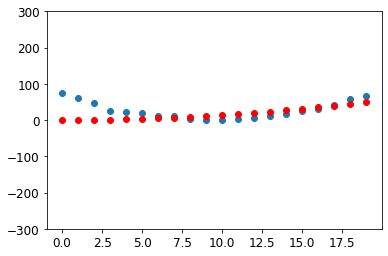

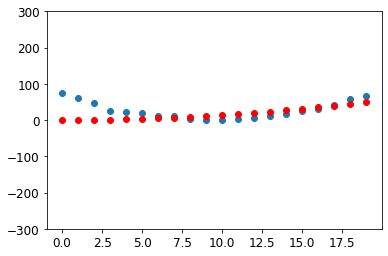

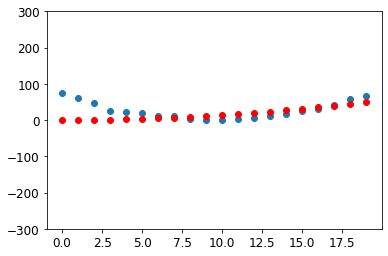

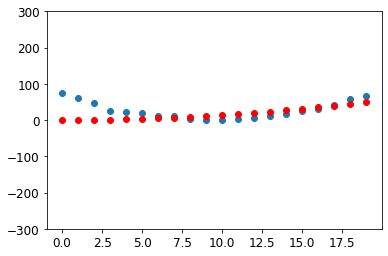

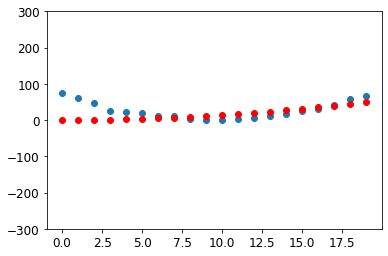

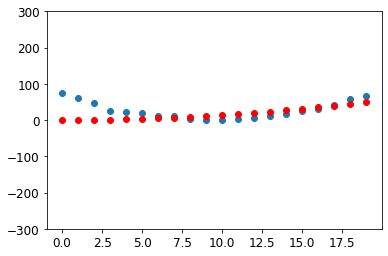

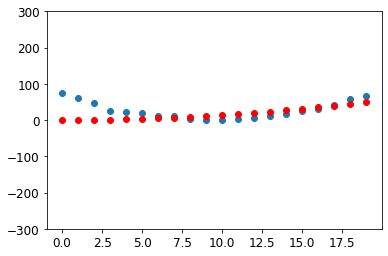

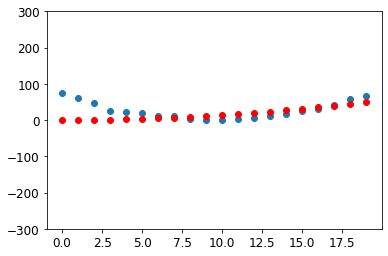

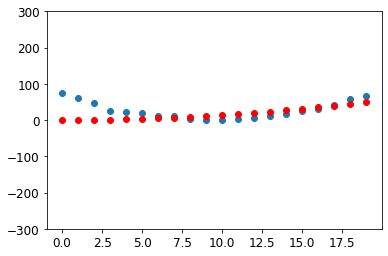

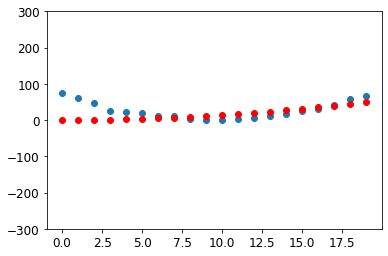

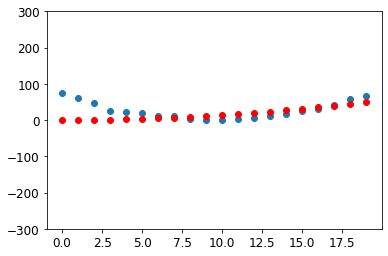

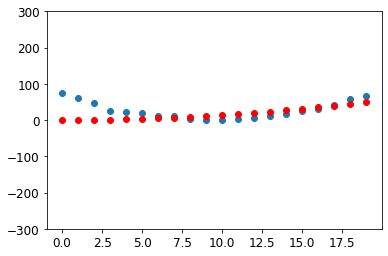

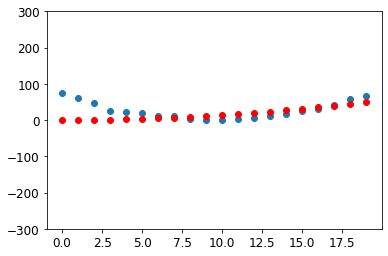

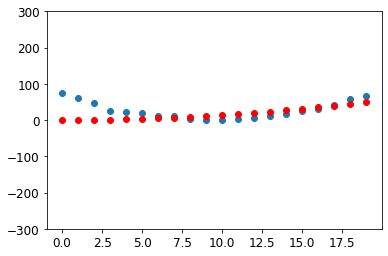

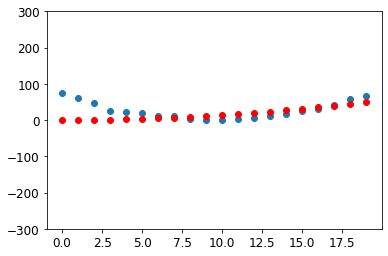

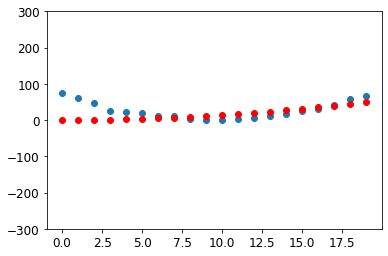

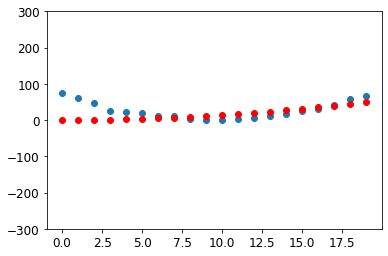

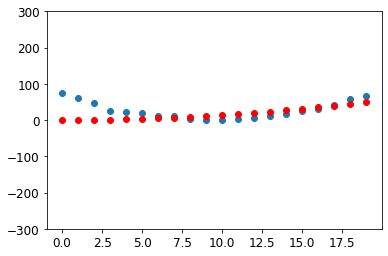

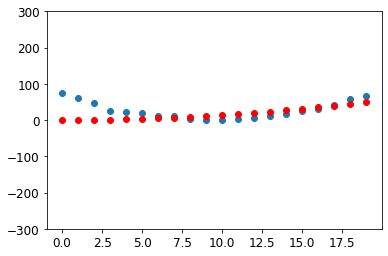

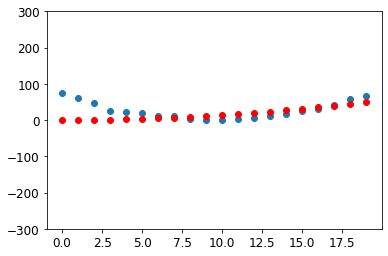

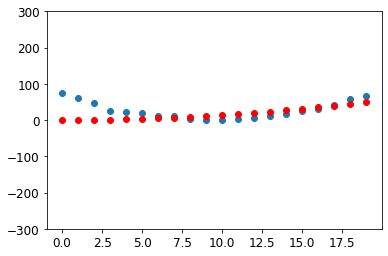

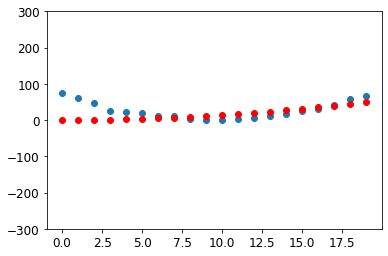

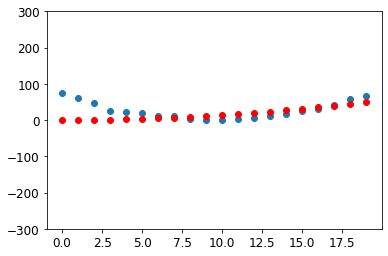

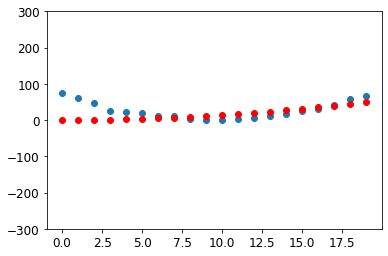

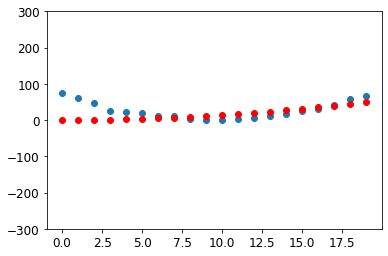

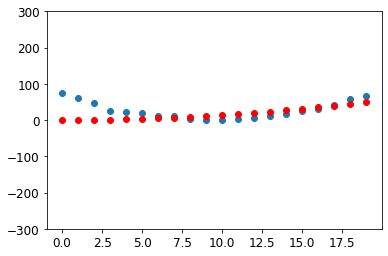

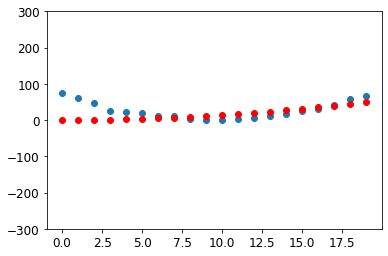

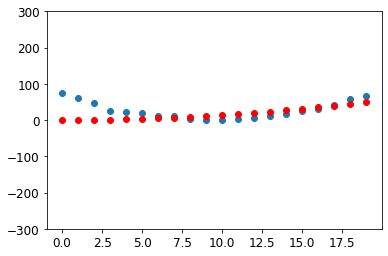

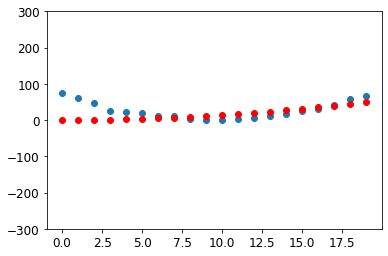

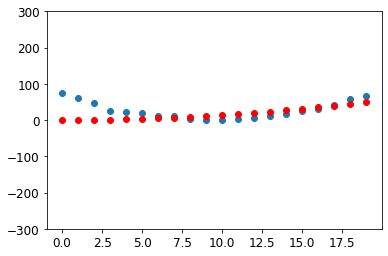

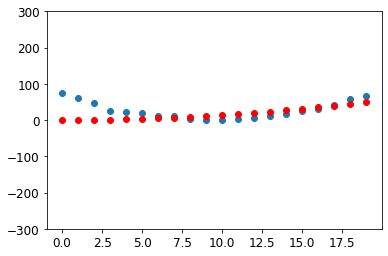

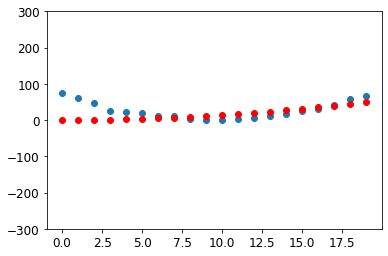

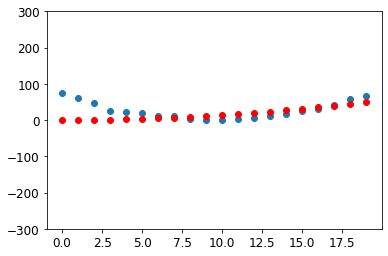

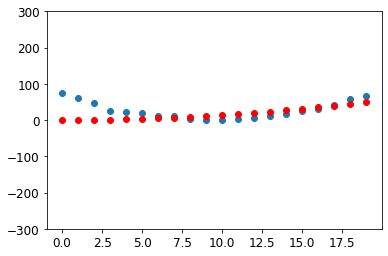

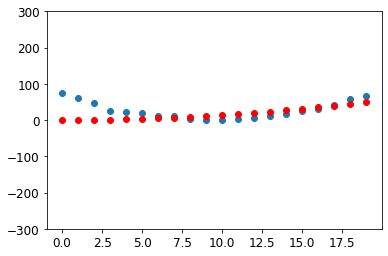

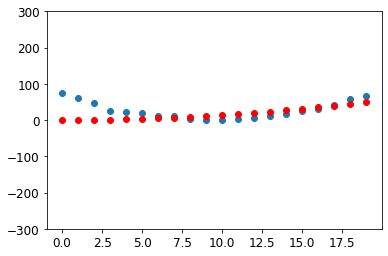

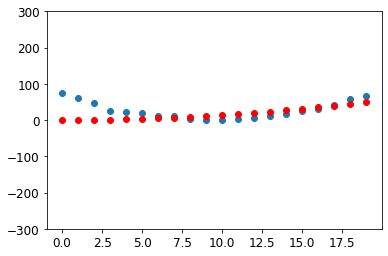

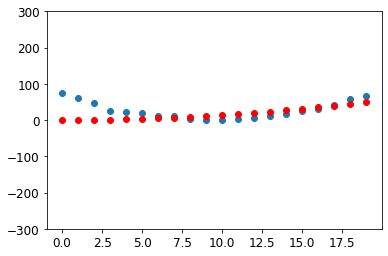

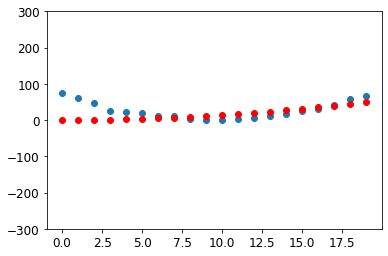

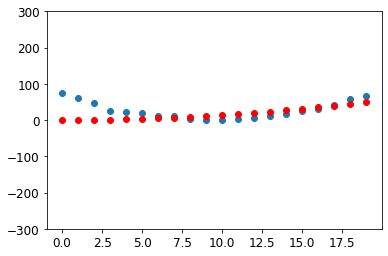

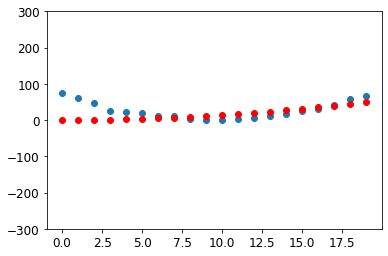

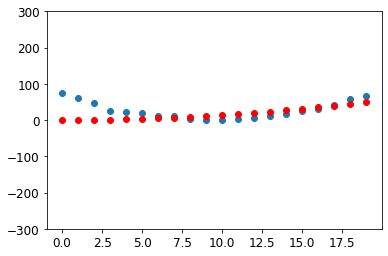

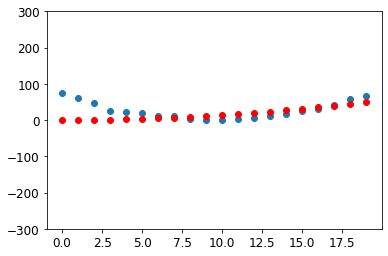

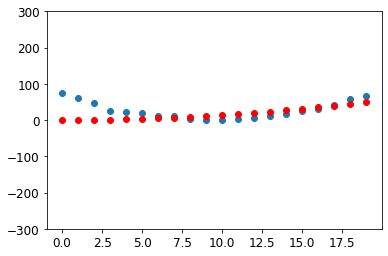

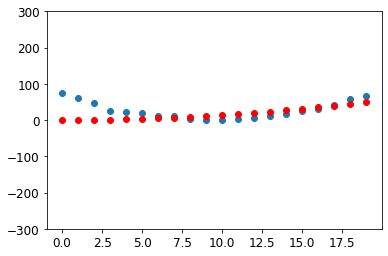

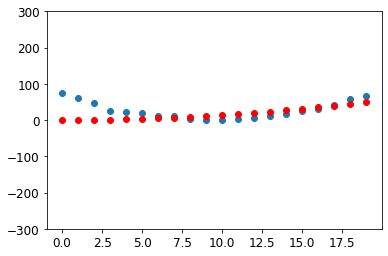

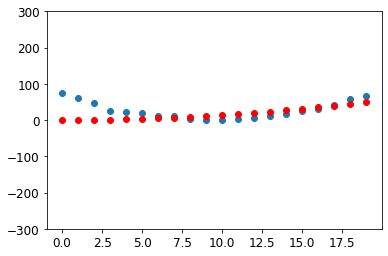

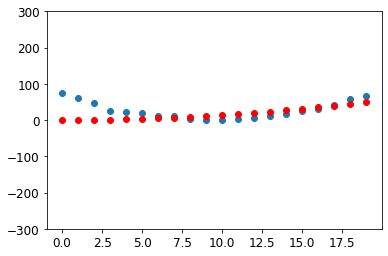

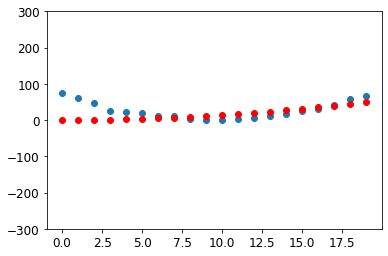

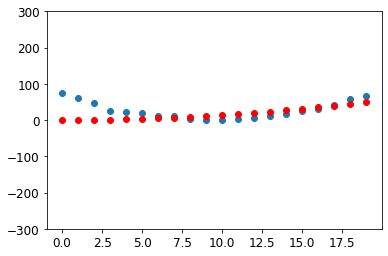

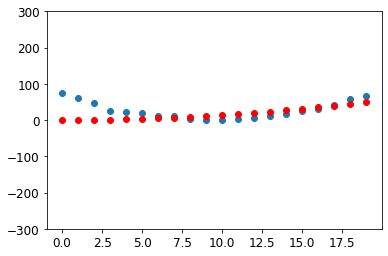

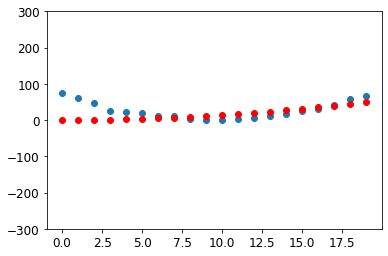

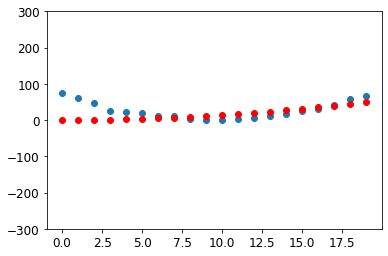

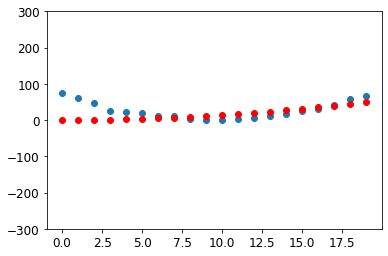

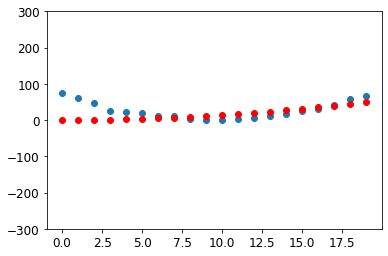

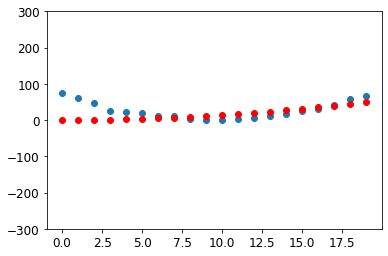

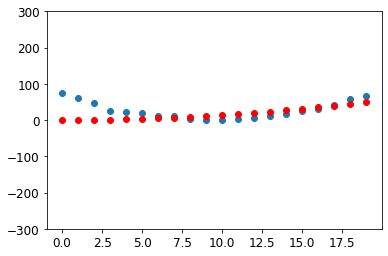

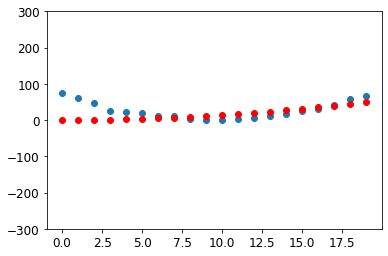

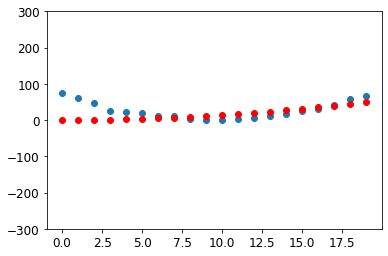

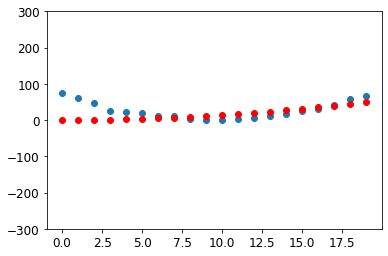

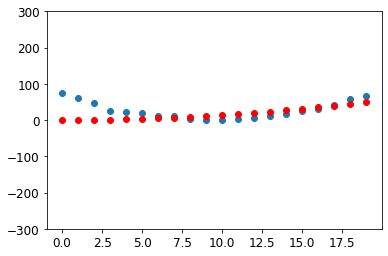

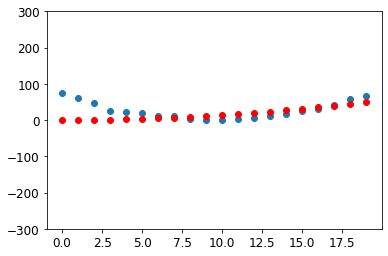

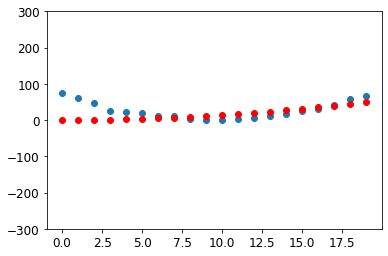

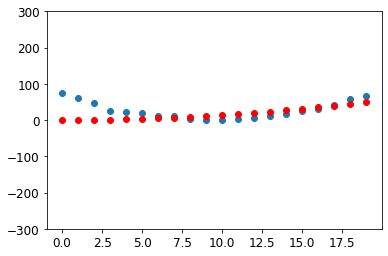

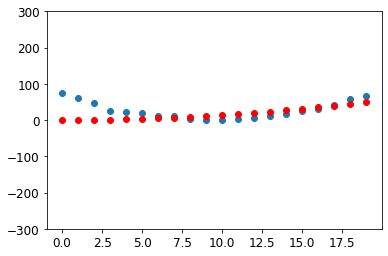

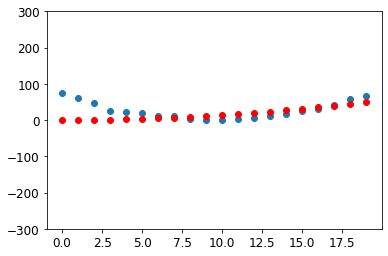

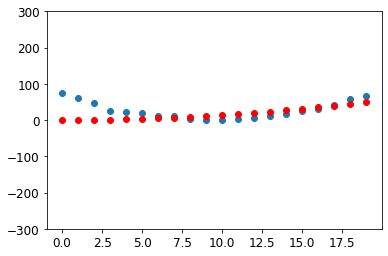

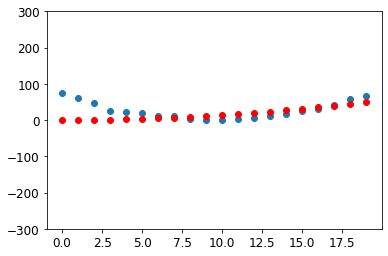

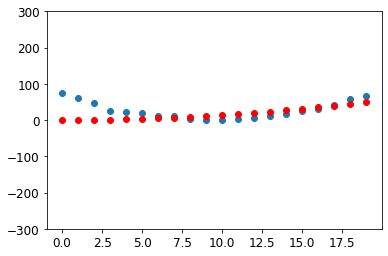

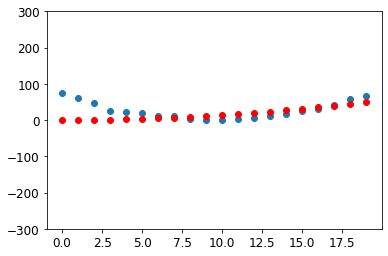

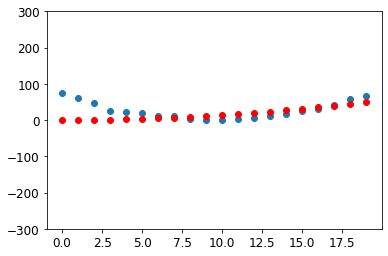

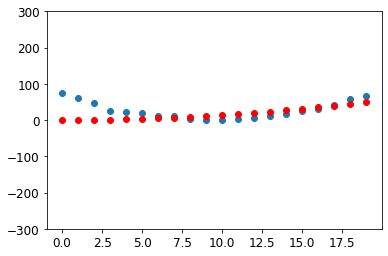

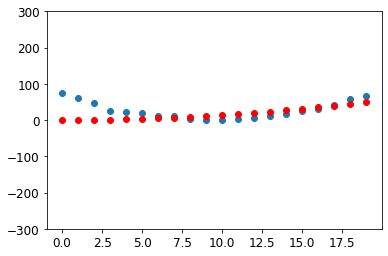

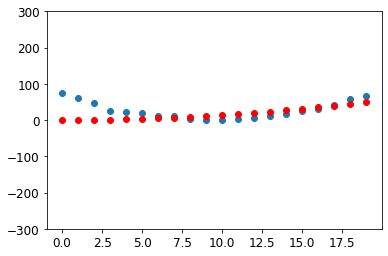

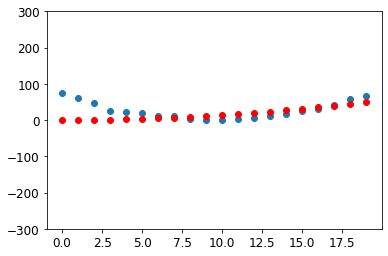

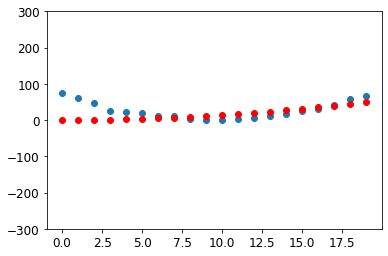

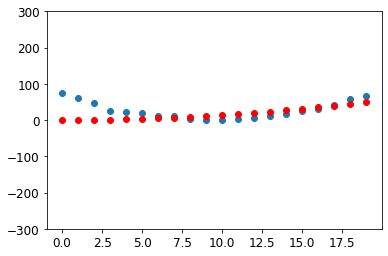

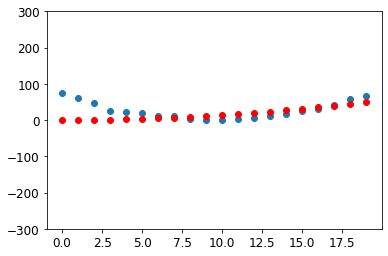

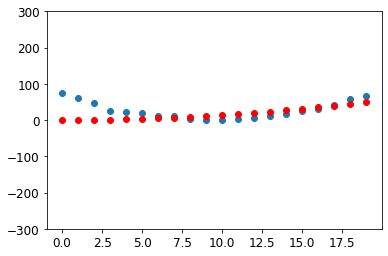

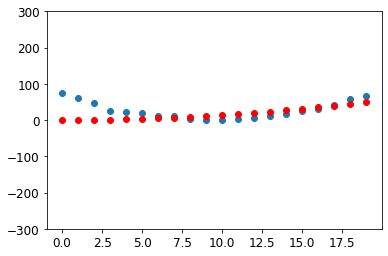

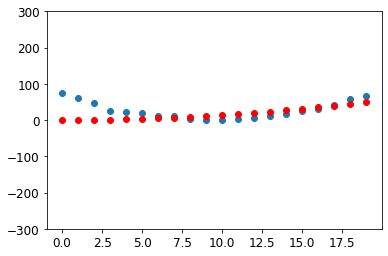

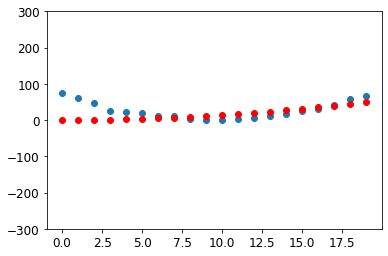

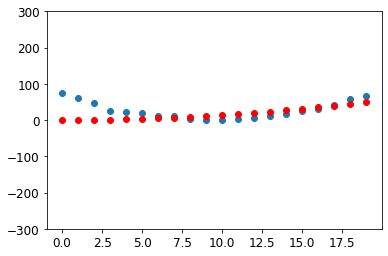

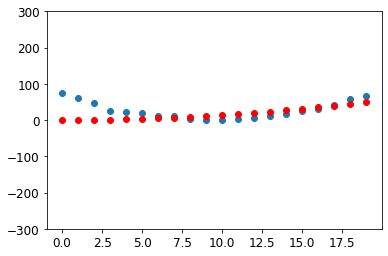

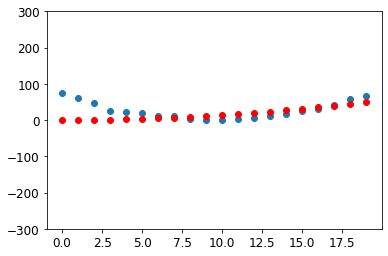

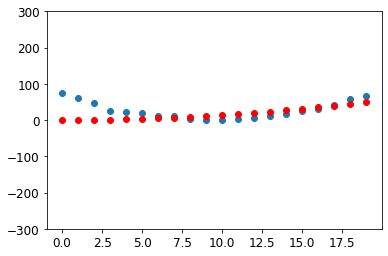

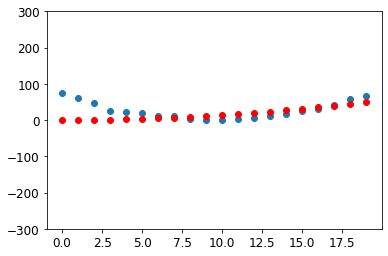

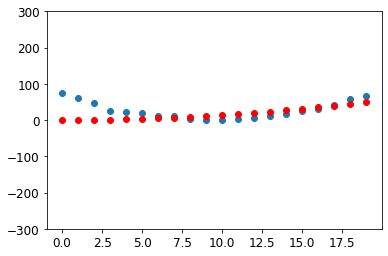

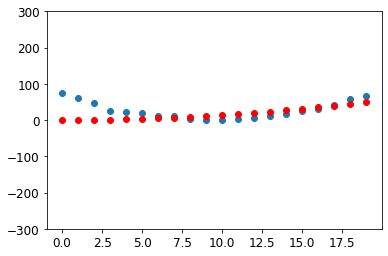

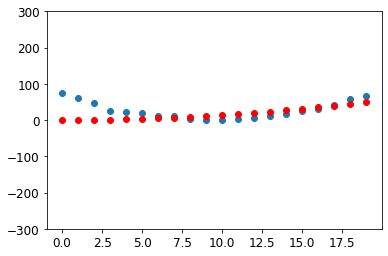

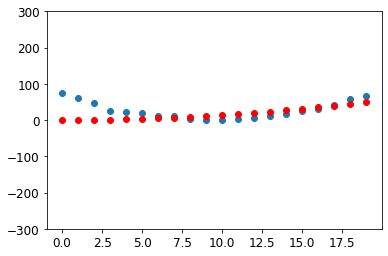

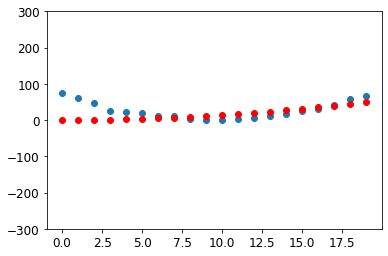

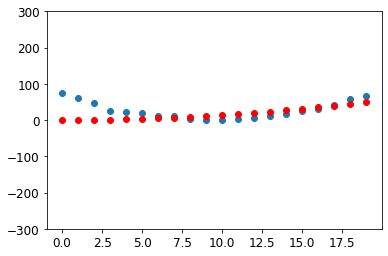

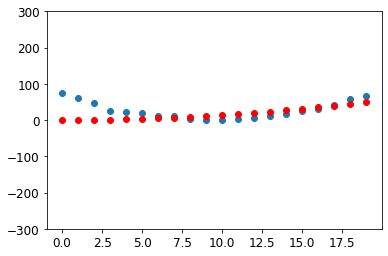

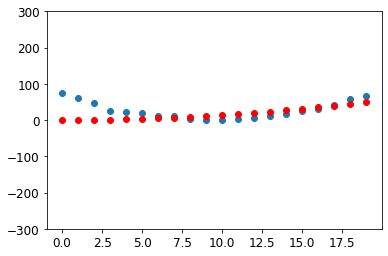

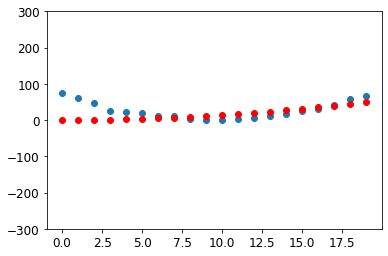

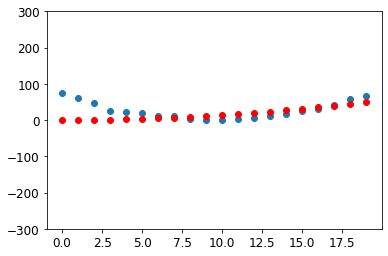

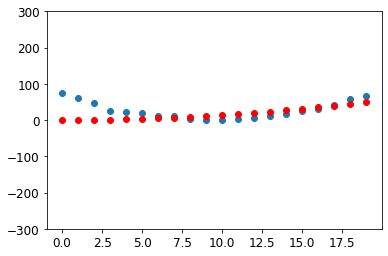

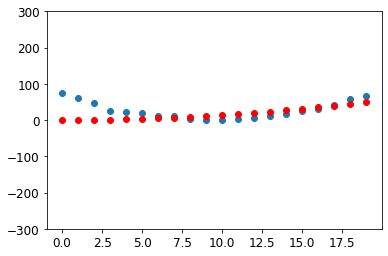

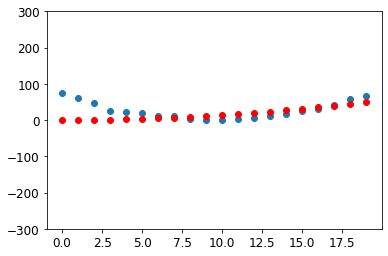

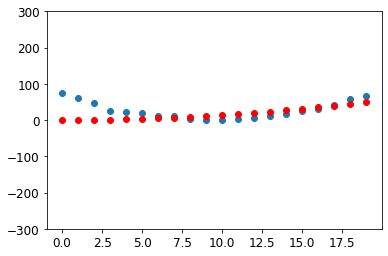

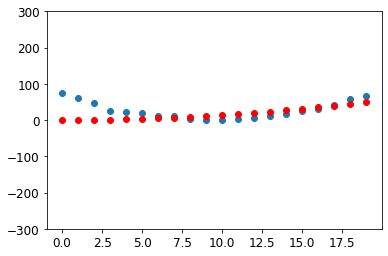

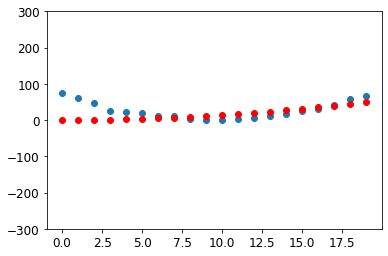

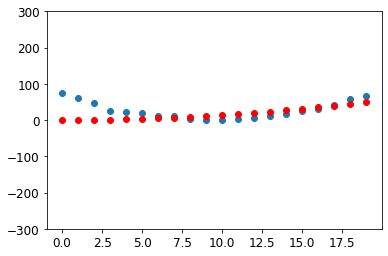

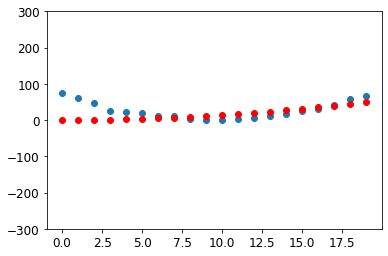

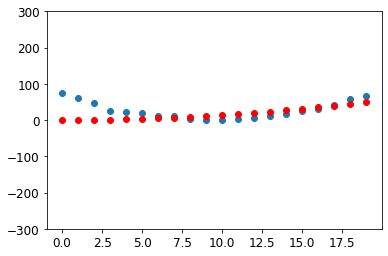

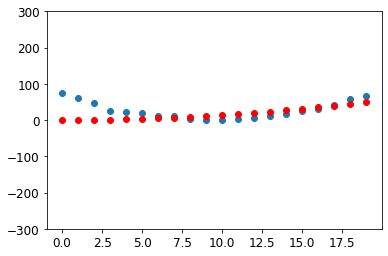

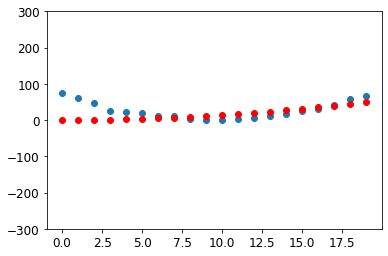

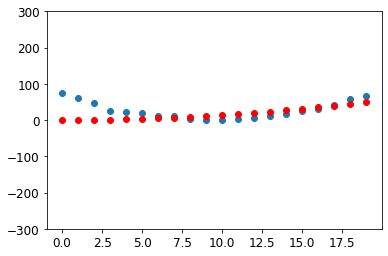

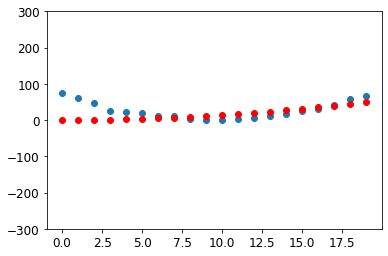

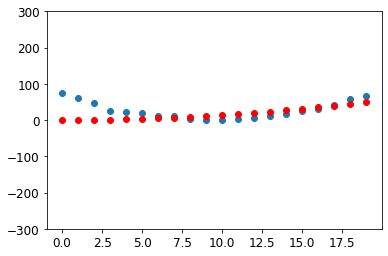

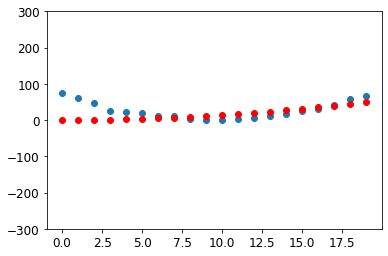

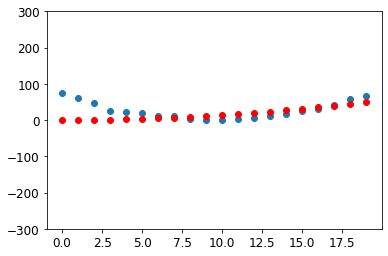

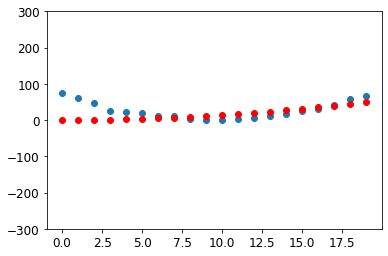

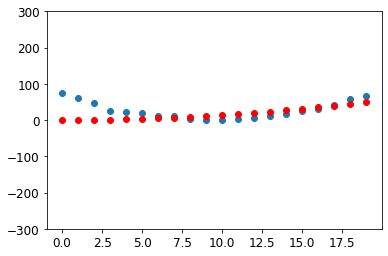

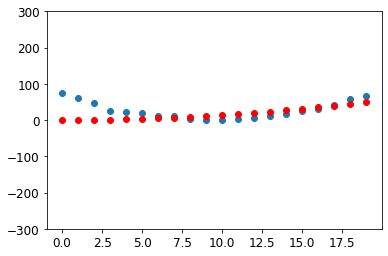

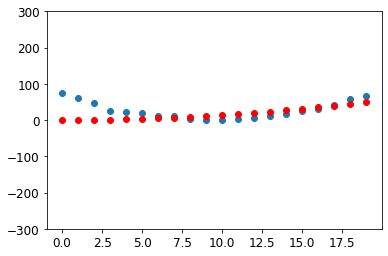

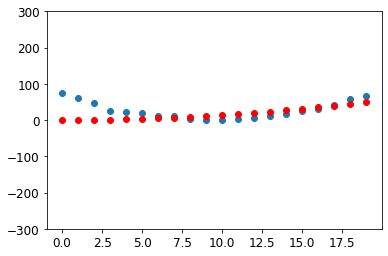

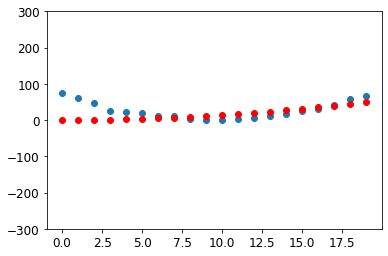

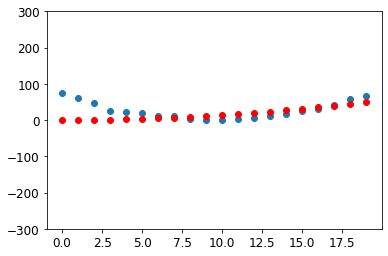

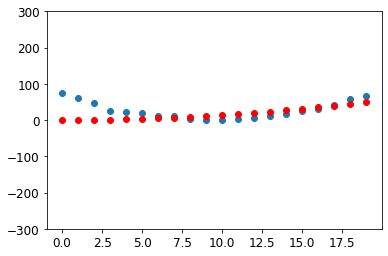

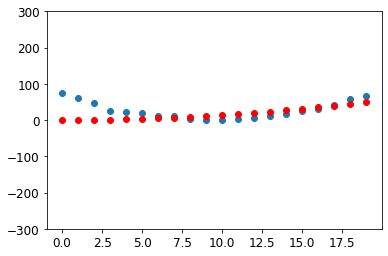

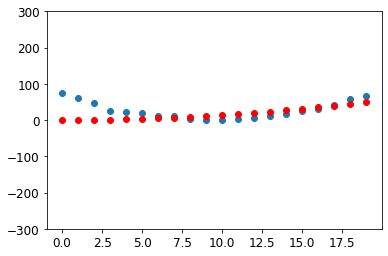

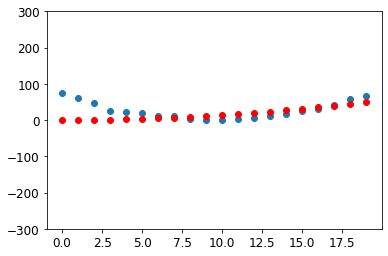

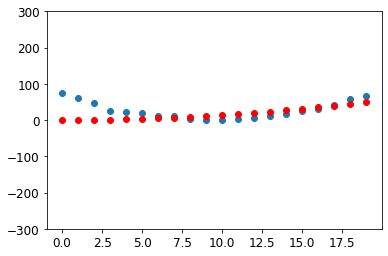

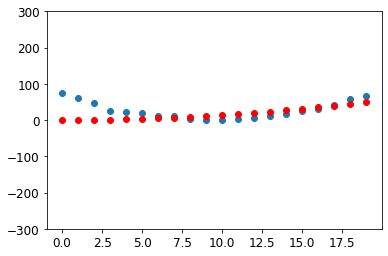

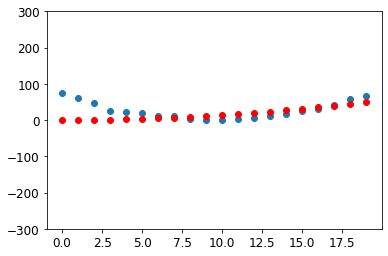

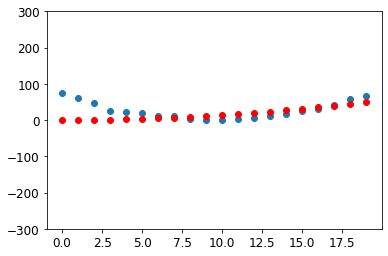

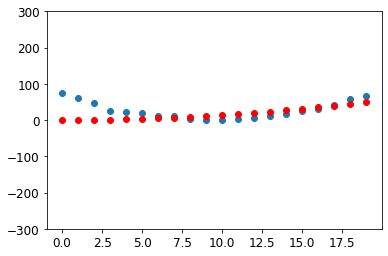

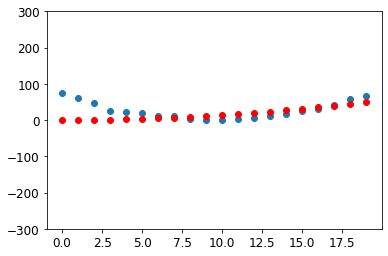

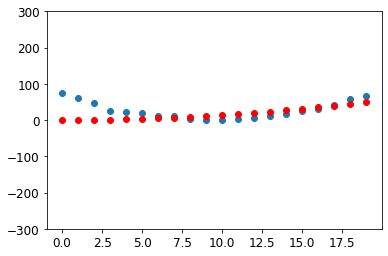

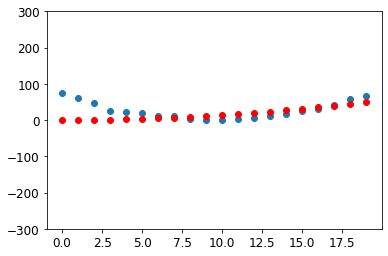

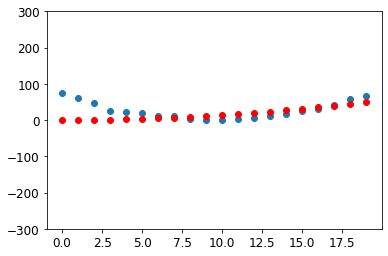

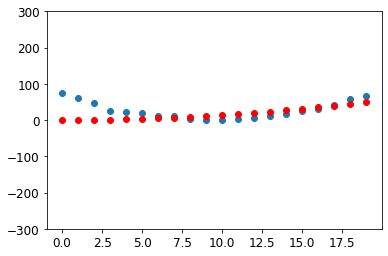

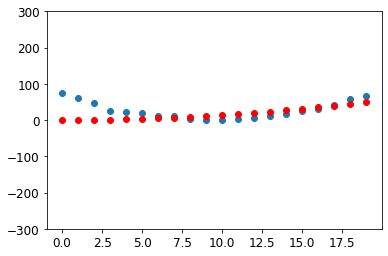

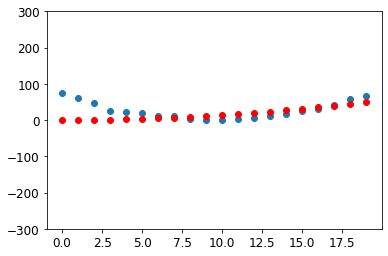

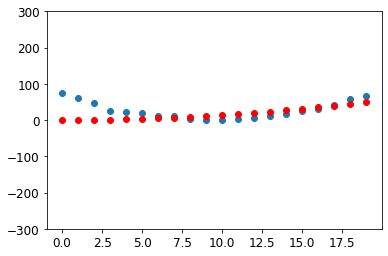

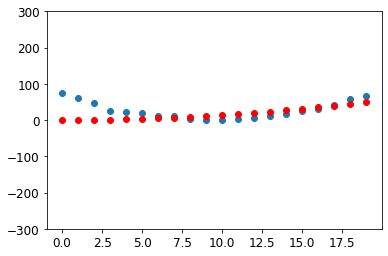

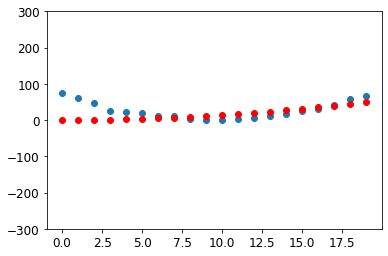

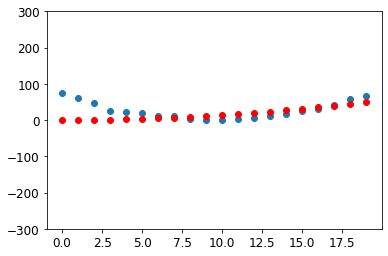

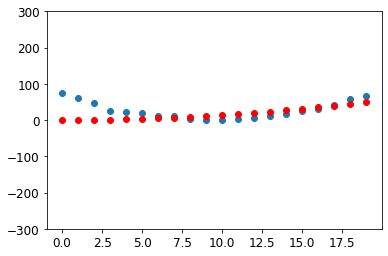

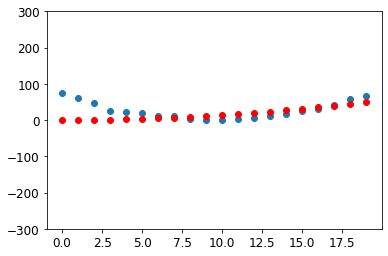

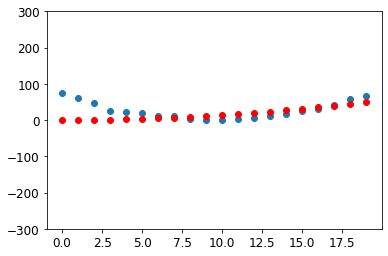

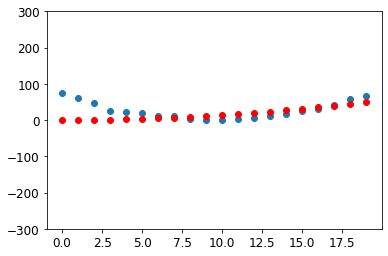

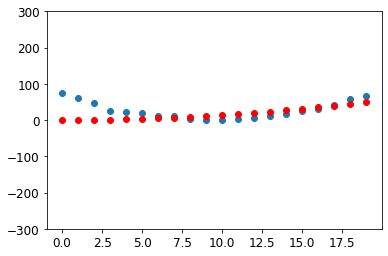

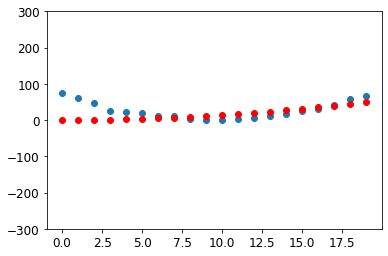

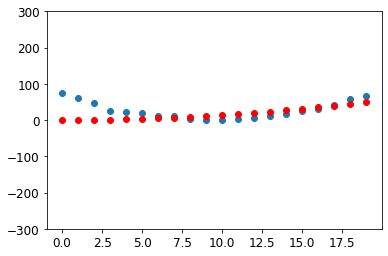

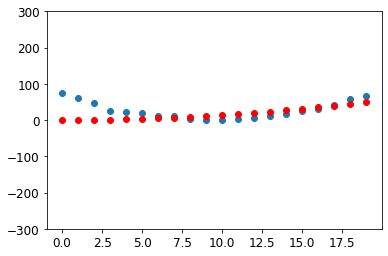

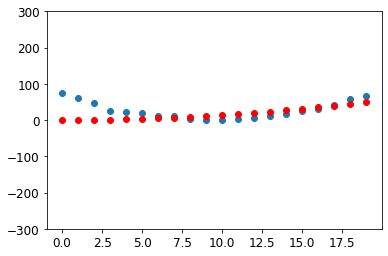

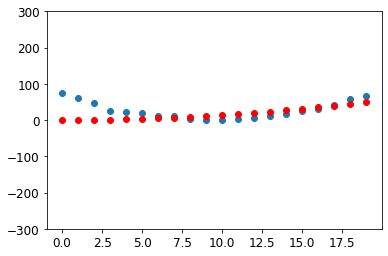

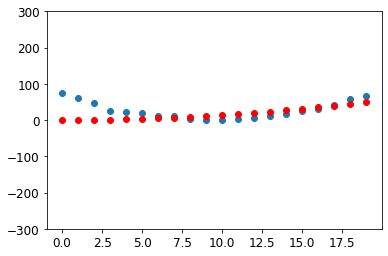

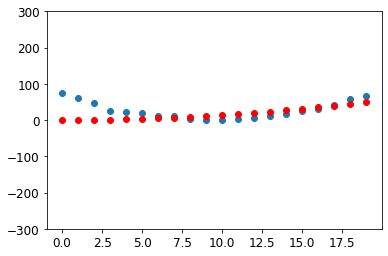

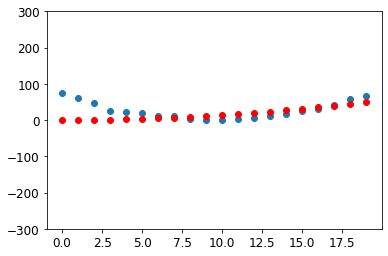

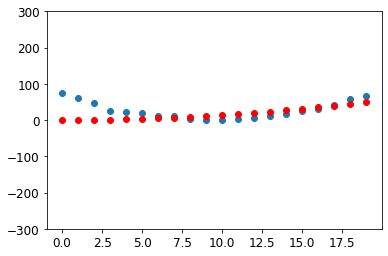

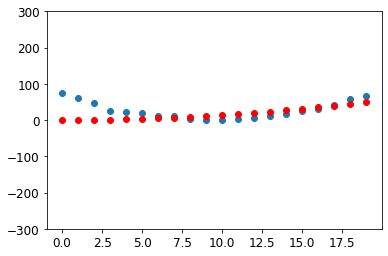

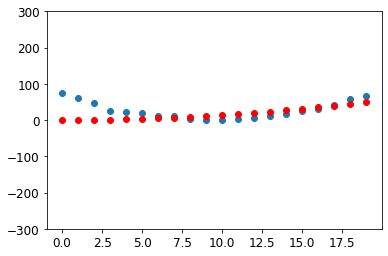

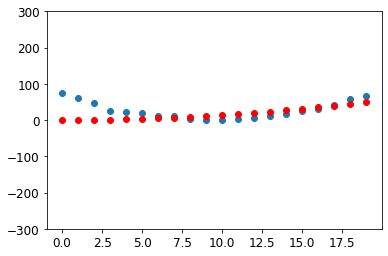

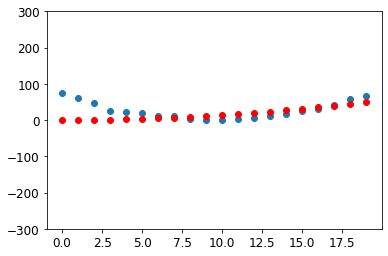

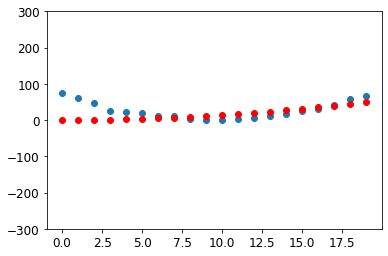

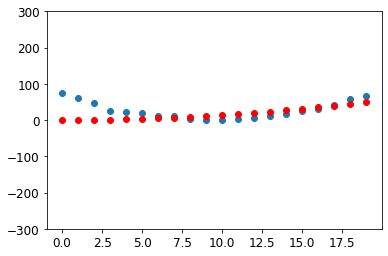

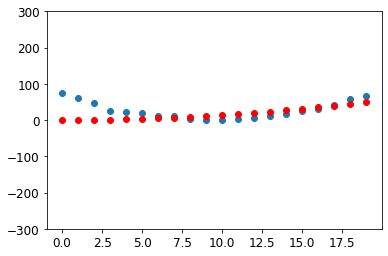

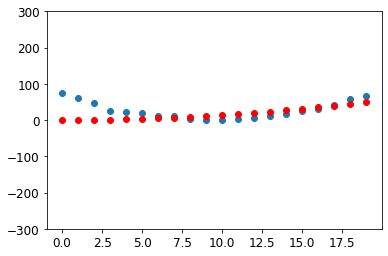

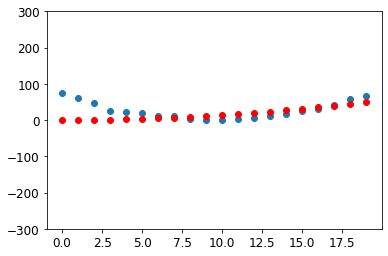

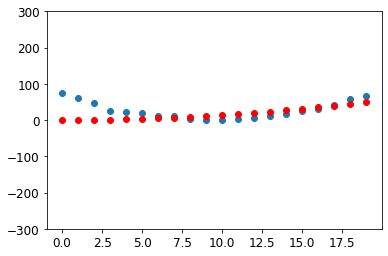

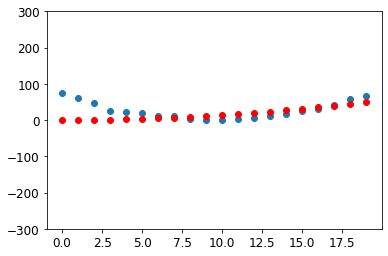

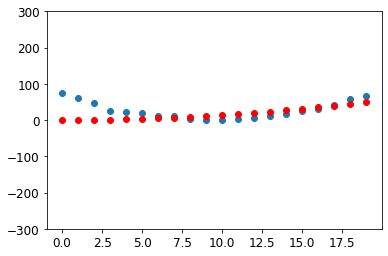

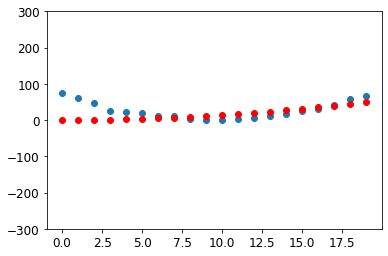

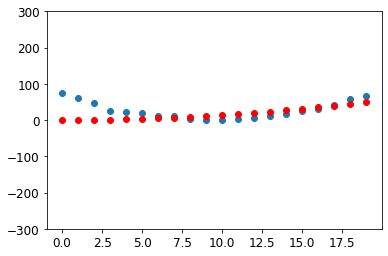

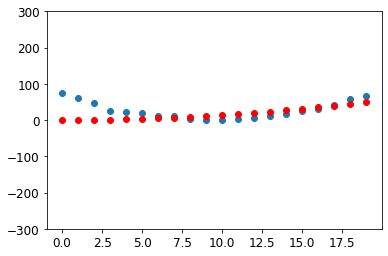

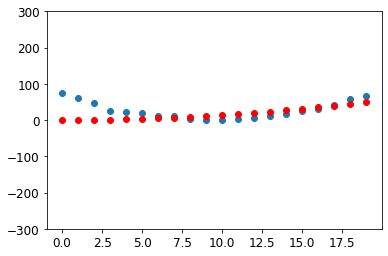

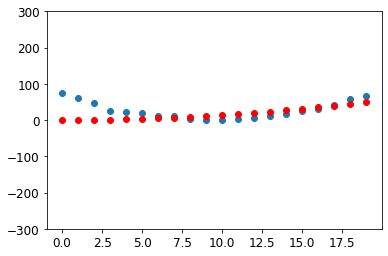

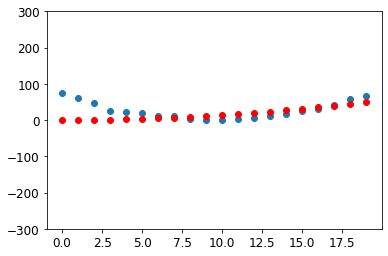

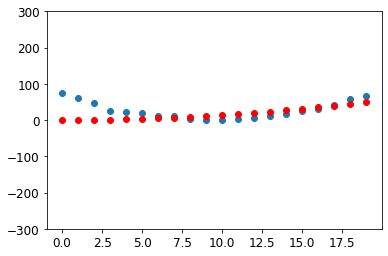

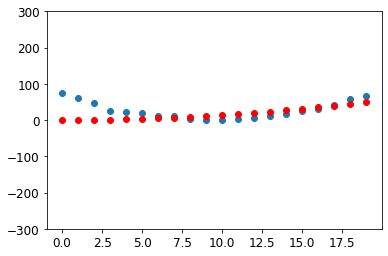

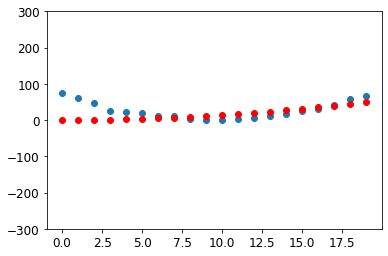

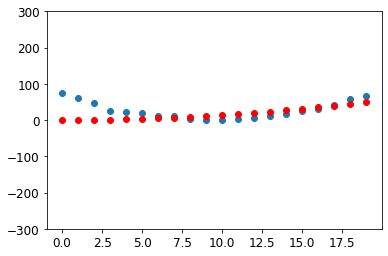

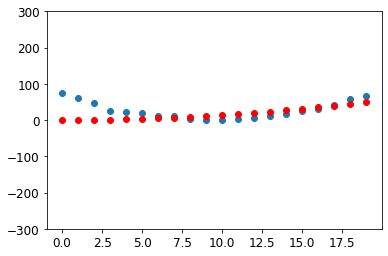

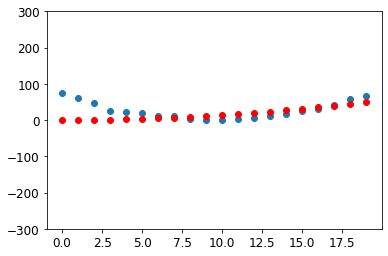

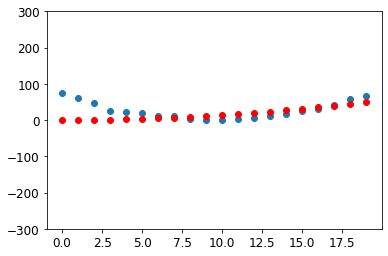

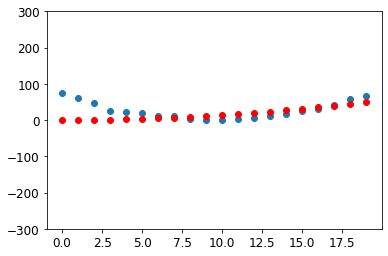

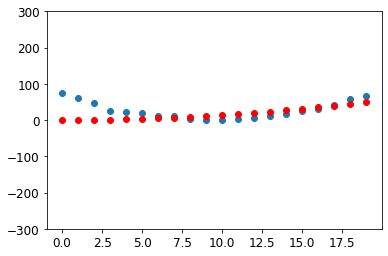

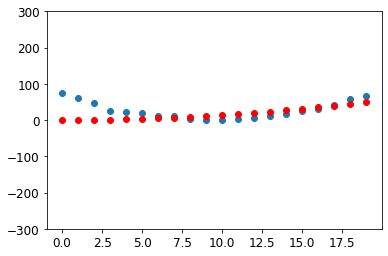

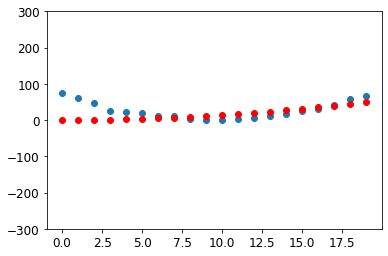

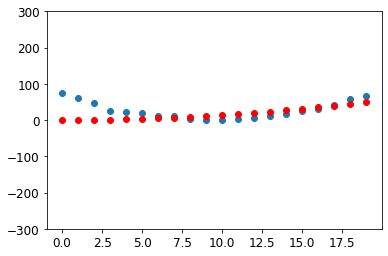

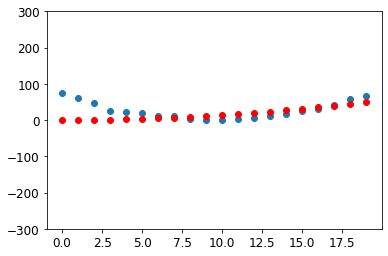

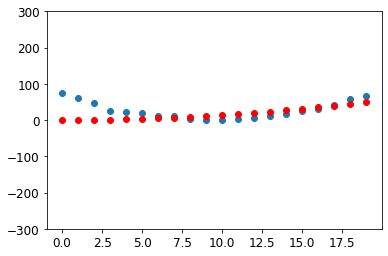

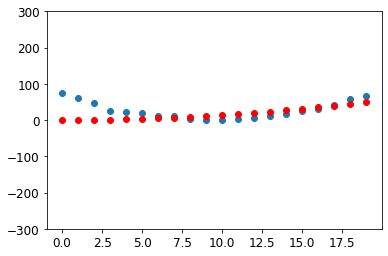

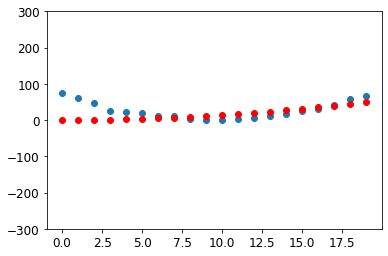

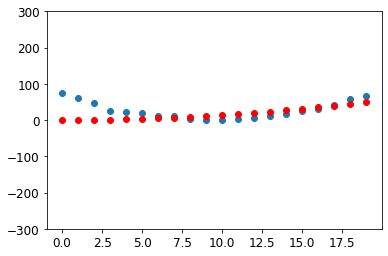

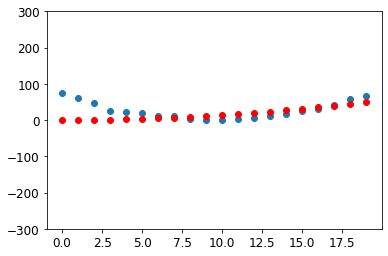

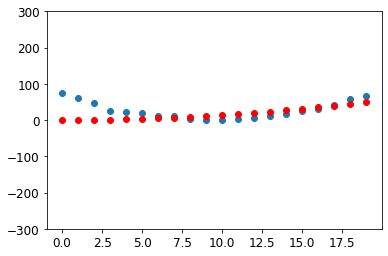

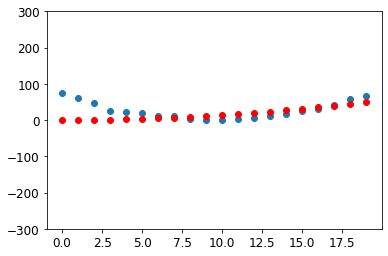

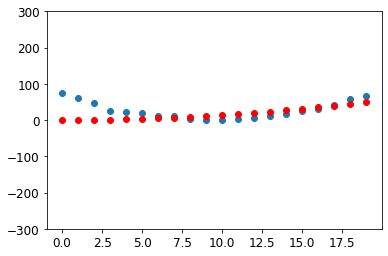

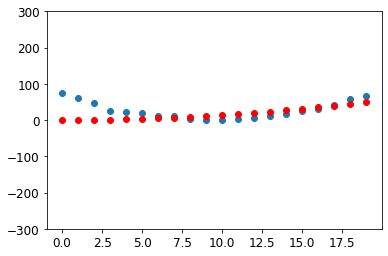

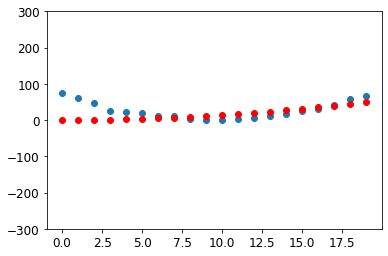

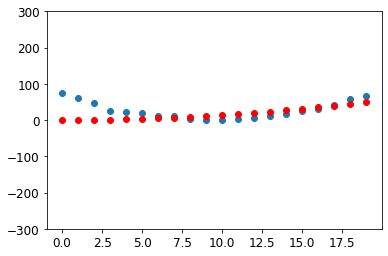

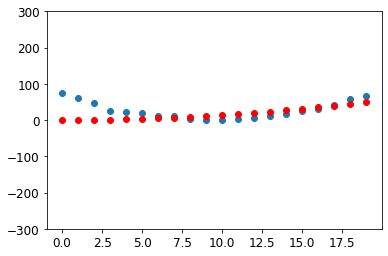

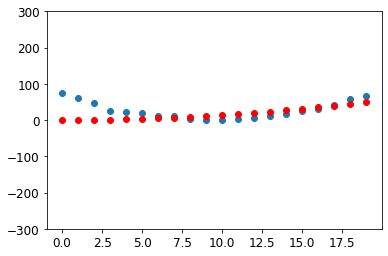

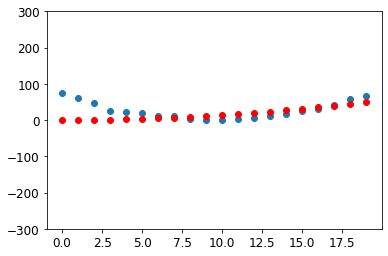

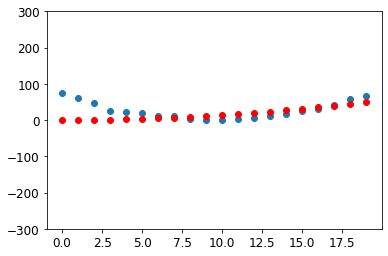

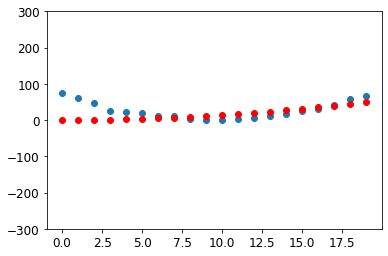

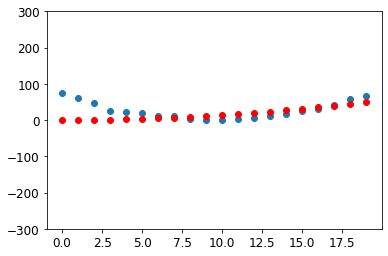

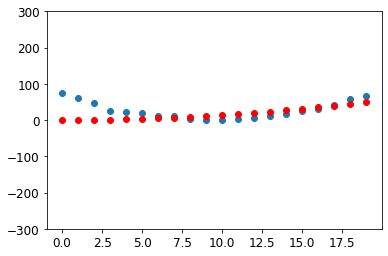

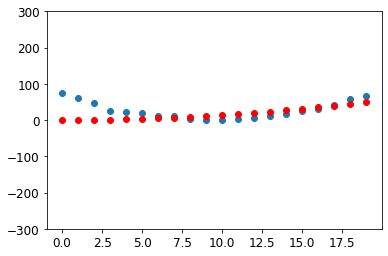

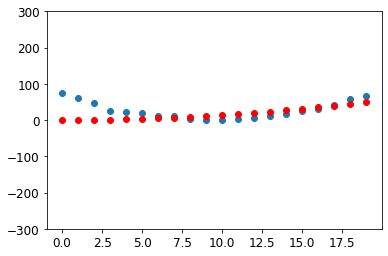

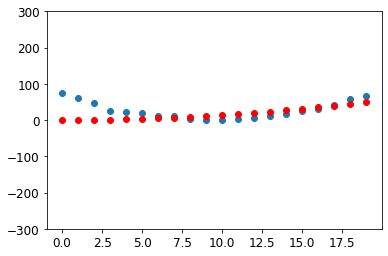

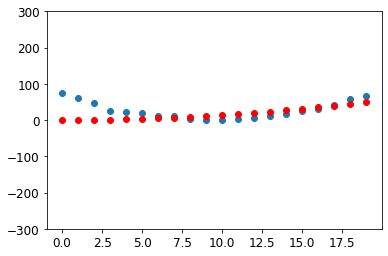

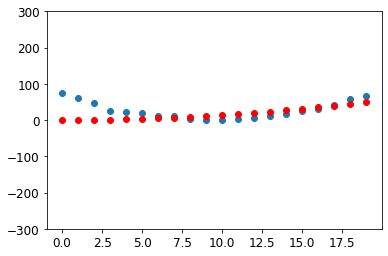

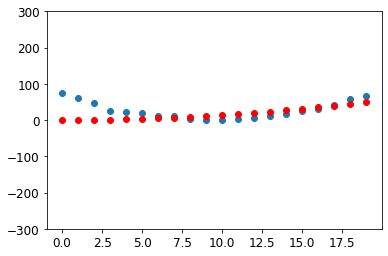

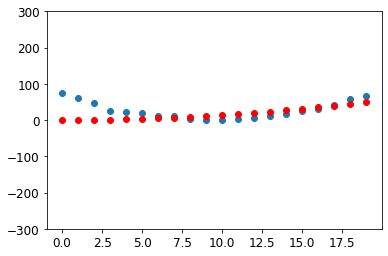

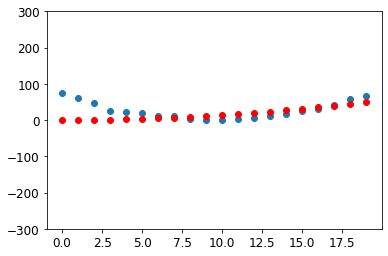

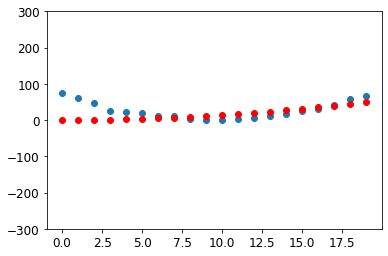

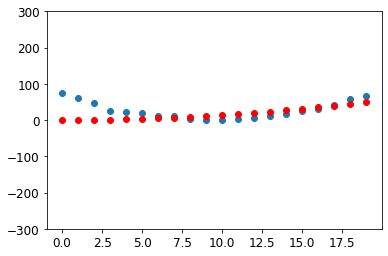

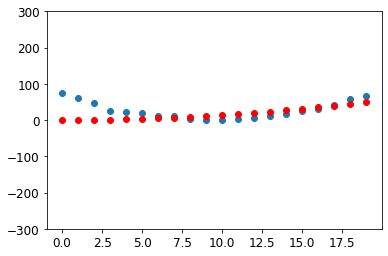

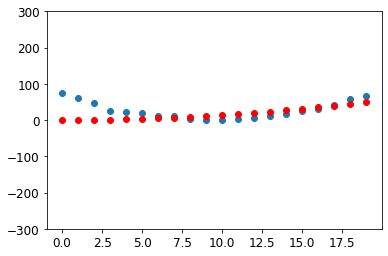

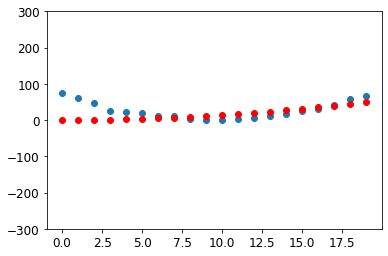

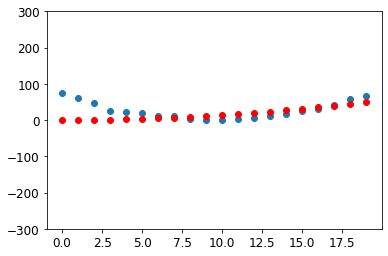

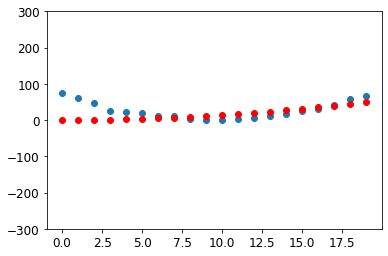

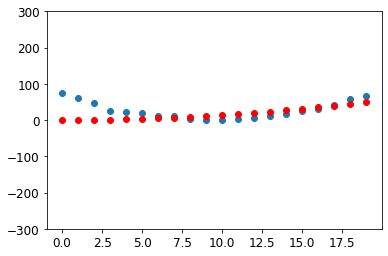

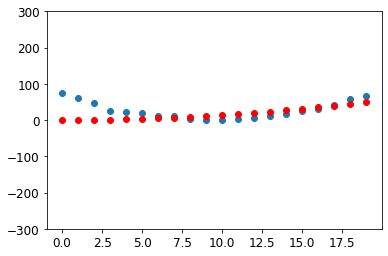

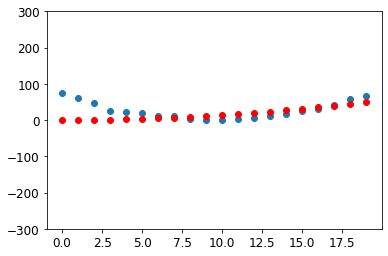

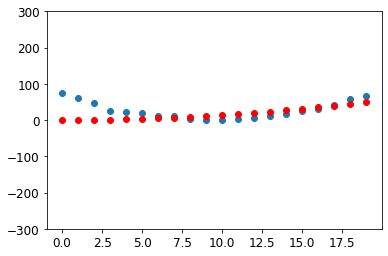

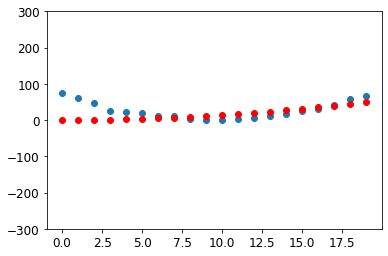

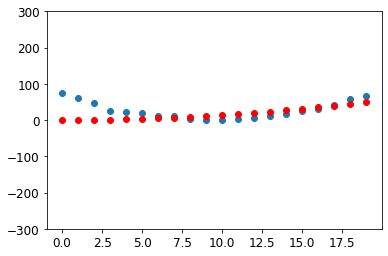

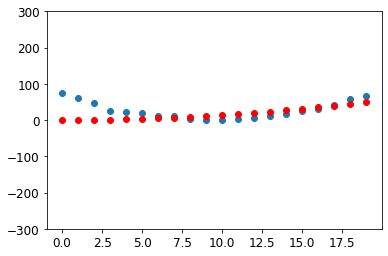

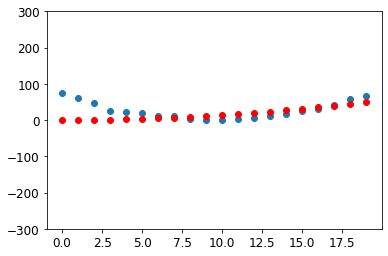

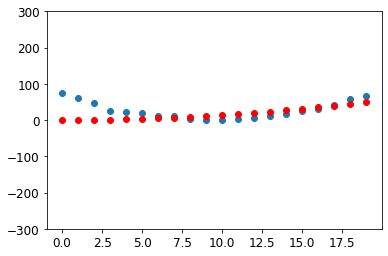

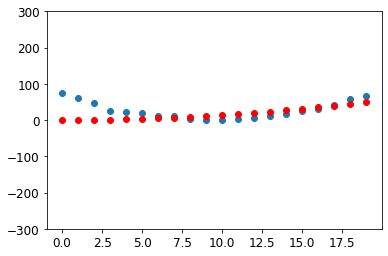

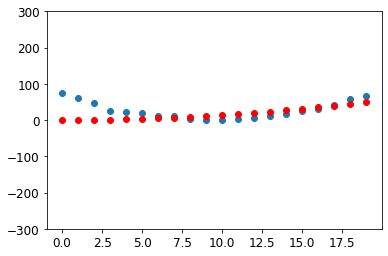

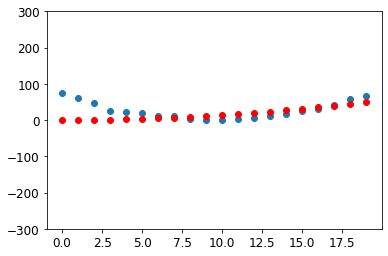

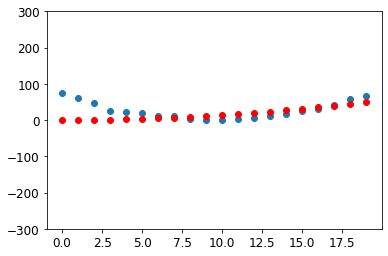

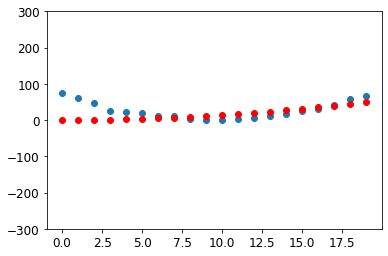

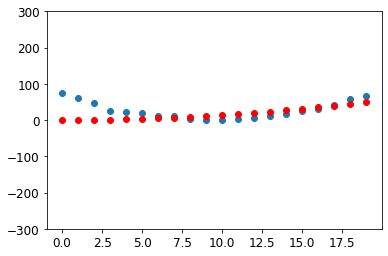

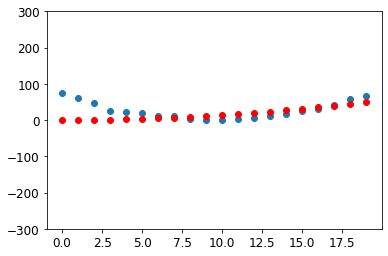

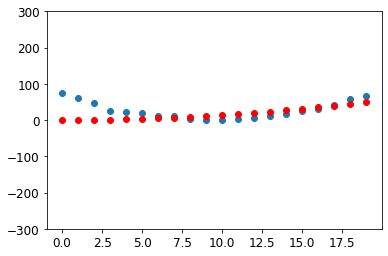

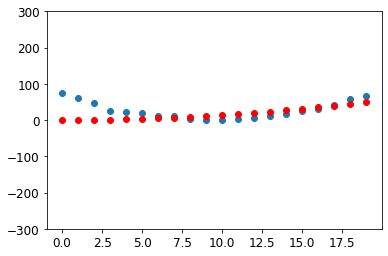

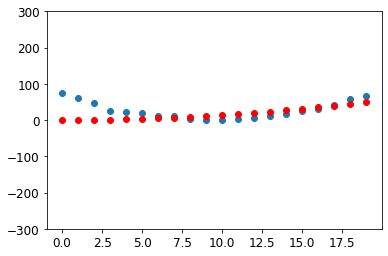

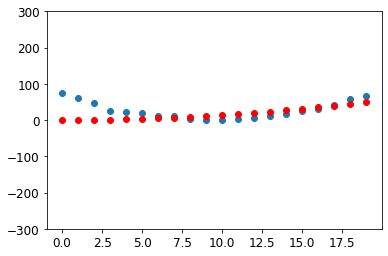

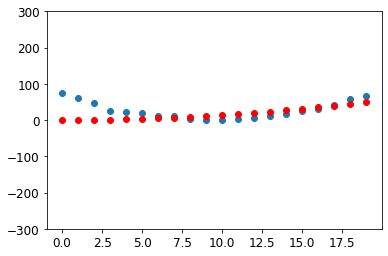

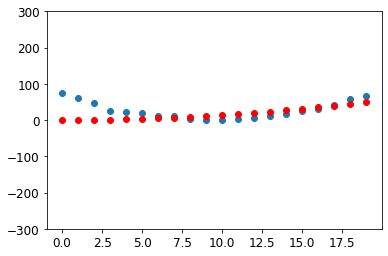

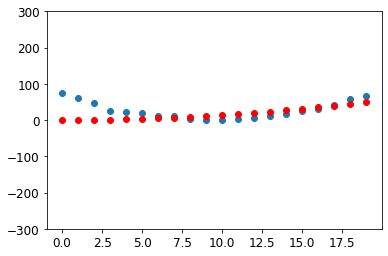

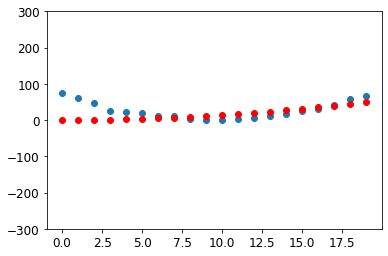

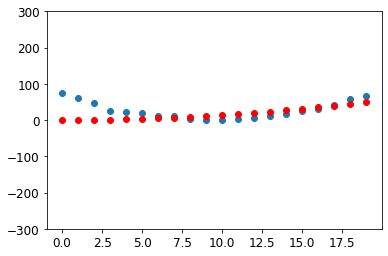

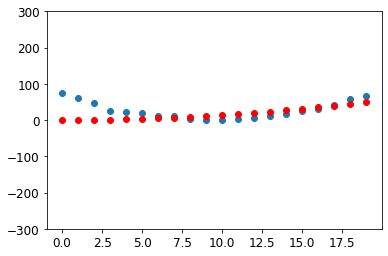

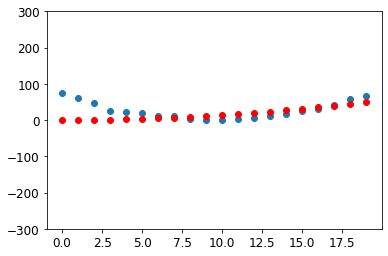

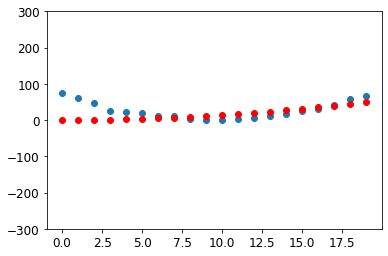

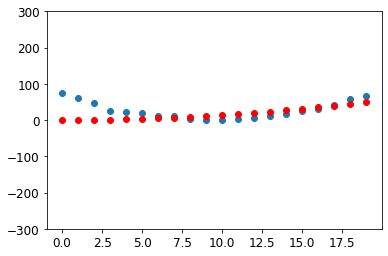

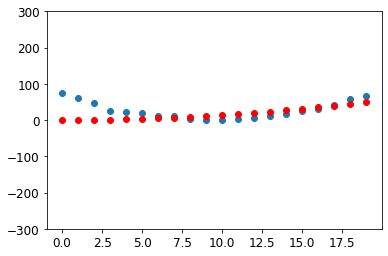

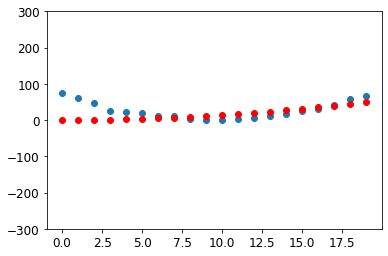

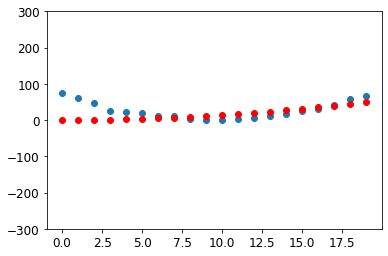

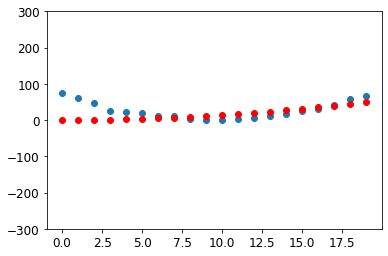

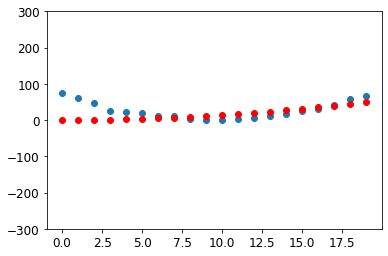

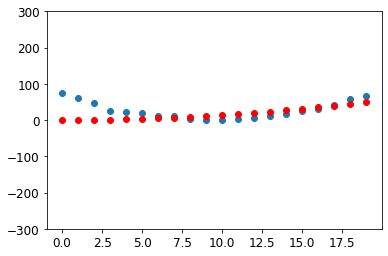

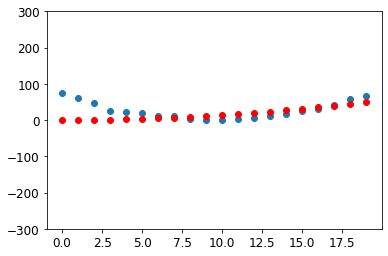

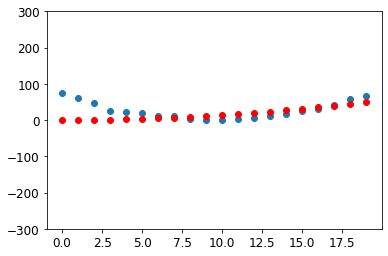

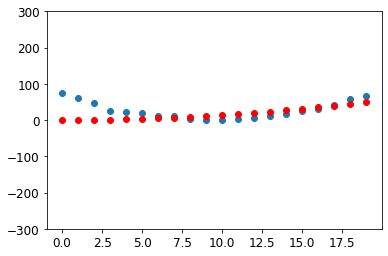

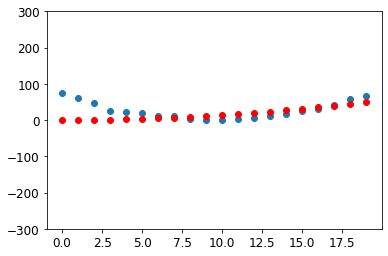

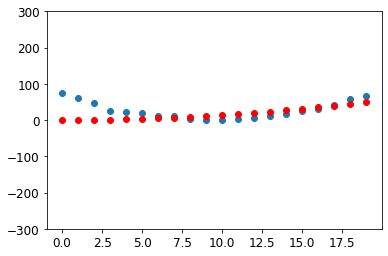

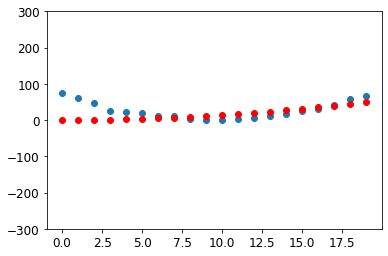

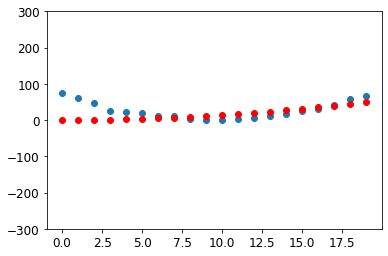

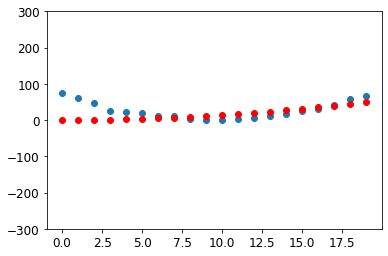

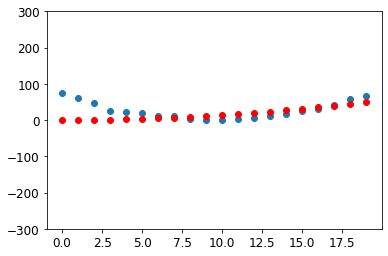

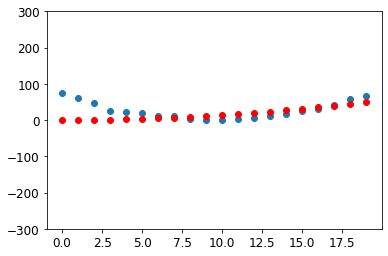

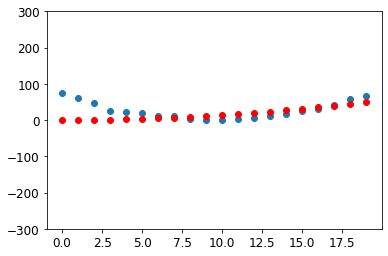

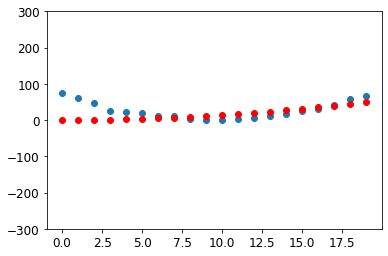

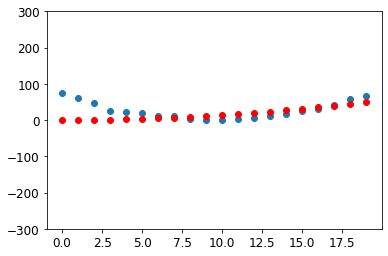

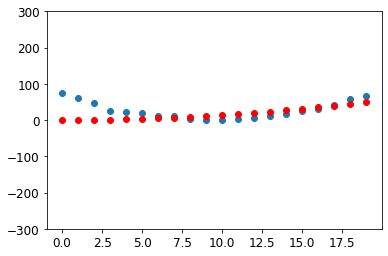

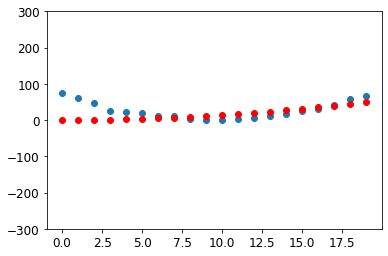

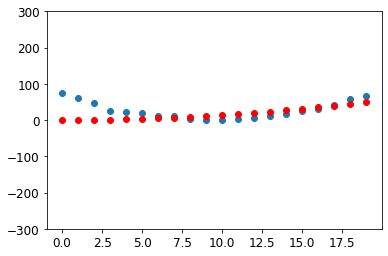

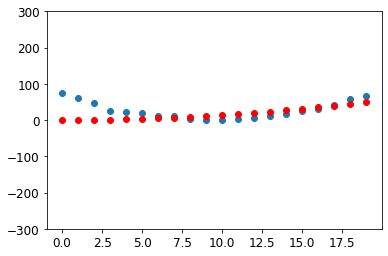

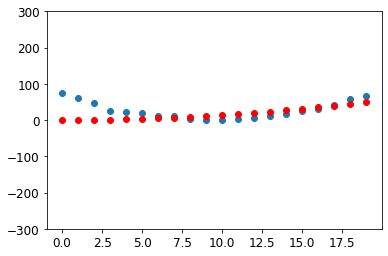

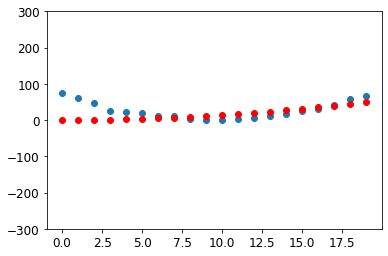

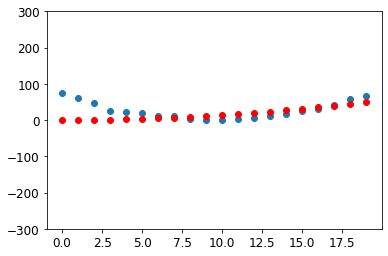

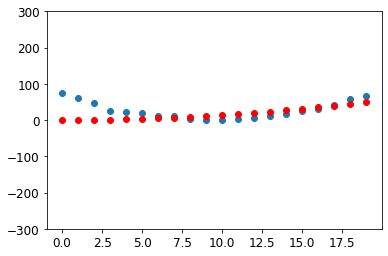

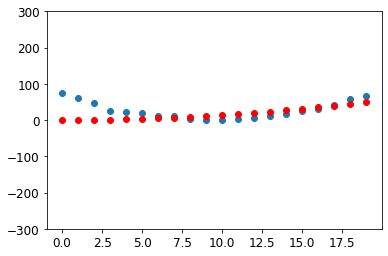

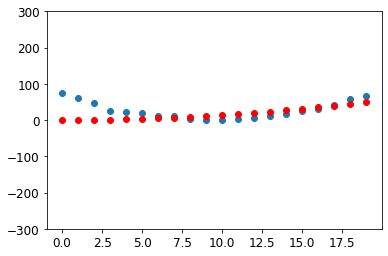

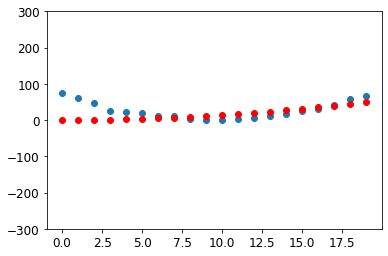

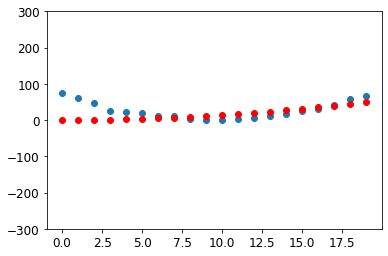

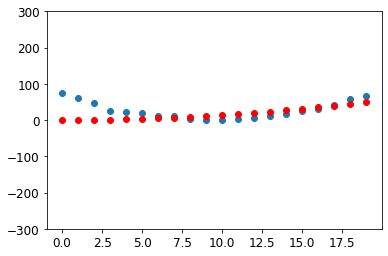

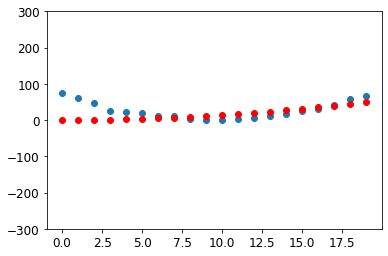

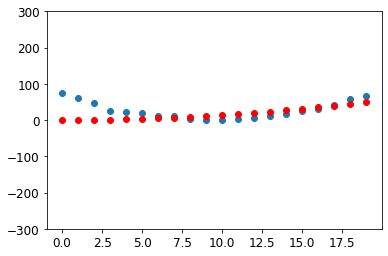

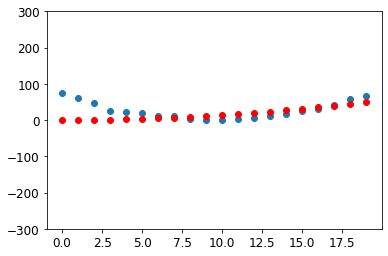

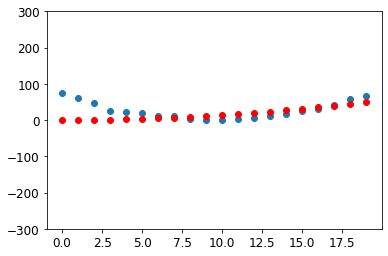

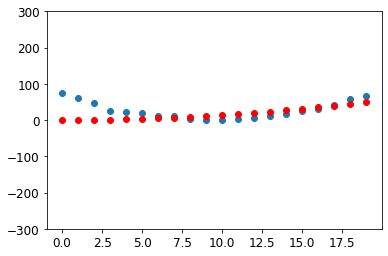

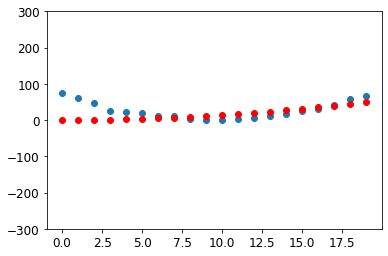

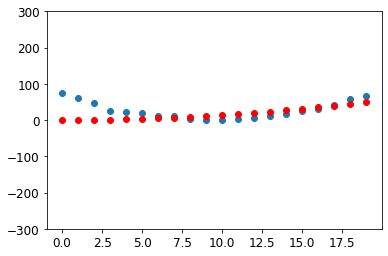

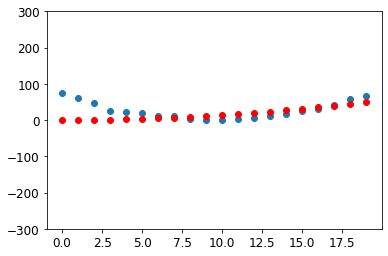

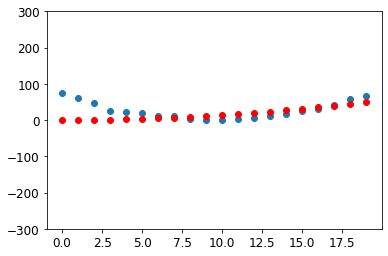

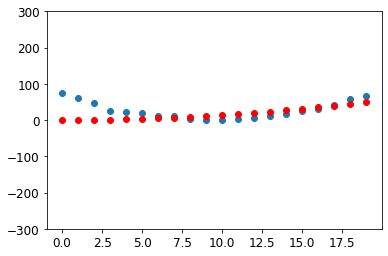

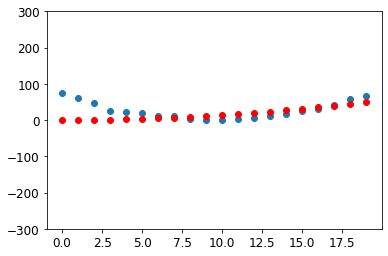

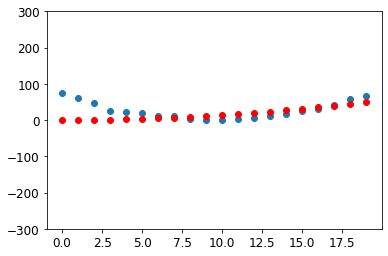

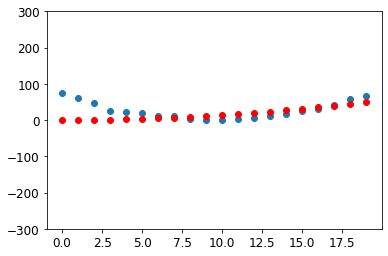

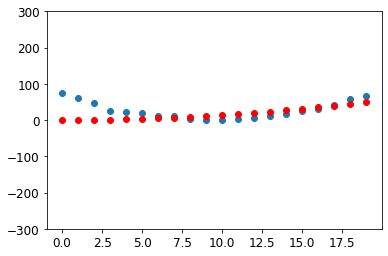

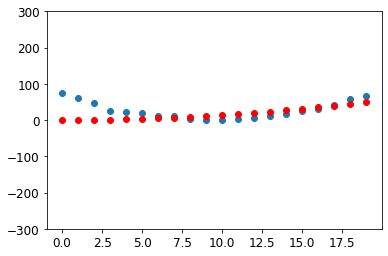

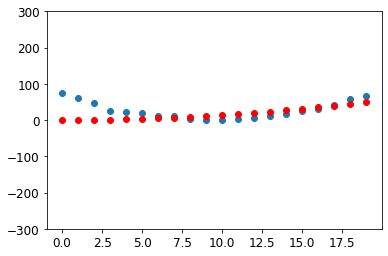

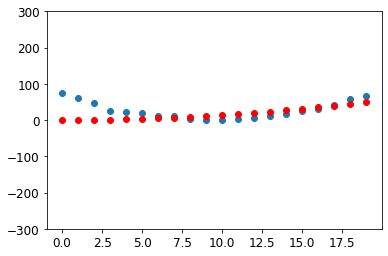

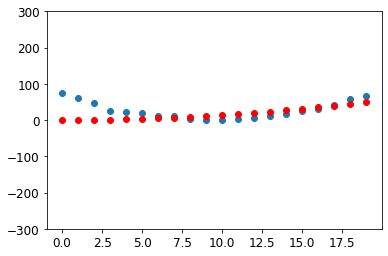

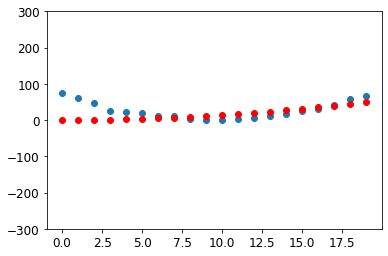

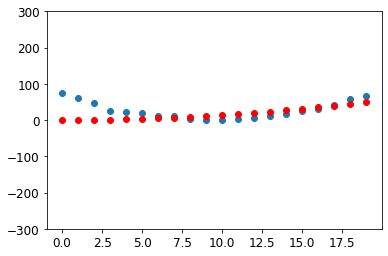

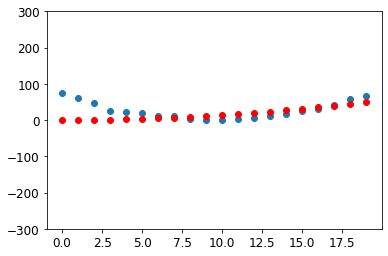

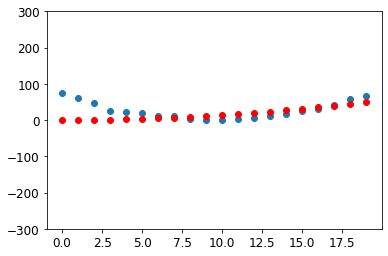

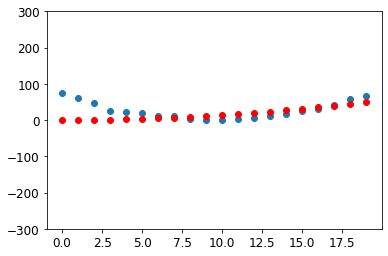

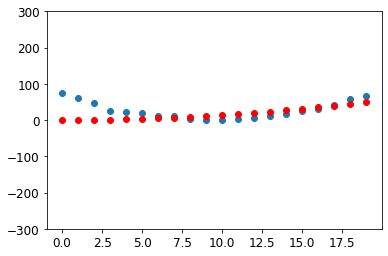

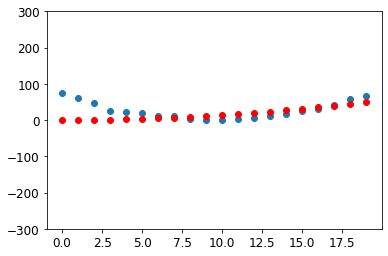

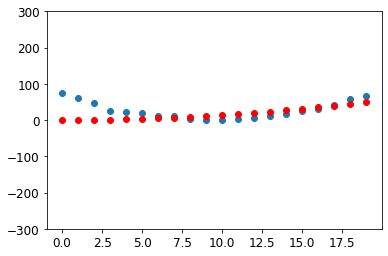

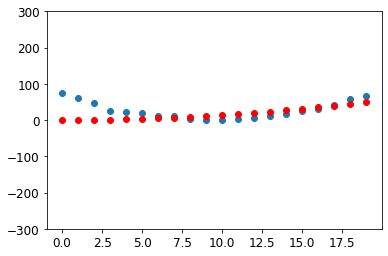

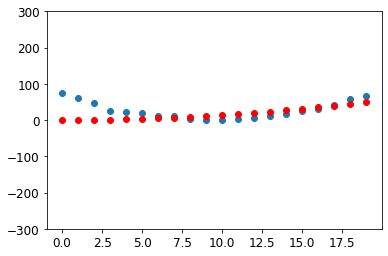

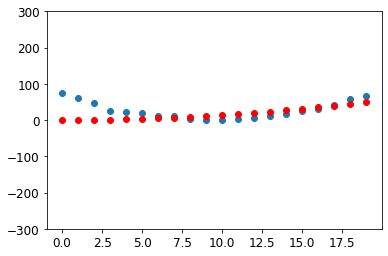

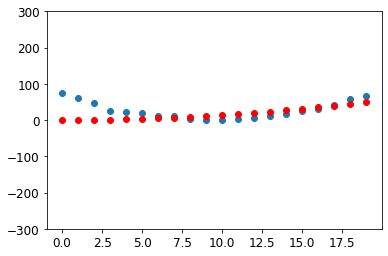

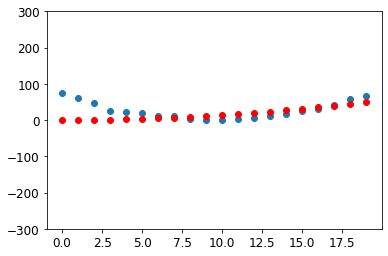

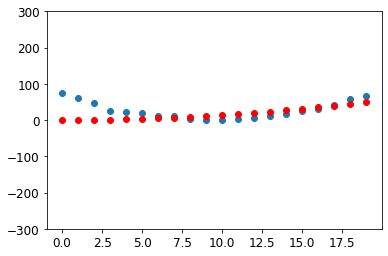

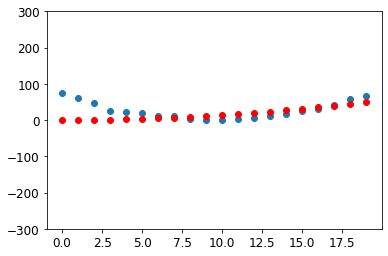

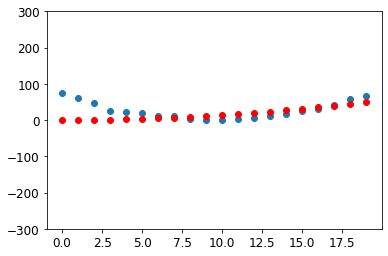

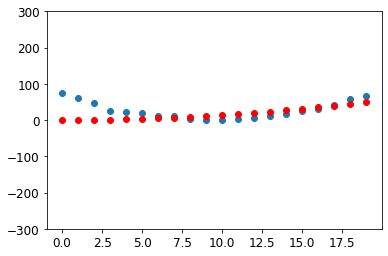

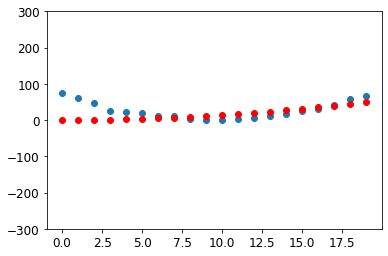

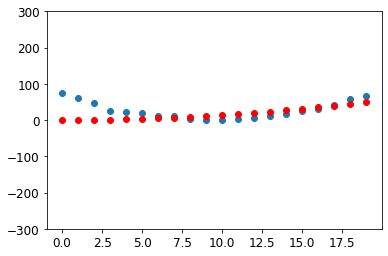

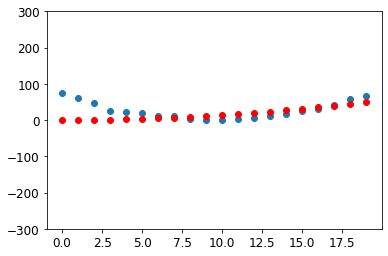

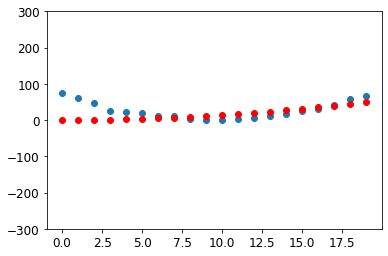

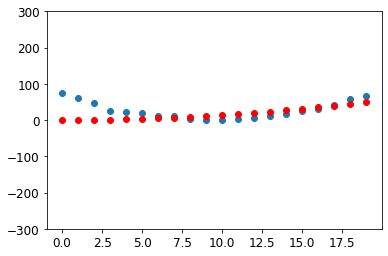

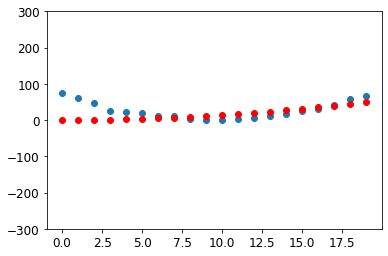

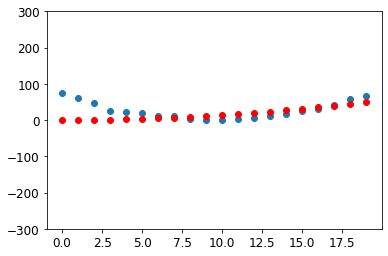

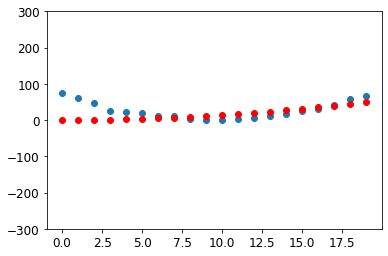

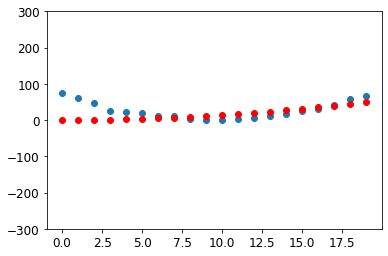

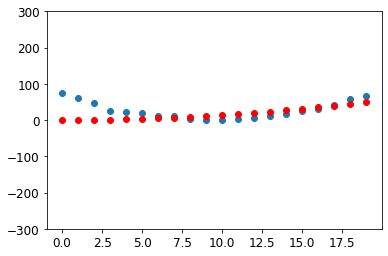

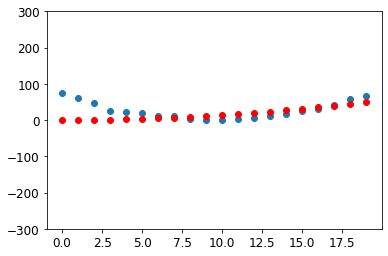

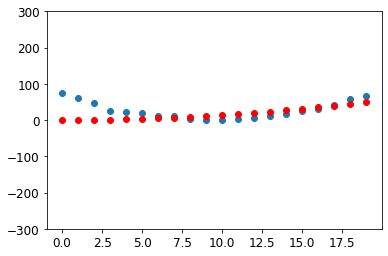

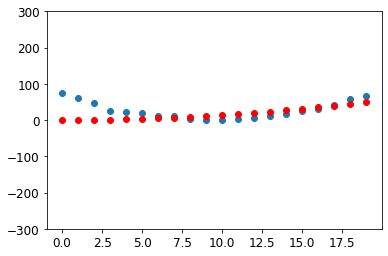

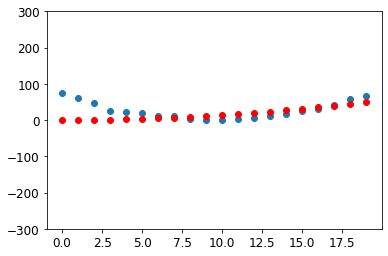

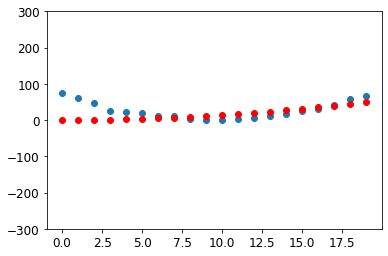

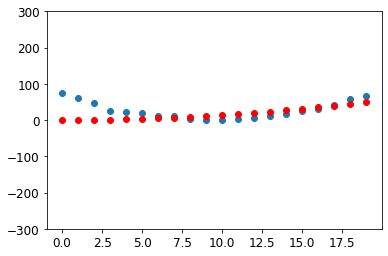

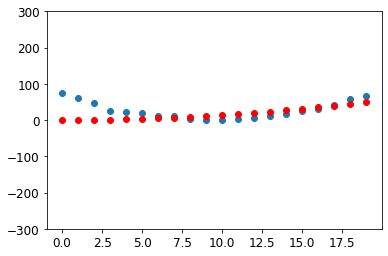

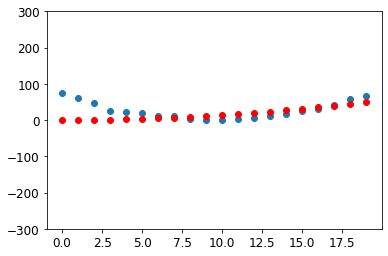

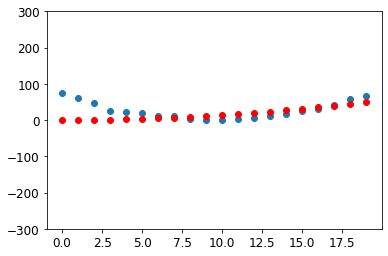

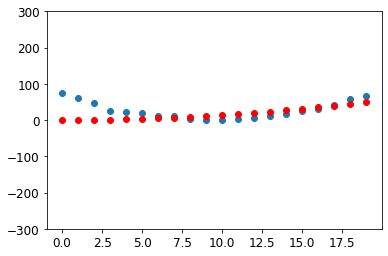

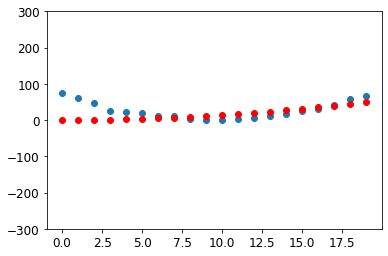

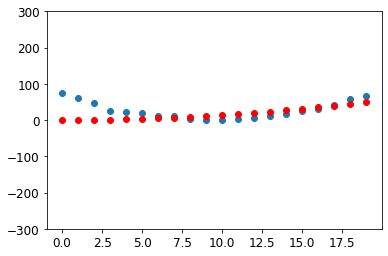

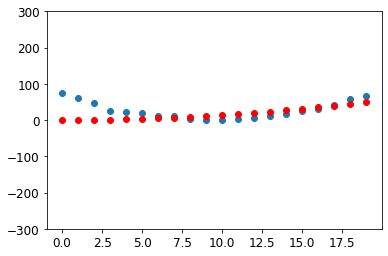

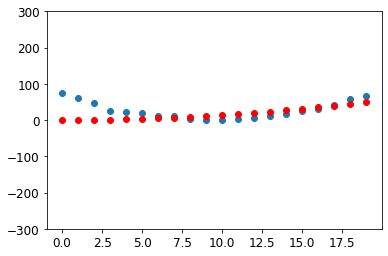

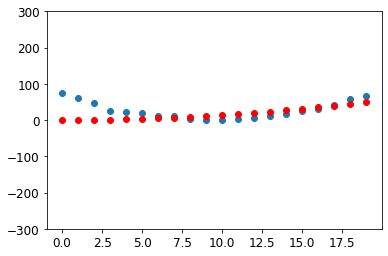

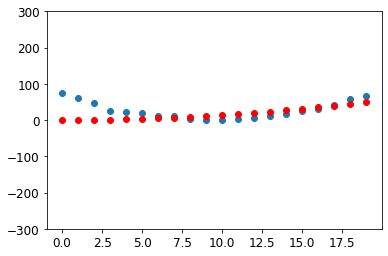

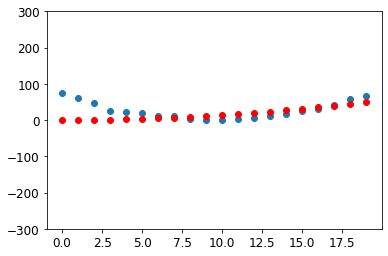

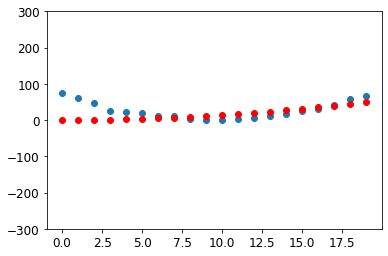

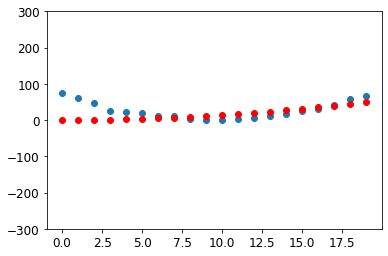

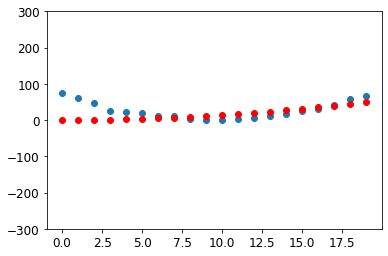

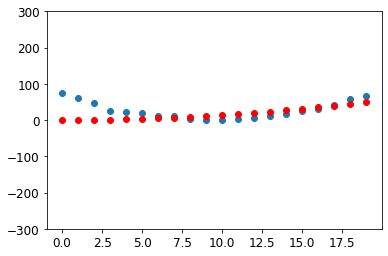

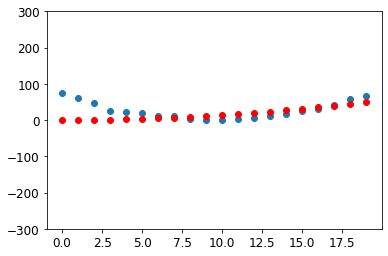

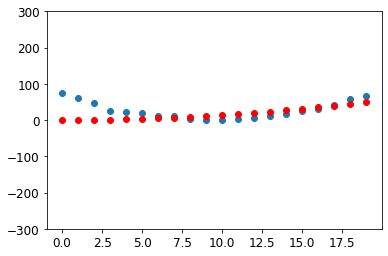

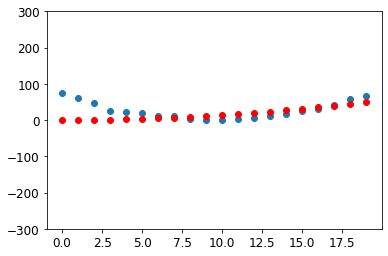

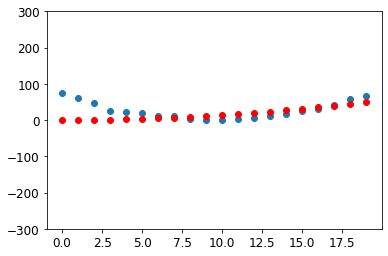

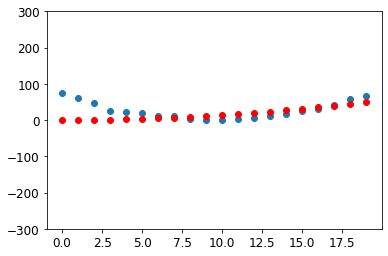

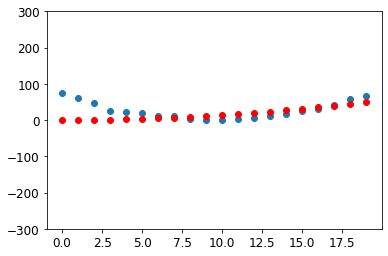

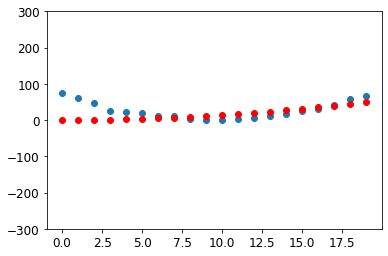

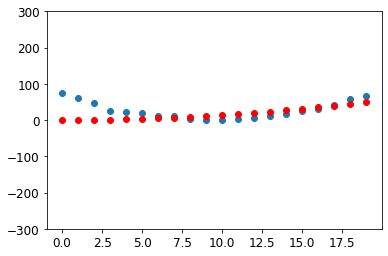

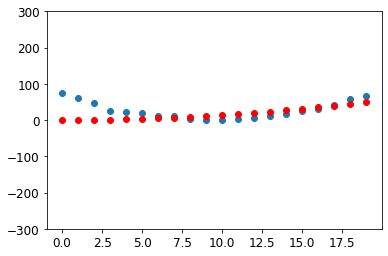

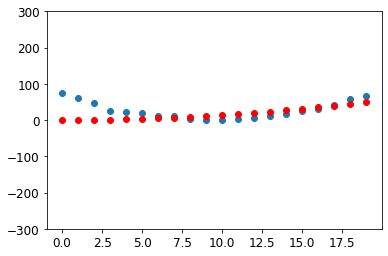

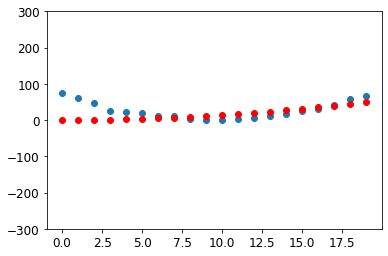

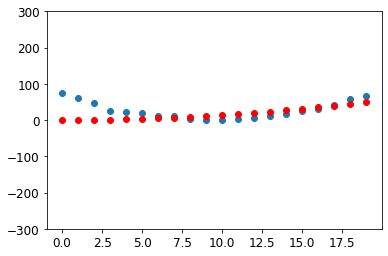

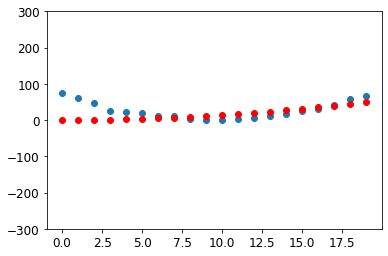

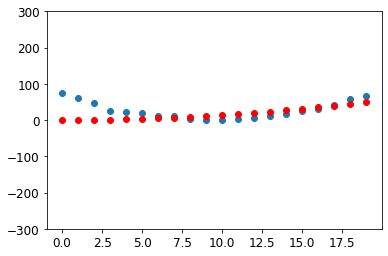

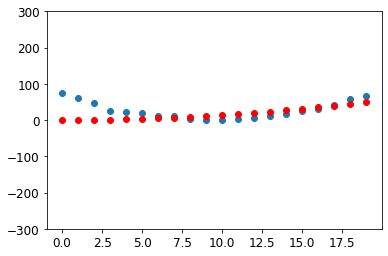

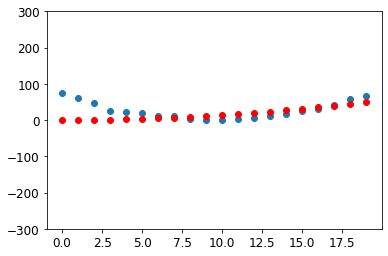

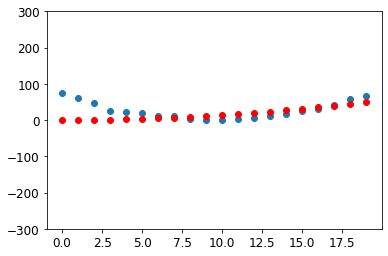

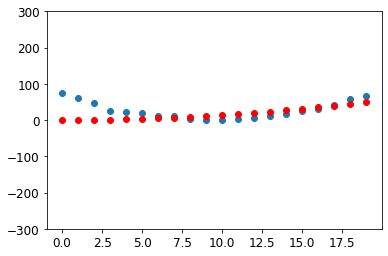

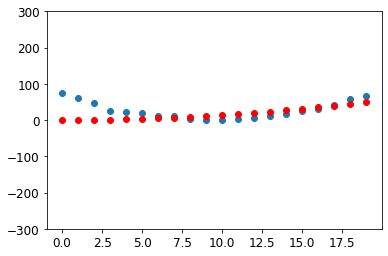

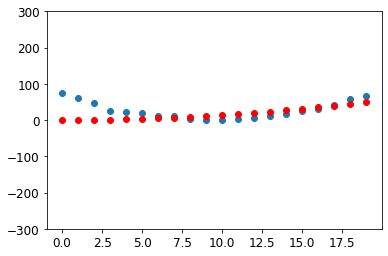

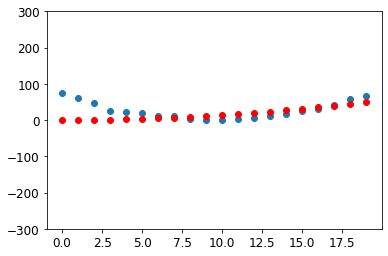

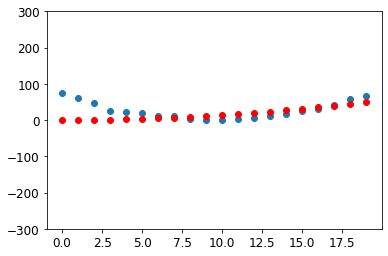

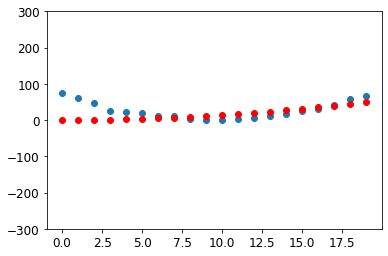

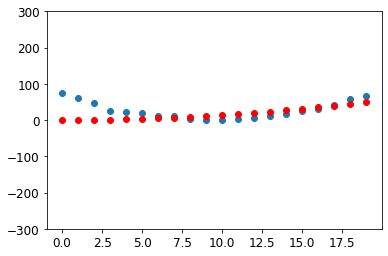

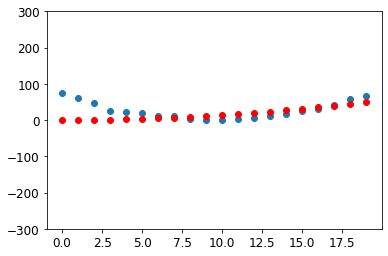

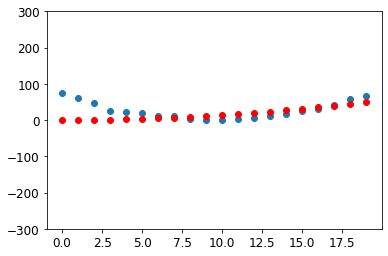

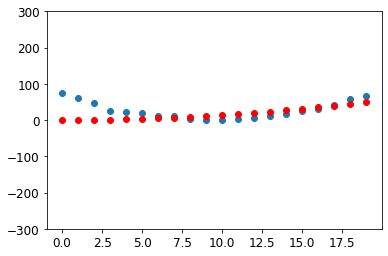

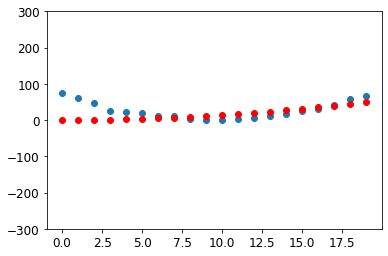

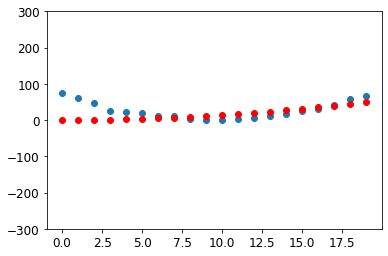

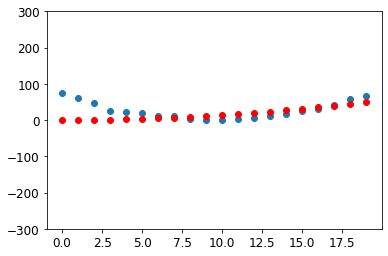

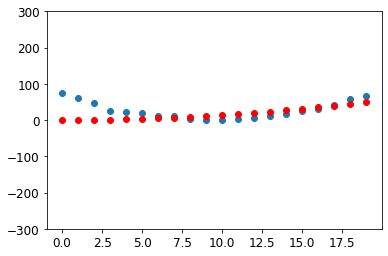

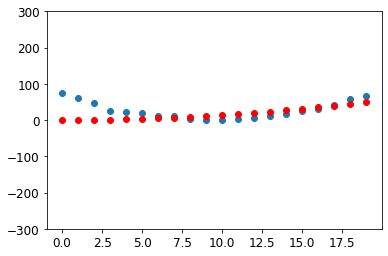

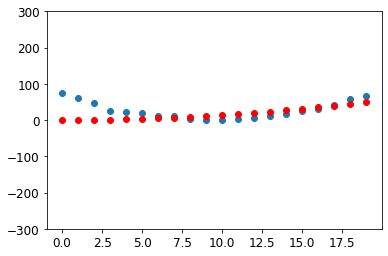

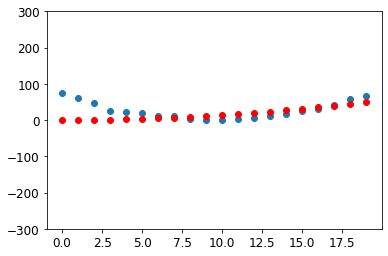

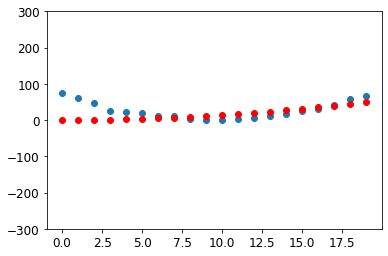

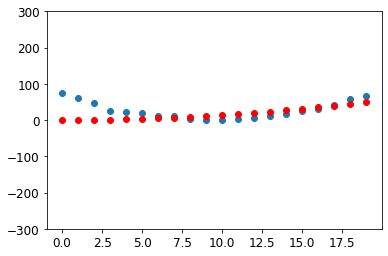

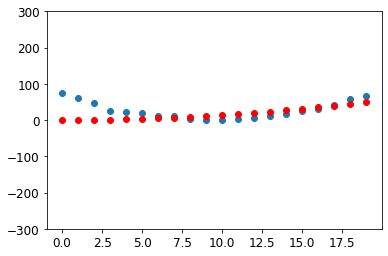

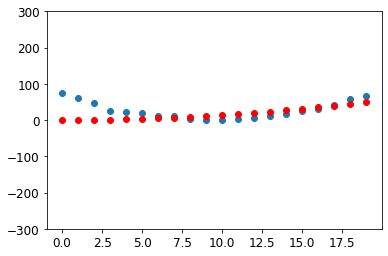

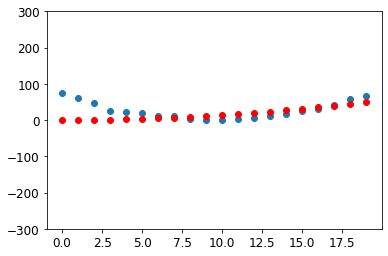

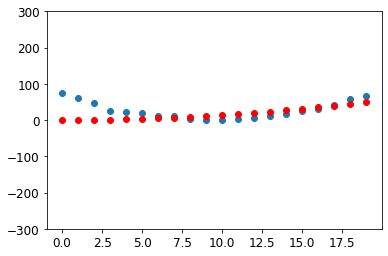

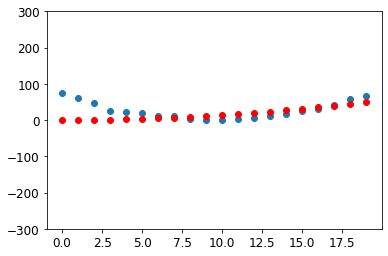

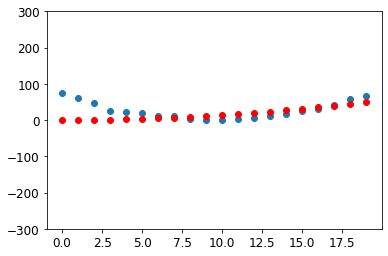

In [51]:
for i in range(0, 1000):
  apply_step(params)

In [48]:
#params = original_params.detach().requires_grad_()

In [49]:
# _ , axs = plt.subplots(1,10,figsize=(12,3))
# for ax in axs: show_preds(apply_step(params, False), ax)
# plt.tight_layout()